## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

,Site #,S_m2,WGS84 N,WGS 84 E,Origin,Dominant_specias,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,ln_Sr_wood,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,500.343869,51.435741,30.107979,n,Birch,920,6.824,10300,9.240,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,99.932806,51.434093,30.108523,a,Pine,3600,8.189,15100,9.622,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,99.932806,51.434163,30.109196,a,Pine,4360,8.380,14600,9.589,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,500.343869,51.434217,30.110484,a,Pine,3420,8.137,12700,9.449,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,249.965218,51.434056,30.111980,a,Pine,2200,7.696,12100,9.401,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
0,4.771,1.792,-0.211,-0.261,-2.040,1.932,0.85,12.233545,19.097736,243,2961.898193
1,5.808,2.496,-0.073,0.392,-0.139,2.674,1.00,14.964220,17.704655,248,2218.239746
2,5.796,2.546,0.030,0.501,-0.030,2.734,1.00,15.329449,17.559893,240,2220.297119
3,5.826,2.643,0.000,0.419,-0.431,2.785,0.97,15.392742,20.676994,244,3033.770752
4,6.059,2.643,0.122,0.647,-0.386,2.809,1.00,17.944009,21.851387,243,3003.818848


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
 9   g_MAX                 103 non-null    int64  
 10  contr_g_MAX           103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Gs_cub_m", "ln_M_AG_kg_m2"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Gs_cub_m                                             \
                       count      mean       std    min      25%    50%   
Dominant_specias                                                          
Alder                    4.0  5.907250  0.445830  5.342  5.65925  5.985   
Aspen                    1.0  4.956000       NaN  4.956  4.95600  4.956   
Birch                   23.0  4.676174  0.813911  2.398  4.56900  4.949   
Oak                      3.0  5.409667  0.406291  4.956  5.24450  5.533   
Pine                    71.0  4.990775  1.410734  1.609  4.44850  5.642   
Spruce                   1.0  6.431000       NaN  6.431  6.43100  6.431   

                                ln_M_AG_kg_m2                             \
                     75%    max         count      mean       std    min   
Dominant_specias                                                           
Alder             6.2330  6.317           4.0  2.862250  0.386813  2.407   
Aspen             4.9560  4.956           1.0  1.932000       NaN  1.932   
Birch             5.2930  5.680          23.0  1.855783  0.744496  0.000   
Oak               5.6365  5.740           3.0  2.687333  0.316282  2.398   
Pine              5.9215  6.457          71.0  2.073789  1.174954 -0.693   
Spruce            6.4310  6.431           1.0  3.506000       NaN  3.506   

                                                 
                      25%    50%     75%    max  
Dominant_specias                                 
Alder             2.61775  2.892  3.1365  3.258  
Aspen             1.93200  1.932  1.9320  1.932  
Birch             1.68350  2.001  2.3930  2.803  
Oak               2.51850  2.639  2.8320  3.025  
Pine              1.48500  2.588  2.8620  3.515  
Spruce            3.50600  3.506  3.5060  3.506

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,4.981961,1.863184,-0.327942,-0.063369,-1.015971,2.086126,0.808738,13.045021,17.907784,240.572816,3008.938899
std,1.264300,1.198731,0.866380,0.795365,0.799205,1.067542,0.276653,6.609366,7.523377,9.358442,876.023529
min,1.609000,-1.347000,-2.659000,-2.408000,-3.507000,-0.693000,0.090000,1.293138,2.733019,194.000000,815.342712
25%,4.677000,1.584500,-0.554000,-0.386500,-1.609000,1.758000,0.745000,8.206727,11.615798,236.500000,2464.687256
50%,5.342000,2.294000,-0.051000,0.182000,-0.844000,2.442000,0.960000,13.072916,18.269344,243.000000,2994.793701
75%,5.875000,2.663000,0.207000,0.495000,-0.364000,2.809000,1.000000,17.432255,22.751595,247.000000,3464.970947
max,6.457000,3.428000,1.384000,1.756000,0.157000,3.515000,1.000000,28.916548,36.355442,253.000000,6230.940918


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_M_stem_kg_m2"
indep_variables = ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
98         5.389            2.366                 0.531             0.182   
99         2.398           -0.186                -1.309            -1.966   
100        1.792           -0.968                -2.120            -1.966   
101        4.836            1.733                -0.386             0.732   
102        2.944           -0.211                -1.966            -1.470   

     ln_M_foliage_kg_m2  ln_M_AG_kg_m2  %_cover  mf_chm_MEAN  mf_chm_MAX  \

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
0,0.85,12.233545,19.097736,243,2961.898193
1,1.00,14.964220,17.704655,248,2218.239746
2,1.00,15.329449,17.559893,240,2220.297119
3,0.97,15.392742,20.676994,244,3033.770752
4,1.00,17.944009,21.851387,243,3003.818848


In [11]:
# Columns in "y" data collections
y.head()

,ln_M_stem_kg_m2
0,1.792
1,2.496
2,2.546
3,2.643
4,2.643


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.9471256836124483, 0.890553485358056, 0.8925646579398675]
    Mean: 0.910
    Std: 0.026

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.26812829 0.27184502 0.3028046 ]
    Mean: 0.281
    Std: 0.016

 --------------------
Mean absolute error (MAE): 

    Scores: [0.3009722942829133, 0.19223702661430137, 0.2118934679491555]
    Mean: 0.235
    Std: 0.047

 --------------------


# Add optimal hyperparameters for XGBoost model

In [17]:
# Hyperparameters data for the next step/stage
p1 = 0.80110549223012                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.04458503693712479                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.16079094589246523                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 90          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.8298291034528749                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.80110549223012
Gamma: 0.04458503693712479
Learning_rate: 0.16079094589246523
Max_depth: 4
N_estimators: 90
Subsample: 0.8298291034528749


# Estimation of predictive quality to basic XGBoost models using Loops

In [18]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [19]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.52044	validation_1-rmse:1.65167
[1]	validation_0-rmse:1.29000	validation_1-rmse:1.44709
[2]	validation_0-rmse:1.10070	validation_1-rmse:1.26042
[3]	validation_0-rmse:0.93746	validation_1-rmse:1.10532
[4]	validation_0-rmse:0.80307	validation_1-rmse:0.97525
[5]	validation_0-rmse:0.69116	validation_1-rmse:0.88621
[6]	validation_0-rmse:0.59602	validation_1-rmse:0.79354
[7]	validation_0-rmse:0.51611	validation_1-rmse:0.72000
[8]	validation_0-rmse:0.44709	validation_1-rmse:0.66885
[9]	validation_0-rmse:0.38854	validation_1-rmse:0.62489


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.33714	validation_1-rmse:0.59493
[11]	validation_0-rmse:0.29368	validation_1-rmse:0.56247
[12]	validation_0-rmse:0.26055	validation_1-rmse:0.53543
[13]	validation_0-rmse:0.23387	validation_1-rmse:0.52277
[14]	validation_0-rmse:0.20894	validation_1-rmse:0.50496
[15]	validation_0-rmse:0.19078	validation_1-rmse:0.49005
[16]	validation_0-rmse:0.17396	validation_1-rmse:0.47727
[17]	validation_0-rmse:0.16119	validation_1-rmse:0.47335
[18]	validation_0-rmse:0.14966	validation_1-rmse:0.46791
[19]	validation_0-rmse:0.14131	validation_1-rmse:0.45939
[20]	validation_0-rmse:0.13348	validation_1-rmse:0.45637
[21]	validation_0-rmse:0.12667	validation_1-rmse:0.44971
[22]	validation_0-rmse:0.12227	validation_1-rmse:0.44465
[23]	validation_0-rmse:0.12026	validation_1-rmse:0.44484
[24]	validation_0-rmse:0.11627	validation_1-rmse:0.44392
[25]	validation_0-rmse:0.11429	validation_1-rmse:0.44081
[26]	validation_0-rmse:0.11111	validation_1-rmse:0.43859
[27]	validation_0-rmse:0.10812	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55379	validation_1-rmse:1.45204
[1]	validation_0-rmse:1.32556	validation_1-rmse:1.20817
[2]	validation_0-rmse:1.13150	validation_1-rmse:1.00921
[3]	validation_0-rmse:0.96641	validation_1-rmse:0.84881
[4]	validation_0-rmse:0.83303	validation_1-rmse:0.71858


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.71473	validation_1-rmse:0.61329
[6]	validation_0-rmse:0.61701	validation_1-rmse:0.52286
[7]	validation_0-rmse:0.52802	validation_1-rmse:0.44138
[8]	validation_0-rmse:0.45764	validation_1-rmse:0.38539
[9]	validation_0-rmse:0.39882	validation_1-rmse:0.33945
[10]	validation_0-rmse:0.35101	validation_1-rmse:0.30536
[11]	validation_0-rmse:0.30792	validation_1-rmse:0.27927
[12]	validation_0-rmse:0.27067	validation_1-rmse:0.26291
[13]	validation_0-rmse:0.24029	validation_1-rmse:0.25216
[14]	validation_0-rmse:0.21724	validation_1-rmse:0.24752
[15]	validation_0-rmse:0.19642	validation_1-rmse:0.24679
[16]	validation_0-rmse:0.18352	validation_1-rmse:0.24236
[17]	validation_0-rmse:0.16833	validation_1-rmse:0.24324
[18]	validation_0-rmse:0.16002	validation_1-rmse:0.24417
[19]	validation_0-rmse:0.14745	validation_1-rmse:0.24890
[20]	validation_0-rmse:0.13869	validation_1-rmse:0.25335
[21]	validation_0-rmse:0.13190	validation_1-rmse:0.26063
[22]	validation_0-rmse:0.12514	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.57960	validation_1-rmse:1.39906
[1]	validation_0-rmse:1.34950	validation_1-rmse:1.20536
[2]	validation_0-rmse:1.15628	validation_1-rmse:1.05731
[3]	validation_0-rmse:0.98601	validation_1-rmse:0.91830
[4]	validation_0-rmse:0.84402	validation_1-rmse:0.82191
[5]	validation_0-rmse:0.72556	validation_1-rmse:0.75623
[6]	validation_0-rmse:0.62671	validation_1-rmse:0.68888
[7]	validation_0-rmse:0.53726	validation_1-rmse:0.64958
[8]	validation_0-rmse:0.46932	validation_1-rmse:0.60794


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.40801	validation_1-rmse:0.58312
[10]	validation_0-rmse:0.35633	validation_1-rmse:0.56987
[11]	validation_0-rmse:0.31434	validation_1-rmse:0.55131
[12]	validation_0-rmse:0.27837	validation_1-rmse:0.53569
[13]	validation_0-rmse:0.24988	validation_1-rmse:0.53706
[14]	validation_0-rmse:0.22378	validation_1-rmse:0.54130
[15]	validation_0-rmse:0.20364	validation_1-rmse:0.53570
[16]	validation_0-rmse:0.18647	validation_1-rmse:0.52783
[17]	validation_0-rmse:0.16976	validation_1-rmse:0.52652
[18]	validation_0-rmse:0.15744	validation_1-rmse:0.52969
[19]	validation_0-rmse:0.14947	validation_1-rmse:0.53367
[20]	validation_0-rmse:0.14182	validation_1-rmse:0.53643
[21]	validation_0-rmse:0.13295	validation_1-rmse:0.53390
[22]	validation_0-rmse:0.12766	validation_1-rmse:0.52912
[23]	validation_0-rmse:0.12380	validation_1-rmse:0.53304
[24]	validation_0-rmse:0.12199	validation_1-rmse:0.53621
[25]	validation_0-rmse:0.12068	validation_1-rmse:0.53356
[26]	validation_0-rmse:0.11681	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.13984	validation_1-rmse:1.04402
[3]	validation_0-rmse:0.97360	validation_1-rmse:0.88034
[4]	validation_0-rmse:0.83239	validation_1-rmse:0.75114
[5]	validation_0-rmse:0.71841	validation_1-rmse:0.64688
[6]	validation_0-rmse:0.61781	validation_1-rmse:0.55678
[7]	validation_0-rmse:0.53964	validation_1-rmse:0.49187
[8]	validation_0-rmse:0.47002	validation_1-rmse:0.43411
[9]	validation_0-rmse:0.40951	validation_1-rmse:0.39910
[10]	validation_0-rmse:0.35936	validation_1-rmse:0.37545
[11]	validation_0-rmse:0.31728	validation_1-rmse:0.35545
[12]	validation_0-rmse:0.27948	validation_1-rmse:0.33259
[13]	validation_0-rmse:0.24952	validation_1-rmse:0.32868
[14]	validation_0-rmse:0.22223	validation_1-rmse:0.32031
[15]	validation_0-rmse:0.20302	validation_1-rmse:0.31340
[16]	validation_0-rmse:0.18416	validation_1-rmse:0.30535
[17]	validation_0-rmse:0.16813	validation_1-rmse:0.31180
[18]	validation_0-rmse:0.15901	validation_1-rmse:0.30716
[19]	validation_0-rmse:0.14751	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30294	validation_1-rmse:1.35829
[2]	validation_0-rmse:1.11349	validation_1-rmse:1.15192
[3]	validation_0-rmse:0.95389	validation_1-rmse:1.00332
[4]	validation_0-rmse:0.81793	validation_1-rmse:0.86766
[5]	validation_0-rmse:0.70670	validation_1-rmse:0.75321
[6]	validation_0-rmse:0.60891	validation_1-rmse:0.65255
[7]	validation_0-rmse:0.52521	validation_1-rmse:0.56709
[8]	validation_0-rmse:0.45373	validation_1-rmse:0.50433
[9]	validation_0-rmse:0.39471	validation_1-rmse:0.45533
[10]	validation_0-rmse:0.34682	validation_1-rmse:0.41450
[11]	validation_0-rmse:0.30698	validation_1-rmse:0.38440
[12]	validation_0-rmse:0.27097	validation_1-rmse:0.35607
[13]	validation_0-rmse:0.24035	validation_1-rmse:0.33485
[14]	validation_0-rmse:0.21587	validation_1-rmse:0.31456
[15]	validation_0-rmse:0.19528	validation_1-rmse:0.30024
[16]	validation_0-rmse:0.17850	validation_1-rmse:0.29000
[17]	validation_0-rmse:0.16337	validation_1-rmse:0.27902
[18]	validation_0-rmse:0.14992	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.53327	validation_1-rmse:1.58154
[1]	validation_0-rmse:1.31136	validation_1-rmse:1.35190
[2]	validation_0-rmse:1.12263	validation_1-rmse:1.14155
[3]	validation_0-rmse:0.95576	validation_1-rmse:0.97470
[4]	validation_0-rmse:0.81568	validation_1-rmse:0.83519
[5]	validation_0-rmse:0.70194	validation_1-rmse:0.71056
[6]	validation_0-rmse:0.60702	validation_1-rmse:0.61983
[7]	validation_0-rmse:0.52898	validation_1-rmse:0.54344
[8]	validation_0-rmse:0.45759	validation_1-rmse:0.47673
[9]	validation_0-rmse:0.39891	validation_1-rmse:0.41258
[10]	validation_0-rmse:0.34815	validation_1-rmse:0.36890
[11]	validation_0-rmse:0.30621	validation_1-rmse:0.33162
[12]	validation_0-rmse:0.27489	validation_1-rmse:0.31354
[13]	validation_0-rmse:0.24571	validation_1-rmse:0.29456
[14]	validation_0-rmse:0.21931	validation_1-rmse:0.27777
[15]	validation_0-rmse:0.20189	validation_1-rmse:0.26898
[16]	validation_0-rmse:0.18521	validation_1-rmse:0.25795
[17]	validation_0-rmse:0.17131	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.15326	validation_1-rmse:0.94524
[3]	validation_0-rmse:0.98252	validation_1-rmse:0.78918
[4]	validation_0-rmse:0.84198	validation_1-rmse:0.66932
[5]	validation_0-rmse:0.72382	validation_1-rmse:0.57579
[6]	validation_0-rmse:0.62249	validation_1-rmse:0.49605
[7]	validation_0-rmse:0.53400	validation_1-rmse:0.44309
[8]	validation_0-rmse:0.46087	validation_1-rmse:0.41286
[9]	validation_0-rmse:0.40208	validation_1-rmse:0.39084
[10]	validation_0-rmse:0.34796	validation_1-rmse:0.37900
[11]	validation_0-rmse:0.30313	validation_1-rmse:0.36792
[12]	validation_0-rmse:0.26536	validation_1-rmse:0.36013
[13]	validation_0-rmse:0.23504	validation_1-rmse:0.36268
[14]	validation_0-rmse:0.20755	validation_1-rmse:0.36516
[15]	validation_0-rmse:0.18680	validation_1-rmse:0.36760
[16]	validation_0-rmse:0.16883	validation_1-rmse:0.36850
[17]	validation_0-rmse:0.15494	validation_1-rmse:0.37100
[18]	validation_0-rmse:0.14431	validation_1-rmse:0.37278
[19]	validation_0-rmse:0.13595	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.36357	validation_1-rmse:1.06453
[2]	validation_0-rmse:1.16725	validation_1-rmse:0.92548
[3]	validation_0-rmse:0.99823	validation_1-rmse:0.79156
[4]	validation_0-rmse:0.85544	validation_1-rmse:0.68225
[5]	validation_0-rmse:0.73189	validation_1-rmse:0.58584
[6]	validation_0-rmse:0.62760	validation_1-rmse:0.50901
[7]	validation_0-rmse:0.54305	validation_1-rmse:0.45257
[8]	validation_0-rmse:0.47218	validation_1-rmse:0.42208
[9]	validation_0-rmse:0.40855	validation_1-rmse:0.38707
[10]	validation_0-rmse:0.35575	validation_1-rmse:0.36061
[11]	validation_0-rmse:0.31056	validation_1-rmse:0.33694
[12]	validation_0-rmse:0.27319	validation_1-rmse:0.32436
[13]	validation_0-rmse:0.24371	validation_1-rmse:0.31523
[14]	validation_0-rmse:0.21735	validation_1-rmse:0.30816
[15]	validation_0-rmse:0.19585	validation_1-rmse:0.30884
[16]	validation_0-rmse:0.17522	validation_1-rmse:0.30655
[17]	validation_0-rmse:0.16249	validation_1-rmse:0.30489
[18]	validation_0-rmse:0.15006	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.56757	validation_1-rmse:1.43553
[1]	validation_0-rmse:1.34187	validation_1-rmse:1.22305
[2]	validation_0-rmse:1.14804	validation_1-rmse:1.03908
[3]	validation_0-rmse:0.98024	validation_1-rmse:0.87850
[4]	validation_0-rmse:0.84361	validation_1-rmse:0.74296
[5]	validation_0-rmse:0.72267	validation_1-rmse:0.63434
[6]	validation_0-rmse:0.62283	validation_1-rmse:0.54372
[7]	validation_0-rmse:0.53706	validation_1-rmse:0.46639
[8]	validation_0-rmse:0.46676	validation_1-rmse:0.40957
[9]	validation_0-rmse:0.40757	validation_1-rmse:0.36589
[10]	validation_0-rmse:0.35795	validation_1-rmse:0.33354
[11]	validation_0-rmse:0.31252	validation_1-rmse:0.30425
[12]	validation_0-rmse:0.27599	validation_1-rmse:0.27998
[13]	validation_0-rmse:0.24697	validation_1-rmse:0.27038
[14]	validation_0-rmse:0.22367	validation_1-rmse:0.25969
[15]	validation_0-rmse:0.20034	validation_1-rmse:0.24732
[16]	validation_0-rmse:0.18080	validation_1-rmse:0.24561
[17]	validation_0-rmse:0.16691	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.11863	validation_1-rmse:1.19211
[3]	validation_0-rmse:0.95761	validation_1-rmse:1.02678
[4]	validation_0-rmse:0.82121	validation_1-rmse:0.88863
[5]	validation_0-rmse:0.70742	validation_1-rmse:0.77030
[6]	validation_0-rmse:0.60910	validation_1-rmse:0.67482
[7]	validation_0-rmse:0.52520	validation_1-rmse:0.59084
[8]	validation_0-rmse:0.45682	validation_1-rmse:0.52698
[9]	validation_0-rmse:0.39754	validation_1-rmse:0.48090
[10]	validation_0-rmse:0.34633	validation_1-rmse:0.44427
[11]	validation_0-rmse:0.30503	validation_1-rmse:0.41449
[12]	validation_0-rmse:0.27003	validation_1-rmse:0.39328
[13]	validation_0-rmse:0.23950	validation_1-rmse:0.37637
[14]	validation_0-rmse:0.21478	validation_1-rmse:0.36420
[15]	validation_0-rmse:0.19490	validation_1-rmse:0.35298
[16]	validation_0-rmse:0.17680	validation_1-rmse:0.34661
[17]	validation_0-rmse:0.16192	validation_1-rmse:0.34577
[18]	validation_0-rmse:0.14824	validation_1-rmse:0.34392
[19]	validation_0-rmse:0.13787	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.56648	validation_1-rmse:1.46557
[1]	validation_0-rmse:1.34056	validation_1-rmse:1.26363
[2]	validation_0-rmse:1.14598	validation_1-rmse:1.11187
[3]	validation_0-rmse:0.98022	validation_1-rmse:0.95177
[4]	validation_0-rmse:0.84209	validation_1-rmse:0.84927
[5]	validation_0-rmse:0.72647	validation_1-rmse:0.74978
[6]	validation_0-rmse:0.62231	validation_1-rmse:0.69235
[7]	validation_0-rmse:0.53826	validation_1-rmse:0.63043
[8]	validation_0-rmse:0.46835	validation_1-rmse:0.58452
[9]	validation_0-rmse:0.40680	validation_1-rmse:0.53695
[10]	validation_0-rmse:0.35669	validation_1-rmse:0.52297
[11]	validation_0-rmse:0.31613	validation_1-rmse:0.50011
[12]	validation_0-rmse:0.27900	validation_1-rmse:0.48643
[13]	validation_0-rmse:0.24920	validation_1-rmse:0.47240
[14]	validation_0-rmse:0.22273	validation_1-rmse:0.46198
[15]	validation_0-rmse:0.20338	validation_1-rmse:0.45893
[16]	validation_0-rmse:0.18809	validation_1-rmse:0.45611
[17]	validation_0-rmse:0.17122	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.53452	validation_1-rmse:1.54800
[1]	validation_0-rmse:1.31378	validation_1-rmse:1.33875
[2]	validation_0-rmse:1.12140	validation_1-rmse:1.15736
[3]	validation_0-rmse:0.95907	validation_1-rmse:1.00849
[4]	validation_0-rmse:0.82184	validation_1-rmse:0.88269
[5]	validation_0-rmse:0.70335	validation_1-rmse:0.77155
[6]	validation_0-rmse:0.60553	validation_1-rmse:0.68725
[7]	validation_0-rmse:0.52212	validation_1-rmse:0.60828
[8]	validation_0-rmse:0.45188	validation_1-rmse:0.55298
[9]	validation_0-rmse:0.39477	validation_1-rmse:0.50232
[10]	validation_0-rmse:0.34636	validation_1-rmse:0.46422
[11]	validation_0-rmse:0.30300	validation_1-rmse:0.43312
[12]	validation_0-rmse:0.26762	validation_1-rmse:0.40644
[13]	validation_0-rmse:0.23907	validation_1-rmse:0.38436
[14]	validation_0-rmse:0.21671	validation_1-rmse:0.36675
[15]	validation_0-rmse:0.19283	validation_1-rmse:0.35553
[16]	validation_0-rmse:0.17543	validation_1-rmse:0.34260
[17]	validation_0-rmse:0.16079	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.55526	validation_1-rmse:1.48608
[1]	validation_0-rmse:1.32164	validation_1-rmse:1.26500
[2]	validation_0-rmse:1.12761	validation_1-rmse:1.07933
[3]	validation_0-rmse:0.96272	validation_1-rmse:0.93410
[4]	validation_0-rmse:0.82251	validation_1-rmse:0.81301
[5]	validation_0-rmse:0.70965	validation_1-rmse:0.71446
[6]	validation_0-rmse:0.61326	validation_1-rmse:0.63232
[7]	validation_0-rmse:0.53140	validation_1-rmse:0.56175
[8]	validation_0-rmse:0.46108	validation_1-rmse:0.50696
[9]	validation_0-rmse:0.39991	validation_1-rmse:0.46555
[10]	validation_0-rmse:0.34904	validation_1-rmse:0.43259
[11]	validation_0-rmse:0.30769	validation_1-rmse:0.40382
[12]	validation_0-rmse:0.27438	validation_1-rmse:0.38403
[13]	validation_0-rmse:0.24903	validation_1-rmse:0.37162
[14]	validation_0-rmse:0.22510	validation_1-rmse:0.35629


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[15]	validation_0-rmse:0.20588	validation_1-rmse:0.34527
[16]	validation_0-rmse:0.18704	validation_1-rmse:0.33482
[17]	validation_0-rmse:0.17029	validation_1-rmse:0.32830
[18]	validation_0-rmse:0.15817	validation_1-rmse:0.32314
[19]	validation_0-rmse:0.14738	validation_1-rmse:0.31926
[20]	validation_0-rmse:0.13813	validation_1-rmse:0.31422
[21]	validation_0-rmse:0.13212	validation_1-rmse:0.31355
[22]	validation_0-rmse:0.12497	validation_1-rmse:0.31249
[23]	validation_0-rmse:0.11883	validation_1-rmse:0.31172
[24]	validation_0-rmse:0.11655	validation_1-rmse:0.30851
[25]	validation_0-rmse:0.11434	validation_1-rmse:0.30700
[26]	validation_0-rmse:0.10818	validation_1-rmse:0.30432
[27]	validation_0-rmse:0.10677	validation_1-rmse:0.30422
[28]	validation_0-rmse:0.10566	validation_1-rmse:0.30415
[29]	validation_0-rmse:0.10477	validation_1-rmse:0.30462
[30]	validation_0-rmse:0.10170	validation_1-rmse:0.30458
[31]	validation_0-rmse:0.10081	validation_1-rmse:0.30455
[32]	validation_0-rmse:0.10023	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56920	validation_1-rmse:1.42587
[1]	validation_0-rmse:1.34333	validation_1-rmse:1.22426
[2]	validation_0-rmse:1.14593	validation_1-rmse:1.03110
[3]	validation_0-rmse:0.97711	validation_1-rmse:0.87810
[4]	validation_0-rmse:0.83948	validation_1-rmse:0.77691
[5]	validation_0-rmse:0.72528	validation_1-rmse:0.67693
[6]	validation_0-rmse:0.63072	validation_1-rmse:0.60465
[7]	validation_0-rmse:0.54780	validation_1-rmse:0.53079
[8]	validation_0-rmse:0.47170	validation_1-rmse:0.48590


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.41547	validation_1-rmse:0.43630
[10]	validation_0-rmse:0.36520	validation_1-rmse:0.38672
[11]	validation_0-rmse:0.32061	validation_1-rmse:0.35174
[12]	validation_0-rmse:0.28426	validation_1-rmse:0.33720
[13]	validation_0-rmse:0.25639	validation_1-rmse:0.32865
[14]	validation_0-rmse:0.23002	validation_1-rmse:0.31589
[15]	validation_0-rmse:0.20933	validation_1-rmse:0.30533
[16]	validation_0-rmse:0.19079	validation_1-rmse:0.29811
[17]	validation_0-rmse:0.17579	validation_1-rmse:0.29128
[18]	validation_0-rmse:0.16345	validation_1-rmse:0.28519
[19]	validation_0-rmse:0.15105	validation_1-rmse:0.27656
[20]	validation_0-rmse:0.14365	validation_1-rmse:0.26998
[21]	validation_0-rmse:0.13567	validation_1-rmse:0.26220
[22]	validation_0-rmse:0.12974	validation_1-rmse:0.25970
[23]	validation_0-rmse:0.12384	validation_1-rmse:0.25878
[24]	validation_0-rmse:0.11752	validation_1-rmse:0.25639
[25]	validation_0-rmse:0.11410	validation_1-rmse:0.25753
[26]	validation_0-rmse:0.11019	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.58818	validation_1-rmse:1.34708
[1]	validation_0-rmse:1.35689	validation_1-rmse:1.15932
[2]	validation_0-rmse:1.15708	validation_1-rmse:0.99028
[3]	validation_0-rmse:0.98708	validation_1-rmse:0.86175
[4]	validation_0-rmse:0.84644	validation_1-rmse:0.76251
[5]	validation_0-rmse:0.72650	validation_1-rmse:0.66286
[6]	validation_0-rmse:0.62539	validation_1-rmse:0.59303
[7]	validation_0-rmse:0.53897	validation_1-rmse:0.52635
[8]	validation_0-rmse:0.46606	validation_1-rmse:0.48301
[9]	validation_0-rmse:0.40518	validation_1-rmse:0.45379
[10]	validation_0-rmse:0.35502	validation_1-rmse:0.42666
[11]	validation_0-rmse:0.31179	validation_1-rmse:0.39225
[12]	validation_0-rmse:0.27632	validation_1-rmse:0.36611
[13]	validation_0-rmse:0.24879	validation_1-rmse:0.35472
[14]	validation_0-rmse:0.22172	validation_1-rmse:0.33820
[15]	validation_0-rmse:0.20335	validation_1-rmse:0.33335
[16]	validation_0-rmse:0.18534	validation_1-rmse:0.32867
[17]	validation_0-rmse:0.16933	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54238	validation_1-rmse:1.53592
[1]	validation_0-rmse:1.31082	validation_1-rmse:1.30083
[2]	validation_0-rmse:1.11944	validation_1-rmse:1.11414
[3]	validation_0-rmse:0.95554	validation_1-rmse:0.95572


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.81858	validation_1-rmse:0.82243
[5]	validation_0-rmse:0.70453	validation_1-rmse:0.71023
[6]	validation_0-rmse:0.60652	validation_1-rmse:0.61785
[7]	validation_0-rmse:0.52497	validation_1-rmse:0.53332
[8]	validation_0-rmse:0.45451	validation_1-rmse:0.47698
[9]	validation_0-rmse:0.40091	validation_1-rmse:0.43025
[10]	validation_0-rmse:0.34940	validation_1-rmse:0.38719
[11]	validation_0-rmse:0.30613	validation_1-rmse:0.35392
[12]	validation_0-rmse:0.27104	validation_1-rmse:0.33438
[13]	validation_0-rmse:0.24270	validation_1-rmse:0.30889
[14]	validation_0-rmse:0.21566	validation_1-rmse:0.30045
[15]	validation_0-rmse:0.19290	validation_1-rmse:0.28341
[16]	validation_0-rmse:0.17538	validation_1-rmse:0.27961
[17]	validation_0-rmse:0.16141	validation_1-rmse:0.27670
[18]	validation_0-rmse:0.15009	validation_1-rmse:0.27398
[19]	validation_0-rmse:0.14093	validation_1-rmse:0.27364
[20]	validation_0-rmse:0.13334	validation_1-rmse:0.27663
[21]	validation_0-rmse:0.12692	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.28187	validation_1-rmse:1.47954
[2]	validation_0-rmse:1.10072	validation_1-rmse:1.28670
[3]	validation_0-rmse:0.94276	validation_1-rmse:1.11763
[4]	validation_0-rmse:0.80958	validation_1-rmse:0.97481
[5]	validation_0-rmse:0.70101	validation_1-rmse:0.84615
[6]	validation_0-rmse:0.60576	validation_1-rmse:0.74587
[7]	validation_0-rmse:0.52217	validation_1-rmse:0.65178
[8]	validation_0-rmse:0.45760	validation_1-rmse:0.58209
[9]	validation_0-rmse:0.39955	validation_1-rmse:0.51134
[10]	validation_0-rmse:0.35425	validation_1-rmse:0.45722
[11]	validation_0-rmse:0.31217	validation_1-rmse:0.40787
[12]	validation_0-rmse:0.27703	validation_1-rmse:0.36879
[13]	validation_0-rmse:0.24684	validation_1-rmse:0.34074
[14]	validation_0-rmse:0.22230	validation_1-rmse:0.31493
[15]	validation_0-rmse:0.20417	validation_1-rmse:0.29729
[16]	validation_0-rmse:0.18478	validation_1-rmse:0.27785
[17]	validation_0-rmse:0.17026	validation_1-rmse:0.26691
[18]	validation_0-rmse:0.15922	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55126	validation_1-rmse:1.52588
[1]	validation_0-rmse:1.32393	validation_1-rmse:1.32667
[2]	validation_0-rmse:1.13132	validation_1-rmse:1.15669
[3]	validation_0-rmse:0.96581	validation_1-rmse:1.00924
[4]	validation_0-rmse:0.83168	validation_1-rmse:0.89055
[5]	validation_0-rmse:0.71533	validation_1-rmse:0.79939
[6]	validation_0-rmse:0.61622	validation_1-rmse:0.71236
[7]	validation_0-rmse:0.53057	validation_1-rmse:0.63694
[8]	validation_0-rmse:0.46054	validation_1-rmse:0.58036
[9]	validation_0-rmse:0.40112	validation_1-rmse:0.53536
[10]	validation_0-rmse:0.35166	validation_1-rmse:0.49850
[11]	validation_0-rmse:0.30896	validation_1-rmse:0.46154
[12]	validation_0-rmse:0.27442	validation_1-rmse:0.43190
[13]	validation_0-rmse:0.24555	validation_1-rmse:0.41310
[14]	validation_0-rmse:0.22174	validation_1-rmse:0.39791
[15]	validation_0-rmse:0.20133	validation_1-rmse:0.38335
[16]	validation_0-rmse:0.18273	validation_1-rmse:0.37267
[17]	validation_0-rmse:0.17009	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53827	validation_1-rmse:1.58815
[1]	validation_0-rmse:1.31029	validation_1-rmse:1.34775
[2]	validation_0-rmse:1.12028	validation_1-rmse:1.15582
[3]	validation_0-rmse:0.95523	validation_1-rmse:0.98047
[4]	validation_0-rmse:0.82128	validation_1-rmse:0.83821
[5]	validation_0-rmse:0.70584	validation_1-rmse:0.71202


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60844	validation_1-rmse:0.61170
[7]	validation_0-rmse:0.52797	validation_1-rmse:0.52952
[8]	validation_0-rmse:0.46104	validation_1-rmse:0.46207
[9]	validation_0-rmse:0.40071	validation_1-rmse:0.40434
[10]	validation_0-rmse:0.35359	validation_1-rmse:0.36037
[11]	validation_0-rmse:0.31059	validation_1-rmse:0.32416
[12]	validation_0-rmse:0.27741	validation_1-rmse:0.29913
[13]	validation_0-rmse:0.24737	validation_1-rmse:0.28100
[14]	validation_0-rmse:0.22336	validation_1-rmse:0.26399
[15]	validation_0-rmse:0.20417	validation_1-rmse:0.24917
[16]	validation_0-rmse:0.18644	validation_1-rmse:0.23556
[17]	validation_0-rmse:0.17259	validation_1-rmse:0.23311
[18]	validation_0-rmse:0.16095	validation_1-rmse:0.22246
[19]	validation_0-rmse:0.15006	validation_1-rmse:0.21886
[20]	validation_0-rmse:0.14302	validation_1-rmse:0.21683
[21]	validation_0-rmse:0.13469	validation_1-rmse:0.21148
[22]	validation_0-rmse:0.12698	validation_1-rmse:0.21132
[23]	validation_0-rmse:0.12060	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53733	validation_1-rmse:1.54208
[1]	validation_0-rmse:1.30880	validation_1-rmse:1.30181
[2]	validation_0-rmse:1.11592	validation_1-rmse:1.10454
[3]	validation_0-rmse:0.95468	validation_1-rmse:0.94118
[4]	validation_0-rmse:0.81979	validation_1-rmse:0.80735
[5]	validation_0-rmse:0.70468	validation_1-rmse:0.70407
[6]	validation_0-rmse:0.61152	validation_1-rmse:0.62356
[7]	validation_0-rmse:0.52899	validation_1-rmse:0.55923
[8]	validation_0-rmse:0.45775	validation_1-rmse:0.49861


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.39525	validation_1-rmse:0.44831
[10]	validation_0-rmse:0.34516	validation_1-rmse:0.41052
[11]	validation_0-rmse:0.30492	validation_1-rmse:0.39441
[12]	validation_0-rmse:0.27059	validation_1-rmse:0.38249
[13]	validation_0-rmse:0.24319	validation_1-rmse:0.37194
[14]	validation_0-rmse:0.21741	validation_1-rmse:0.36040
[15]	validation_0-rmse:0.19689	validation_1-rmse:0.35085
[16]	validation_0-rmse:0.17883	validation_1-rmse:0.34014
[17]	validation_0-rmse:0.16796	validation_1-rmse:0.33862
[18]	validation_0-rmse:0.15694	validation_1-rmse:0.33224
[19]	validation_0-rmse:0.14805	validation_1-rmse:0.32863
[20]	validation_0-rmse:0.13961	validation_1-rmse:0.32712
[21]	validation_0-rmse:0.13376	validation_1-rmse:0.32269
[22]	validation_0-rmse:0.12710	validation_1-rmse:0.32035
[23]	validation_0-rmse:0.12170	validation_1-rmse:0.32011
[24]	validation_0-rmse:0.11864	validation_1-rmse:0.31914
[25]	validation_0-rmse:0.11623	validation_1-rmse:0.31905
[26]	validation_0-rmse:0.11360	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53256	validation_1-rmse:1.63512
[1]	validation_0-rmse:1.30645	validation_1-rmse:1.42339
[2]	validation_0-rmse:1.11805	validation_1-rmse:1.23784
[3]	validation_0-rmse:0.95716	validation_1-rmse:1.07676
[4]	validation_0-rmse:0.82296	validation_1-rmse:0.94315
[5]	validation_0-rmse:0.70966	validation_1-rmse:0.82163
[6]	validation_0-rmse:0.60952	validation_1-rmse:0.72839
[7]	validation_0-rmse:0.52431	validation_1-rmse:0.64098
[8]	validation_0-rmse:0.45339	validation_1-rmse:0.56978


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.39502	validation_1-rmse:0.50964
[10]	validation_0-rmse:0.34713	validation_1-rmse:0.45626
[11]	validation_0-rmse:0.30543	validation_1-rmse:0.42072
[12]	validation_0-rmse:0.27216	validation_1-rmse:0.38663
[13]	validation_0-rmse:0.24370	validation_1-rmse:0.36507
[14]	validation_0-rmse:0.21847	validation_1-rmse:0.34132
[15]	validation_0-rmse:0.19960	validation_1-rmse:0.32868
[16]	validation_0-rmse:0.18331	validation_1-rmse:0.31880
[17]	validation_0-rmse:0.17171	validation_1-rmse:0.30503
[18]	validation_0-rmse:0.16039	validation_1-rmse:0.29791
[19]	validation_0-rmse:0.15144	validation_1-rmse:0.29161
[20]	validation_0-rmse:0.14323	validation_1-rmse:0.28720
[21]	validation_0-rmse:0.13655	validation_1-rmse:0.28283
[22]	validation_0-rmse:0.13017	validation_1-rmse:0.27451
[23]	validation_0-rmse:0.12637	validation_1-rmse:0.27347
[24]	validation_0-rmse:0.12205	validation_1-rmse:0.27026
[25]	validation_0-rmse:0.11930	validation_1-rmse:0.26896
[26]	validation_0-rmse:0.11696	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.48329	validation_1-rmse:1.79555
[1]	validation_0-rmse:1.26315	validation_1-rmse:1.54620
[2]	validation_0-rmse:1.08227	validation_1-rmse:1.33833
[3]	validation_0-rmse:0.92725	validation_1-rmse:1.16243
[4]	validation_0-rmse:0.79339	validation_1-rmse:1.00042
[5]	validation_0-rmse:0.68522	validation_1-rmse:0.87760
[6]	validation_0-rmse:0.59450	validation_1-rmse:0.76254
[7]	validation_0-rmse:0.51632	validation_1-rmse:0.67524
[8]	validation_0-rmse:0.44777	validation_1-rmse:0.59055
[9]	validation_0-rmse:0.39336	validation_1-rmse:0.53295
[10]	validation_0-rmse:0.34827	validation_1-rmse:0.47454
[11]	validation_0-rmse:0.30807	validation_1-rmse:0.42923
[12]	validation_0-rmse:0.27437	validation_1-rmse:0.39054
[13]	validation_0-rmse:0.24561	validation_1-rmse:0.35411
[14]	validation_0-rmse:0.22240	validation_1-rmse:0.33738
[15]	validation_0-rmse:0.20296	validation_1-rmse:0.31880
[16]	validation_0-rmse:0.18750	validation_1-rmse:0.30547
[17]	validation_0-rmse:0.17461	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56246	validation_1-rmse:1.45361
[1]	validation_0-rmse:1.33823	validation_1-rmse:1.23487
[2]	validation_0-rmse:1.14620	validation_1-rmse:1.06256
[3]	validation_0-rmse:0.97377	validation_1-rmse:0.89094
[4]	validation_0-rmse:0.83343	validation_1-rmse:0.75187
[5]	validation_0-rmse:0.72060	validation_1-rmse:0.65499
[6]	validation_0-rmse:0.62086	validation_1-rmse:0.56708
[7]	validation_0-rmse:0.54145	validation_1-rmse:0.49117
[8]	validation_0-rmse:0.47223	validation_1-rmse:0.43066
[9]	validation_0-rmse:0.41001	validation_1-rmse:0.38254
[10]	validation_0-rmse:0.36121	validation_1-rmse:0.34529


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.32046	validation_1-rmse:0.31731
[12]	validation_0-rmse:0.28431	validation_1-rmse:0.29306
[13]	validation_0-rmse:0.25311	validation_1-rmse:0.27136
[14]	validation_0-rmse:0.22574	validation_1-rmse:0.25540
[15]	validation_0-rmse:0.20750	validation_1-rmse:0.25000
[16]	validation_0-rmse:0.18999	validation_1-rmse:0.24316
[17]	validation_0-rmse:0.17399	validation_1-rmse:0.24470
[18]	validation_0-rmse:0.16445	validation_1-rmse:0.24552
[19]	validation_0-rmse:0.15325	validation_1-rmse:0.24124
[20]	validation_0-rmse:0.14563	validation_1-rmse:0.23826
[21]	validation_0-rmse:0.13720	validation_1-rmse:0.23567
[22]	validation_0-rmse:0.13161	validation_1-rmse:0.23378
[23]	validation_0-rmse:0.12836	validation_1-rmse:0.23698
[24]	validation_0-rmse:0.12368	validation_1-rmse:0.23343
[25]	validation_0-rmse:0.12184	validation_1-rmse:0.23460
[26]	validation_0-rmse:0.11772	validation_1-rmse:0.23417
[27]	validation_0-rmse:0.11474	validation_1-rmse:0.23432
[28]	validation_0-rmse:0.11157	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.60872	validation_1-rmse:1.26736
[1]	validation_0-rmse:1.36883	validation_1-rmse:1.08758
[2]	validation_0-rmse:1.16957	validation_1-rmse:0.96326
[3]	validation_0-rmse:1.00612	validation_1-rmse:0.84172
[4]	validation_0-rmse:0.86189	validation_1-rmse:0.74919
[5]	validation_0-rmse:0.74286	validation_1-rmse:0.68276
[6]	validation_0-rmse:0.63772	validation_1-rmse:0.61042
[7]	validation_0-rmse:0.55185	validation_1-rmse:0.55742
[8]	validation_0-rmse:0.47631	validation_1-rmse:0.50873
[9]	validation_0-rmse:0.41474	validation_1-rmse:0.49703
[10]	validation_0-rmse:0.36368	validation_1-rmse:0.49039
[11]	validation_0-rmse:0.32000	validation_1-rmse:0.47446
[12]	validation_0-rmse:0.28111	validation_1-rmse:0.45080
[13]	validation_0-rmse:0.24914	validation_1-rmse:0.45429
[14]	validation_0-rmse:0.22443	validation_1-rmse:0.45936
[15]	validation_0-rmse:0.20173	validation_1-rmse:0.44668
[16]	validation_0-rmse:0.18316	validation_1-rmse:0.44343
[17]	validation_0-rmse:0.16872	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.51353	validation_1-rmse:1.67602
[1]	validation_0-rmse:1.29156	validation_1-rmse:1.43314
[2]	validation_0-rmse:1.10598	validation_1-rmse:1.23748
[3]	validation_0-rmse:0.94561	validation_1-rmse:1.05512
[4]	validation_0-rmse:0.81038	validation_1-rmse:0.90513
[5]	validation_0-rmse:0.69964	validation_1-rmse:0.79812
[6]	validation_0-rmse:0.60229	validation_1-rmse:0.69447
[7]	validation_0-rmse:0.52050	validation_1-rmse:0.62748
[8]	validation_0-rmse:0.45108	validation_1-rmse:0.56414
[9]	validation_0-rmse:0.39655	validation_1-rmse:0.52015
[10]	validation_0-rmse:0.34711	validation_1-rmse:0.47751
[11]	validation_0-rmse:0.30750	validation_1-rmse:0.44539
[12]	validation_0-rmse:0.27293	validation_1-rmse:0.41151
[13]	validation_0-rmse:0.24472	validation_1-rmse:0.39065
[14]	validation_0-rmse:0.22069	validation_1-rmse:0.38238
[15]	validation_0-rmse:0.20088	validation_1-rmse:0.37178
[16]	validation_0-rmse:0.18445	validation_1-rmse:0.36338
[17]	validation_0-rmse:0.17147	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54834	validation_1-rmse:1.52480
[1]	validation_0-rmse:1.31696	validation_1-rmse:1.28119
[2]	validation_0-rmse:1.12670	validation_1-rmse:1.10301
[3]	validation_0-rmse:0.96314	validation_1-rmse:0.94141
[4]	validation_0-rmse:0.82258	validation_1-rmse:0.80306
[5]	validation_0-rmse:0.70965	validation_1-rmse:0.70014
[6]	validation_0-rmse:0.60973	validation_1-rmse:0.60576
[7]	validation_0-rmse:0.52314	validation_1-rmse:0.52462
[8]	validation_0-rmse:0.45212	validation_1-rmse:0.46193
[9]	validation_0-rmse:0.39372	validation_1-rmse:0.40720


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.34448	validation_1-rmse:0.36690
[11]	validation_0-rmse:0.30453	validation_1-rmse:0.33012
[12]	validation_0-rmse:0.27164	validation_1-rmse:0.30327
[13]	validation_0-rmse:0.24662	validation_1-rmse:0.28593
[14]	validation_0-rmse:0.22263	validation_1-rmse:0.27516
[15]	validation_0-rmse:0.20165	validation_1-rmse:0.26153
[16]	validation_0-rmse:0.18397	validation_1-rmse:0.24791
[17]	validation_0-rmse:0.17021	validation_1-rmse:0.23579
[18]	validation_0-rmse:0.15888	validation_1-rmse:0.22987
[19]	validation_0-rmse:0.15082	validation_1-rmse:0.22469
[20]	validation_0-rmse:0.14187	validation_1-rmse:0.22048
[21]	validation_0-rmse:0.13318	validation_1-rmse:0.21550
[22]	validation_0-rmse:0.12792	validation_1-rmse:0.21128
[23]	validation_0-rmse:0.12267	validation_1-rmse:0.20337
[24]	validation_0-rmse:0.11930	validation_1-rmse:0.20284
[25]	validation_0-rmse:0.11676	validation_1-rmse:0.20072
[26]	validation_0-rmse:0.11507	validation_1-rmse:0.19982
[27]	validation_0-rmse:0.11272	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55734	validation_1-rmse:1.48000
[1]	validation_0-rmse:1.33338	validation_1-rmse:1.26329
[2]	validation_0-rmse:1.13880	validation_1-rmse:1.07089
[3]	validation_0-rmse:0.97470	validation_1-rmse:0.92009
[4]	validation_0-rmse:0.83699	validation_1-rmse:0.79487
[5]	validation_0-rmse:0.71839	validation_1-rmse:0.68531
[6]	validation_0-rmse:0.62047	validation_1-rmse:0.60018
[7]	validation_0-rmse:0.53297	validation_1-rmse:0.52145
[8]	validation_0-rmse:0.45976	validation_1-rmse:0.46578
[9]	validation_0-rmse:0.40323	validation_1-rmse:0.42692
[10]	validation_0-rmse:0.35454	validation_1-rmse:0.39844
[11]	validation_0-rmse:0.30833	validation_1-rmse:0.36739
[12]	validation_0-rmse:0.27325	validation_1-rmse:0.34821
[13]	validation_0-rmse:0.24687	validation_1-rmse:0.33682
[14]	validation_0-rmse:0.22193	validation_1-rmse:0.32721
[15]	validation_0-rmse:0.20121	validation_1-rmse:0.32691
[16]	validation_0-rmse:0.18452	validation_1-rmse:0.32018
[17]	validation_0-rmse:0.16923	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.53869	validation_1-rmse:1.57661
[1]	validation_0-rmse:1.31546	validation_1-rmse:1.34935
[2]	validation_0-rmse:1.12376	validation_1-rmse:1.14632
[3]	validation_0-rmse:0.96240	validation_1-rmse:0.97891
[4]	validation_0-rmse:0.82533	validation_1-rmse:0.83988
[5]	validation_0-rmse:0.71386	validation_1-rmse:0.71745
[6]	validation_0-rmse:0.61796	validation_1-rmse:0.62022
[7]	validation_0-rmse:0.53249	validation_1-rmse:0.53878
[8]	validation_0-rmse:0.46011	validation_1-rmse:0.47030
[9]	validation_0-rmse:0.40523	validation_1-rmse:0.41585
[10]	validation_0-rmse:0.35875	validation_1-rmse:0.37327
[11]	validation_0-rmse:0.31995	validation_1-rmse:0.33512
[12]	validation_0-rmse:0.28378	validation_1-rmse:0.31040
[13]	validation_0-rmse:0.25571	validation_1-rmse:0.28699
[14]	validation_0-rmse:0.23057	validation_1-rmse:0.27545
[15]	validation_0-rmse:0.20796	validation_1-rmse:0.26386
[16]	validation_0-rmse:0.18927	validation_1-rmse:0.25845
[17]	validation_0-rmse:0.17318	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.53678	validation_1-rmse:1.58779
[1]	validation_0-rmse:1.30811	validation_1-rmse:1.38081
[2]	validation_0-rmse:1.11811	validation_1-rmse:1.19679
[3]	validation_0-rmse:0.95601	validation_1-rmse:1.05450
[4]	validation_0-rmse:0.82139	validation_1-rmse:0.92833
[5]	validation_0-rmse:0.70912	validation_1-rmse:0.82560
[6]	validation_0-rmse:0.61337	validation_1-rmse:0.73731
[7]	validation_0-rmse:0.53279	validation_1-rmse:0.66278
[8]	validation_0-rmse:0.46195	validation_1-rmse:0.58962
[9]	validation_0-rmse:0.40157	validation_1-rmse:0.54094
[10]	validation_0-rmse:0.35003	validation_1-rmse:0.49727
[11]	validation_0-rmse:0.30814	validation_1-rmse:0.45410


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.27491	validation_1-rmse:0.42998
[13]	validation_0-rmse:0.24732	validation_1-rmse:0.40670
[14]	validation_0-rmse:0.22193	validation_1-rmse:0.38570
[15]	validation_0-rmse:0.20216	validation_1-rmse:0.36884
[16]	validation_0-rmse:0.18301	validation_1-rmse:0.35639
[17]	validation_0-rmse:0.16949	validation_1-rmse:0.34994
[18]	validation_0-rmse:0.15914	validation_1-rmse:0.34148
[19]	validation_0-rmse:0.15043	validation_1-rmse:0.33350
[20]	validation_0-rmse:0.14164	validation_1-rmse:0.33246
[21]	validation_0-rmse:0.13408	validation_1-rmse:0.32524
[22]	validation_0-rmse:0.12675	validation_1-rmse:0.32044
[23]	validation_0-rmse:0.12264	validation_1-rmse:0.31605
[24]	validation_0-rmse:0.11795	validation_1-rmse:0.31716
[25]	validation_0-rmse:0.11591	validation_1-rmse:0.31513
[26]	validation_0-rmse:0.11338	validation_1-rmse:0.31241
[27]	validation_0-rmse:0.11046	validation_1-rmse:0.31257
[28]	validation_0-rmse:0.10928	validation_1-rmse:0.31071
[29]	validation_0-rmse:0.10808	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54528	validation_1-rmse:1.54096
[1]	validation_0-rmse:1.31757	validation_1-rmse:1.34072
[2]	validation_0-rmse:1.12907	validation_1-rmse:1.18193
[3]	validation_0-rmse:0.96549	validation_1-rmse:1.02434
[4]	validation_0-rmse:0.82966	validation_1-rmse:0.90929
[5]	validation_0-rmse:0.72082	validation_1-rmse:0.81123


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.62363	validation_1-rmse:0.72329
[7]	validation_0-rmse:0.54195	validation_1-rmse:0.65255
[8]	validation_0-rmse:0.46821	validation_1-rmse:0.58550
[9]	validation_0-rmse:0.40514	validation_1-rmse:0.52282
[10]	validation_0-rmse:0.35420	validation_1-rmse:0.47848
[11]	validation_0-rmse:0.31465	validation_1-rmse:0.43275
[12]	validation_0-rmse:0.27687	validation_1-rmse:0.39734
[13]	validation_0-rmse:0.24470	validation_1-rmse:0.37329
[14]	validation_0-rmse:0.22071	validation_1-rmse:0.35088
[15]	validation_0-rmse:0.20054	validation_1-rmse:0.33856
[16]	validation_0-rmse:0.18437	validation_1-rmse:0.32453
[17]	validation_0-rmse:0.16920	validation_1-rmse:0.31968
[18]	validation_0-rmse:0.15663	validation_1-rmse:0.30903
[19]	validation_0-rmse:0.14771	validation_1-rmse:0.29860
[20]	validation_0-rmse:0.13743	validation_1-rmse:0.29640
[21]	validation_0-rmse:0.12975	validation_1-rmse:0.29021
[22]	validation_0-rmse:0.12524	validation_1-rmse:0.28659
[23]	validation_0-rmse:0.11997	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.53581	validation_1-rmse:1.57575
[1]	validation_0-rmse:1.30929	validation_1-rmse:1.36338
[2]	validation_0-rmse:1.12227	validation_1-rmse:1.18596
[3]	validation_0-rmse:0.96041	validation_1-rmse:1.02681
[4]	validation_0-rmse:0.82681	validation_1-rmse:0.89218
[5]	validation_0-rmse:0.71674	validation_1-rmse:0.77796
[6]	validation_0-rmse:0.61701	validation_1-rmse:0.67982
[7]	validation_0-rmse:0.53447	validation_1-rmse:0.59623
[8]	validation_0-rmse:0.46661	validation_1-rmse:0.53615


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.40904	validation_1-rmse:0.47906
[10]	validation_0-rmse:0.36341	validation_1-rmse:0.43911
[11]	validation_0-rmse:0.32166	validation_1-rmse:0.40500
[12]	validation_0-rmse:0.28497	validation_1-rmse:0.36847
[13]	validation_0-rmse:0.25729	validation_1-rmse:0.34040
[14]	validation_0-rmse:0.23435	validation_1-rmse:0.32018
[15]	validation_0-rmse:0.21342	validation_1-rmse:0.30925
[16]	validation_0-rmse:0.19416	validation_1-rmse:0.29641
[17]	validation_0-rmse:0.17781	validation_1-rmse:0.29385
[18]	validation_0-rmse:0.16612	validation_1-rmse:0.28801
[19]	validation_0-rmse:0.15486	validation_1-rmse:0.27971
[20]	validation_0-rmse:0.14449	validation_1-rmse:0.27518
[21]	validation_0-rmse:0.13643	validation_1-rmse:0.27261
[22]	validation_0-rmse:0.13312	validation_1-rmse:0.27072
[23]	validation_0-rmse:0.12790	validation_1-rmse:0.26533
[24]	validation_0-rmse:0.12420	validation_1-rmse:0.26586
[25]	validation_0-rmse:0.12056	validation_1-rmse:0.26279
[26]	validation_0-rmse:0.11690	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.52858	validation_1-rmse:1.59790
[1]	validation_0-rmse:1.30328	validation_1-rmse:1.35987
[2]	validation_0-rmse:1.11884	validation_1-rmse:1.18645
[3]	validation_0-rmse:0.95595	validation_1-rmse:1.02282
[4]	validation_0-rmse:0.81739	validation_1-rmse:0.87526
[5]	validation_0-rmse:0.70019	validation_1-rmse:0.75917
[6]	validation_0-rmse:0.60380	validation_1-rmse:0.66182
[7]	validation_0-rmse:0.52269	validation_1-rmse:0.58188
[8]	validation_0-rmse:0.45426	validation_1-rmse:0.51027
[9]	validation_0-rmse:0.39649	validation_1-rmse:0.46645
[10]	validation_0-rmse:0.34645	validation_1-rmse:0.43220


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.30576	validation_1-rmse:0.40609
[12]	validation_0-rmse:0.26960	validation_1-rmse:0.38370
[13]	validation_0-rmse:0.24123	validation_1-rmse:0.37938
[14]	validation_0-rmse:0.21831	validation_1-rmse:0.36762
[15]	validation_0-rmse:0.19917	validation_1-rmse:0.36379
[16]	validation_0-rmse:0.18226	validation_1-rmse:0.35447
[17]	validation_0-rmse:0.16819	validation_1-rmse:0.35525
[18]	validation_0-rmse:0.15746	validation_1-rmse:0.35424
[19]	validation_0-rmse:0.14846	validation_1-rmse:0.35370
[20]	validation_0-rmse:0.14192	validation_1-rmse:0.35058
[21]	validation_0-rmse:0.13477	validation_1-rmse:0.35314
[22]	validation_0-rmse:0.12908	validation_1-rmse:0.35077
[23]	validation_0-rmse:0.12660	validation_1-rmse:0.34962
[24]	validation_0-rmse:0.12344	validation_1-rmse:0.34748
[25]	validation_0-rmse:0.12017	validation_1-rmse:0.34676
[26]	validation_0-rmse:0.11660	validation_1-rmse:0.34532
[27]	validation_0-rmse:0.11397	validation_1-rmse:0.34503
[28]	validation_0-rmse:0.11384	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.50670	validation_1-rmse:1.68204
[1]	validation_0-rmse:1.29126	validation_1-rmse:1.45430
[2]	validation_0-rmse:1.10439	validation_1-rmse:1.24813
[3]	validation_0-rmse:0.94372	validation_1-rmse:1.07874
[4]	validation_0-rmse:0.81332	validation_1-rmse:0.93498
[5]	validation_0-rmse:0.69762	validation_1-rmse:0.80803
[6]	validation_0-rmse:0.60121	validation_1-rmse:0.70342
[7]	validation_0-rmse:0.52079	validation_1-rmse:0.60978
[8]	validation_0-rmse:0.45385	validation_1-rmse:0.53412
[9]	validation_0-rmse:0.39771	validation_1-rmse:0.48236
[10]	validation_0-rmse:0.35097	validation_1-rmse:0.43849
[11]	validation_0-rmse:0.31484	validation_1-rmse:0.40144
[12]	validation_0-rmse:0.28058	validation_1-rmse:0.37126
[13]	validation_0-rmse:0.25053	validation_1-rmse:0.35822
[14]	validation_0-rmse:0.22542	validation_1-rmse:0.33282
[15]	validation_0-rmse:0.20585	validation_1-rmse:0.31775
[16]	validation_0-rmse:0.18783	validation_1-rmse:0.29883
[17]	validation_0-rmse:0.17331	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.51690	validation_1-rmse:1.64852
[1]	validation_0-rmse:1.29007	validation_1-rmse:1.41996
[2]	validation_0-rmse:1.10345	validation_1-rmse:1.24394
[3]	validation_0-rmse:0.93983	validation_1-rmse:1.08450
[4]	validation_0-rmse:0.80513	validation_1-rmse:0.96222
[5]	validation_0-rmse:0.69287	validation_1-rmse:0.86433
[6]	validation_0-rmse:0.59792	validation_1-rmse:0.78558
[7]	validation_0-rmse:0.51671	validation_1-rmse:0.72550
[8]	validation_0-rmse:0.44970	validation_1-rmse:0.67662
[9]	validation_0-rmse:0.39195	validation_1-rmse:0.63470


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.34233	validation_1-rmse:0.61019
[11]	validation_0-rmse:0.30132	validation_1-rmse:0.58521
[12]	validation_0-rmse:0.26604	validation_1-rmse:0.57229
[13]	validation_0-rmse:0.23722	validation_1-rmse:0.55966
[14]	validation_0-rmse:0.21284	validation_1-rmse:0.54627
[15]	validation_0-rmse:0.19332	validation_1-rmse:0.53795
[16]	validation_0-rmse:0.17777	validation_1-rmse:0.53446
[17]	validation_0-rmse:0.16287	validation_1-rmse:0.53109
[18]	validation_0-rmse:0.15228	validation_1-rmse:0.52232
[19]	validation_0-rmse:0.14315	validation_1-rmse:0.51797
[20]	validation_0-rmse:0.13658	validation_1-rmse:0.51399
[21]	validation_0-rmse:0.12858	validation_1-rmse:0.50972
[22]	validation_0-rmse:0.12333	validation_1-rmse:0.50775
[23]	validation_0-rmse:0.11980	validation_1-rmse:0.50338
[24]	validation_0-rmse:0.11586	validation_1-rmse:0.50014
[25]	validation_0-rmse:0.11277	validation_1-rmse:0.49888
[26]	validation_0-rmse:0.10797	validation_1-rmse:0.49445
[27]	validation_0-rmse:0.10510	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51109	validation_1-rmse:1.67547
[1]	validation_0-rmse:1.29013	validation_1-rmse:1.44199
[2]	validation_0-rmse:1.10919	validation_1-rmse:1.23693
[3]	validation_0-rmse:0.94801	validation_1-rmse:1.05573
[4]	validation_0-rmse:0.81550	validation_1-rmse:0.90772
[5]	validation_0-rmse:0.70416	validation_1-rmse:0.78684
[6]	validation_0-rmse:0.60700	validation_1-rmse:0.68068
[7]	validation_0-rmse:0.52877	validation_1-rmse:0.59562


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.46461	validation_1-rmse:0.52080
[9]	validation_0-rmse:0.40327	validation_1-rmse:0.45749
[10]	validation_0-rmse:0.35345	validation_1-rmse:0.39989
[11]	validation_0-rmse:0.31187	validation_1-rmse:0.35918
[12]	validation_0-rmse:0.27960	validation_1-rmse:0.32605
[13]	validation_0-rmse:0.25209	validation_1-rmse:0.29772
[14]	validation_0-rmse:0.22954	validation_1-rmse:0.27716
[15]	validation_0-rmse:0.21040	validation_1-rmse:0.25732
[16]	validation_0-rmse:0.19273	validation_1-rmse:0.24213
[17]	validation_0-rmse:0.17688	validation_1-rmse:0.22536
[18]	validation_0-rmse:0.16812	validation_1-rmse:0.21902
[19]	validation_0-rmse:0.15719	validation_1-rmse:0.21326
[20]	validation_0-rmse:0.14712	validation_1-rmse:0.20737
[21]	validation_0-rmse:0.14016	validation_1-rmse:0.20293
[22]	validation_0-rmse:0.13301	validation_1-rmse:0.19956
[23]	validation_0-rmse:0.12761	validation_1-rmse:0.19635
[24]	validation_0-rmse:0.12555	validation_1-rmse:0.19563
[25]	validation_0-rmse:0.12324	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53650	validation_1-rmse:1.58128
[1]	validation_0-rmse:1.30684	validation_1-rmse:1.35973


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.12056	validation_1-rmse:1.17833
[3]	validation_0-rmse:0.95701	validation_1-rmse:1.01750
[4]	validation_0-rmse:0.81623	validation_1-rmse:0.88443
[5]	validation_0-rmse:0.70179	validation_1-rmse:0.77866
[6]	validation_0-rmse:0.60530	validation_1-rmse:0.68717
[7]	validation_0-rmse:0.52804	validation_1-rmse:0.61519
[8]	validation_0-rmse:0.45946	validation_1-rmse:0.54769
[9]	validation_0-rmse:0.40529	validation_1-rmse:0.49833
[10]	validation_0-rmse:0.36056	validation_1-rmse:0.45014
[11]	validation_0-rmse:0.31823	validation_1-rmse:0.41387
[12]	validation_0-rmse:0.28224	validation_1-rmse:0.37985
[13]	validation_0-rmse:0.25635	validation_1-rmse:0.36481
[14]	validation_0-rmse:0.23268	validation_1-rmse:0.34516
[15]	validation_0-rmse:0.21115	validation_1-rmse:0.32057
[16]	validation_0-rmse:0.19186	validation_1-rmse:0.31250
[17]	validation_0-rmse:0.17661	validation_1-rmse:0.30447
[18]	validation_0-rmse:0.16756	validation_1-rmse:0.29385
[19]	validation_0-rmse:0.16006	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57687	validation_1-rmse:1.37704
[1]	validation_0-rmse:1.34412	validation_1-rmse:1.18857
[2]	validation_0-rmse:1.14681	validation_1-rmse:1.01792
[3]	validation_0-rmse:0.97995	validation_1-rmse:0.89529
[4]	validation_0-rmse:0.83931	validation_1-rmse:0.77852


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.72099	validation_1-rmse:0.68310
[6]	validation_0-rmse:0.62067	validation_1-rmse:0.60464
[7]	validation_0-rmse:0.53727	validation_1-rmse:0.53879
[8]	validation_0-rmse:0.46478	validation_1-rmse:0.48171
[9]	validation_0-rmse:0.40229	validation_1-rmse:0.44567
[10]	validation_0-rmse:0.35194	validation_1-rmse:0.41878
[11]	validation_0-rmse:0.31077	validation_1-rmse:0.39479
[12]	validation_0-rmse:0.27245	validation_1-rmse:0.37263
[13]	validation_0-rmse:0.24338	validation_1-rmse:0.35966
[14]	validation_0-rmse:0.21952	validation_1-rmse:0.35089
[15]	validation_0-rmse:0.20087	validation_1-rmse:0.34264
[16]	validation_0-rmse:0.18342	validation_1-rmse:0.34587
[17]	validation_0-rmse:0.16800	validation_1-rmse:0.34590
[18]	validation_0-rmse:0.15915	validation_1-rmse:0.34336
[19]	validation_0-rmse:0.15170	validation_1-rmse:0.33823
[20]	validation_0-rmse:0.14381	validation_1-rmse:0.33933
[21]	validation_0-rmse:0.13799	validation_1-rmse:0.33968
[22]	validation_0-rmse:0.13305	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.59210	validation_1-rmse:1.35099
[1]	validation_0-rmse:1.35619	validation_1-rmse:1.12782
[2]	validation_0-rmse:1.16297	validation_1-rmse:0.95031
[3]	validation_0-rmse:0.99394	validation_1-rmse:0.80429
[4]	validation_0-rmse:0.84877	validation_1-rmse:0.68514
[5]	validation_0-rmse:0.73028	validation_1-rmse:0.59000


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.62880	validation_1-rmse:0.49978
[7]	validation_0-rmse:0.54363	validation_1-rmse:0.43562
[8]	validation_0-rmse:0.46764	validation_1-rmse:0.39006
[9]	validation_0-rmse:0.40437	validation_1-rmse:0.35591
[10]	validation_0-rmse:0.35292	validation_1-rmse:0.33724
[11]	validation_0-rmse:0.31239	validation_1-rmse:0.32017
[12]	validation_0-rmse:0.27545	validation_1-rmse:0.30862
[13]	validation_0-rmse:0.24607	validation_1-rmse:0.30572
[14]	validation_0-rmse:0.21978	validation_1-rmse:0.30447
[15]	validation_0-rmse:0.19844	validation_1-rmse:0.30596
[16]	validation_0-rmse:0.18190	validation_1-rmse:0.30376
[17]	validation_0-rmse:0.16594	validation_1-rmse:0.30895
[18]	validation_0-rmse:0.15288	validation_1-rmse:0.31056
[19]	validation_0-rmse:0.14311	validation_1-rmse:0.31098
[20]	validation_0-rmse:0.13484	validation_1-rmse:0.31348
[21]	validation_0-rmse:0.12619	validation_1-rmse:0.31254
[22]	validation_0-rmse:0.12165	validation_1-rmse:0.31442
[23]	validation_0-rmse:0.11724	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57206	validation_1-rmse:1.44616
[1]	validation_0-rmse:1.33735	validation_1-rmse:1.25855
[2]	validation_0-rmse:1.14267	validation_1-rmse:1.09814
[3]	validation_0-rmse:0.97730	validation_1-rmse:0.95989
[4]	validation_0-rmse:0.83697	validation_1-rmse:0.85831
[5]	validation_0-rmse:0.71968	validation_1-rmse:0.78335
[6]	validation_0-rmse:0.61702	validation_1-rmse:0.71112
[7]	validation_0-rmse:0.53047	validation_1-rmse:0.66064


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45853	validation_1-rmse:0.60169
[9]	validation_0-rmse:0.40020	validation_1-rmse:0.57267
[10]	validation_0-rmse:0.35365	validation_1-rmse:0.55713
[11]	validation_0-rmse:0.31193	validation_1-rmse:0.54505
[12]	validation_0-rmse:0.27663	validation_1-rmse:0.52631
[13]	validation_0-rmse:0.24566	validation_1-rmse:0.51925
[14]	validation_0-rmse:0.21972	validation_1-rmse:0.50885
[15]	validation_0-rmse:0.19676	validation_1-rmse:0.49234
[16]	validation_0-rmse:0.17821	validation_1-rmse:0.48897
[17]	validation_0-rmse:0.16447	validation_1-rmse:0.49365
[18]	validation_0-rmse:0.15376	validation_1-rmse:0.49079
[19]	validation_0-rmse:0.14321	validation_1-rmse:0.48859
[20]	validation_0-rmse:0.13451	validation_1-rmse:0.48233
[21]	validation_0-rmse:0.12553	validation_1-rmse:0.48001
[22]	validation_0-rmse:0.12046	validation_1-rmse:0.47980
[23]	validation_0-rmse:0.11693	validation_1-rmse:0.47844
[24]	validation_0-rmse:0.11463	validation_1-rmse:0.47903
[25]	validation_0-rmse:0.11216	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.54027	validation_1-rmse:1.57182
[1]	validation_0-rmse:1.31331	validation_1-rmse:1.34956
[2]	validation_0-rmse:1.12812	validation_1-rmse:1.16272
[3]	validation_0-rmse:0.96414	validation_1-rmse:0.99654
[4]	validation_0-rmse:0.82655	validation_1-rmse:0.86591
[5]	validation_0-rmse:0.71517	validation_1-rmse:0.74992
[6]	validation_0-rmse:0.61848	validation_1-rmse:0.65411
[7]	validation_0-rmse:0.53711	validation_1-rmse:0.57064
[8]	validation_0-rmse:0.46428	validation_1-rmse:0.50587
[9]	validation_0-rmse:0.40659	validation_1-rmse:0.45276
[10]	validation_0-rmse:0.35684	validation_1-rmse:0.40908
[11]	validation_0-rmse:0.31642	validation_1-rmse:0.37438
[12]	validation_0-rmse:0.28197	validation_1-rmse:0.35061
[13]	validation_0-rmse:0.25445	validation_1-rmse:0.33624
[14]	validation_0-rmse:0.22853	validation_1-rmse:0.31820
[15]	validation_0-rmse:0.20885	validation_1-rmse:0.30247
[16]	validation_0-rmse:0.18971	validation_1-rmse:0.29343
[17]	validation_0-rmse:0.17415	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.54349	validation_1-rmse:1.55174
[1]	validation_0-rmse:1.31576	validation_1-rmse:1.33258
[2]	validation_0-rmse:1.12403	validation_1-rmse:1.15367
[3]	validation_0-rmse:0.96093	validation_1-rmse:0.99451
[4]	validation_0-rmse:0.82274	validation_1-rmse:0.87111
[5]	validation_0-rmse:0.70454	validation_1-rmse:0.75772
[6]	validation_0-rmse:0.60680	validation_1-rmse:0.66655
[7]	validation_0-rmse:0.52309	validation_1-rmse:0.58854
[8]	validation_0-rmse:0.45698	validation_1-rmse:0.53404
[9]	validation_0-rmse:0.39802	validation_1-rmse:0.48989
[10]	validation_0-rmse:0.34734	validation_1-rmse:0.45223
[11]	validation_0-rmse:0.30692	validation_1-rmse:0.41767
[12]	validation_0-rmse:0.27235	validation_1-rmse:0.39168
[13]	validation_0-rmse:0.24433	validation_1-rmse:0.37114
[14]	validation_0-rmse:0.21920	validation_1-rmse:0.35214
[15]	validation_0-rmse:0.19936	validation_1-rmse:0.34312
[16]	validation_0-rmse:0.18233	validation_1-rmse:0.33865
[17]	validation_0-rmse:0.16759	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51167	validation_1-rmse:1.65690
[1]	validation_0-rmse:1.29145	validation_1-rmse:1.42183
[2]	validation_0-rmse:1.10653	validation_1-rmse:1.22180
[3]	validation_0-rmse:0.94134	validation_1-rmse:1.06004
[4]	validation_0-rmse:0.80913	validation_1-rmse:0.93219
[5]	validation_0-rmse:0.70159	validation_1-rmse:0.82610
[6]	validation_0-rmse:0.60610	validation_1-rmse:0.72993
[7]	validation_0-rmse:0.52278	validation_1-rmse:0.64446
[8]	validation_0-rmse:0.45461	validation_1-rmse:0.56932
[9]	validation_0-rmse:0.39535	validation_1-rmse:0.50776


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.34411	validation_1-rmse:0.46233
[11]	validation_0-rmse:0.30141	validation_1-rmse:0.42157
[12]	validation_0-rmse:0.26725	validation_1-rmse:0.38843
[13]	validation_0-rmse:0.23764	validation_1-rmse:0.35717
[14]	validation_0-rmse:0.21310	validation_1-rmse:0.33802
[15]	validation_0-rmse:0.19478	validation_1-rmse:0.32261
[16]	validation_0-rmse:0.17803	validation_1-rmse:0.31080
[17]	validation_0-rmse:0.16464	validation_1-rmse:0.30203
[18]	validation_0-rmse:0.15748	validation_1-rmse:0.30022
[19]	validation_0-rmse:0.14831	validation_1-rmse:0.29663
[20]	validation_0-rmse:0.13848	validation_1-rmse:0.28635
[21]	validation_0-rmse:0.13301	validation_1-rmse:0.28293
[22]	validation_0-rmse:0.12735	validation_1-rmse:0.27884
[23]	validation_0-rmse:0.12319	validation_1-rmse:0.27701
[24]	validation_0-rmse:0.12075	validation_1-rmse:0.27453
[25]	validation_0-rmse:0.11669	validation_1-rmse:0.27093
[26]	validation_0-rmse:0.11205	validation_1-rmse:0.26636
[27]	validation_0-rmse:0.10889	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.57111	validation_1-rmse:1.42762
[1]	validation_0-rmse:1.33846	validation_1-rmse:1.22628
[2]	validation_0-rmse:1.13910	validation_1-rmse:1.04897
[3]	validation_0-rmse:0.97050	validation_1-rmse:0.91824
[4]	validation_0-rmse:0.82997	validation_1-rmse:0.81152
[5]	validation_0-rmse:0.71338	validation_1-rmse:0.71996
[6]	validation_0-rmse:0.61327	validation_1-rmse:0.64865
[7]	validation_0-rmse:0.53004	validation_1-rmse:0.59677
[8]	validation_0-rmse:0.45850	validation_1-rmse:0.55522
[9]	validation_0-rmse:0.39847	validation_1-rmse:0.53547
[10]	validation_0-rmse:0.34599	validation_1-rmse:0.51517
[11]	validation_0-rmse:0.30268	validation_1-rmse:0.48951


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.26688	validation_1-rmse:0.47607
[13]	validation_0-rmse:0.23853	validation_1-rmse:0.46669
[14]	validation_0-rmse:0.21631	validation_1-rmse:0.46038
[15]	validation_0-rmse:0.19319	validation_1-rmse:0.45146
[16]	validation_0-rmse:0.17540	validation_1-rmse:0.44888
[17]	validation_0-rmse:0.16199	validation_1-rmse:0.44388
[18]	validation_0-rmse:0.15126	validation_1-rmse:0.44036
[19]	validation_0-rmse:0.14050	validation_1-rmse:0.43032
[20]	validation_0-rmse:0.13347	validation_1-rmse:0.42504
[21]	validation_0-rmse:0.12697	validation_1-rmse:0.41886
[22]	validation_0-rmse:0.12181	validation_1-rmse:0.41671
[23]	validation_0-rmse:0.11788	validation_1-rmse:0.41408
[24]	validation_0-rmse:0.11283	validation_1-rmse:0.40719
[25]	validation_0-rmse:0.11097	validation_1-rmse:0.40576
[26]	validation_0-rmse:0.10967	validation_1-rmse:0.40634
[27]	validation_0-rmse:0.10828	validation_1-rmse:0.40690
[28]	validation_0-rmse:0.10601	validation_1-rmse:0.40376
[29]	validation_0-rmse:0.10582	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51058	validation_1-rmse:1.66450
[1]	validation_0-rmse:1.29749	validation_1-rmse:1.46120
[2]	validation_0-rmse:1.11018	validation_1-rmse:1.26124
[3]	validation_0-rmse:0.94822	validation_1-rmse:1.09404
[4]	validation_0-rmse:0.81001	validation_1-rmse:0.94726
[5]	validation_0-rmse:0.70107	validation_1-rmse:0.83612
[6]	validation_0-rmse:0.60650	validation_1-rmse:0.74219


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.53174	validation_1-rmse:0.66338
[8]	validation_0-rmse:0.46288	validation_1-rmse:0.58676
[9]	validation_0-rmse:0.40551	validation_1-rmse:0.52747
[10]	validation_0-rmse:0.35946	validation_1-rmse:0.47770
[11]	validation_0-rmse:0.31983	validation_1-rmse:0.43243
[12]	validation_0-rmse:0.28415	validation_1-rmse:0.40036
[13]	validation_0-rmse:0.25599	validation_1-rmse:0.36508
[14]	validation_0-rmse:0.23200	validation_1-rmse:0.34536
[15]	validation_0-rmse:0.21271	validation_1-rmse:0.32947
[16]	validation_0-rmse:0.19332	validation_1-rmse:0.31826
[17]	validation_0-rmse:0.17928	validation_1-rmse:0.30658
[18]	validation_0-rmse:0.16644	validation_1-rmse:0.30317
[19]	validation_0-rmse:0.15413	validation_1-rmse:0.29685
[20]	validation_0-rmse:0.14575	validation_1-rmse:0.29748
[21]	validation_0-rmse:0.13850	validation_1-rmse:0.30018
[22]	validation_0-rmse:0.13204	validation_1-rmse:0.29638
[23]	validation_0-rmse:0.12868	validation_1-rmse:0.29544
[24]	validation_0-rmse:0.12300	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55897	validation_1-rmse:1.49801
[1]	validation_0-rmse:1.33097	validation_1-rmse:1.28270
[2]	validation_0-rmse:1.13606	validation_1-rmse:1.10334
[3]	validation_0-rmse:0.96901	validation_1-rmse:0.94541
[4]	validation_0-rmse:0.83184	validation_1-rmse:0.82242
[5]	validation_0-rmse:0.71398	validation_1-rmse:0.72031
[6]	validation_0-rmse:0.61455	validation_1-rmse:0.63469
[7]	validation_0-rmse:0.52580	validation_1-rmse:0.55825
[8]	validation_0-rmse:0.45483	validation_1-rmse:0.51045


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.39528	validation_1-rmse:0.46618
[10]	validation_0-rmse:0.34531	validation_1-rmse:0.42833
[11]	validation_0-rmse:0.30298	validation_1-rmse:0.39345
[12]	validation_0-rmse:0.26726	validation_1-rmse:0.36785
[13]	validation_0-rmse:0.23804	validation_1-rmse:0.35389
[14]	validation_0-rmse:0.21217	validation_1-rmse:0.33694
[15]	validation_0-rmse:0.19182	validation_1-rmse:0.32295
[16]	validation_0-rmse:0.17287	validation_1-rmse:0.31527
[17]	validation_0-rmse:0.15866	validation_1-rmse:0.31264
[18]	validation_0-rmse:0.14843	validation_1-rmse:0.30759
[19]	validation_0-rmse:0.13734	validation_1-rmse:0.30449
[20]	validation_0-rmse:0.12994	validation_1-rmse:0.30166
[21]	validation_0-rmse:0.12452	validation_1-rmse:0.30160
[22]	validation_0-rmse:0.11876	validation_1-rmse:0.30149
[23]	validation_0-rmse:0.11498	validation_1-rmse:0.30009
[24]	validation_0-rmse:0.11043	validation_1-rmse:0.30232
[25]	validation_0-rmse:0.10686	validation_1-rmse:0.30186
[26]	validation_0-rmse:0.10368	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.59124	validation_1-rmse:1.31335
[1]	validation_0-rmse:1.36389	validation_1-rmse:1.11020
[2]	validation_0-rmse:1.16642	validation_1-rmse:0.95548
[3]	validation_0-rmse:0.99366	validation_1-rmse:0.81661
[4]	validation_0-rmse:0.85086	validation_1-rmse:0.70863
[5]	validation_0-rmse:0.73428	validation_1-rmse:0.63256
[6]	validation_0-rmse:0.63319	validation_1-rmse:0.57263
[7]	validation_0-rmse:0.54555	validation_1-rmse:0.52201
[8]	validation_0-rmse:0.47041	validation_1-rmse:0.48045
[9]	validation_0-rmse:0.40826	validation_1-rmse:0.44543
[10]	validation_0-rmse:0.35641	validation_1-rmse:0.42806
[11]	validation_0-rmse:0.31264	validation_1-rmse:0.40517
[12]	validation_0-rmse:0.27451	validation_1-rmse:0.39275
[13]	validation_0-rmse:0.24379	validation_1-rmse:0.37710
[14]	validation_0-rmse:0.21976	validation_1-rmse:0.36611
[15]	validation_0-rmse:0.19933	validation_1-rmse:0.35748
[16]	validation_0-rmse:0.18304	validation_1-rmse:0.35856
[17]	validation_0-rmse:0.16728	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.57298	validation_1-rmse:1.42865
[1]	validation_0-rmse:1.33757	validation_1-rmse:1.22401
[2]	validation_0-rmse:1.14295	validation_1-rmse:1.06504
[3]	validation_0-rmse:0.97594	validation_1-rmse:0.92520
[4]	validation_0-rmse:0.83835	validation_1-rmse:0.80638
[5]	validation_0-rmse:0.72265	validation_1-rmse:0.71313
[6]	validation_0-rmse:0.61928	validation_1-rmse:0.63529
[7]	validation_0-rmse:0.53758	validation_1-rmse:0.57358
[8]	validation_0-rmse:0.46619	validation_1-rmse:0.52549
[9]	validation_0-rmse:0.40582	validation_1-rmse:0.50026
[10]	validation_0-rmse:0.35498	validation_1-rmse:0.48628
[11]	validation_0-rmse:0.31172	validation_1-rmse:0.46742
[12]	validation_0-rmse:0.27581	validation_1-rmse:0.45034
[13]	validation_0-rmse:0.24431	validation_1-rmse:0.44316
[14]	validation_0-rmse:0.22643	validation_1-rmse:0.43404
[15]	validation_0-rmse:0.20427	validation_1-rmse:0.43080
[16]	validation_0-rmse:0.18967	validation_1-rmse:0.42181
[17]	validation_0-rmse:0.17585	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53724	validation_1-rmse:1.59892
[1]	validation_0-rmse:1.30792	validation_1-rmse:1.36785
[2]	validation_0-rmse:1.11728	validation_1-rmse:1.17855
[3]	validation_0-rmse:0.95671	validation_1-rmse:1.00721
[4]	validation_0-rmse:0.82013	validation_1-rmse:0.86736
[5]	validation_0-rmse:0.70902	validation_1-rmse:0.75407
[6]	validation_0-rmse:0.60919	validation_1-rmse:0.65175
[7]	validation_0-rmse:0.52923	validation_1-rmse:0.56747
[8]	validation_0-rmse:0.45865	validation_1-rmse:0.50011
[9]	validation_0-rmse:0.39880	validation_1-rmse:0.44761
[10]	validation_0-rmse:0.34968	validation_1-rmse:0.41078


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.30951	validation_1-rmse:0.37270
[12]	validation_0-rmse:0.27496	validation_1-rmse:0.34189
[13]	validation_0-rmse:0.24648	validation_1-rmse:0.33148
[14]	validation_0-rmse:0.22280	validation_1-rmse:0.31197
[15]	validation_0-rmse:0.20298	validation_1-rmse:0.30171
[16]	validation_0-rmse:0.18441	validation_1-rmse:0.29584
[17]	validation_0-rmse:0.17103	validation_1-rmse:0.29260
[18]	validation_0-rmse:0.15864	validation_1-rmse:0.28797
[19]	validation_0-rmse:0.14875	validation_1-rmse:0.28650
[20]	validation_0-rmse:0.14206	validation_1-rmse:0.28663
[21]	validation_0-rmse:0.13475	validation_1-rmse:0.28620
[22]	validation_0-rmse:0.12958	validation_1-rmse:0.28799
[23]	validation_0-rmse:0.12500	validation_1-rmse:0.28949
[24]	validation_0-rmse:0.12301	validation_1-rmse:0.28920
[25]	validation_0-rmse:0.11926	validation_1-rmse:0.29121
[26]	validation_0-rmse:0.11660	validation_1-rmse:0.28918
[27]	validation_0-rmse:0.11345	validation_1-rmse:0.29184
[28]	validation_0-rmse:0.11068	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55164	validation_1-rmse:1.48302
[1]	validation_0-rmse:1.33006	validation_1-rmse:1.27009
[2]	validation_0-rmse:1.13619	validation_1-rmse:1.08945
[3]	validation_0-rmse:0.97145	validation_1-rmse:0.94454
[4]	validation_0-rmse:0.83405	validation_1-rmse:0.82488
[5]	validation_0-rmse:0.71700	validation_1-rmse:0.70612
[6]	validation_0-rmse:0.61830	validation_1-rmse:0.61906
[7]	validation_0-rmse:0.53455	validation_1-rmse:0.55790
[8]	validation_0-rmse:0.46272	validation_1-rmse:0.48972
[9]	validation_0-rmse:0.40172	validation_1-rmse:0.43312
[10]	validation_0-rmse:0.35194	validation_1-rmse:0.39621
[11]	validation_0-rmse:0.31022	validation_1-rmse:0.37018
[12]	validation_0-rmse:0.27408	validation_1-rmse:0.34060
[13]	validation_0-rmse:0.24234	validation_1-rmse:0.32210
[14]	validation_0-rmse:0.21856	validation_1-rmse:0.30346
[15]	validation_0-rmse:0.19836	validation_1-rmse:0.29099
[16]	validation_0-rmse:0.18077	validation_1-rmse:0.28418
[17]	validation_0-rmse:0.16498	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55431	validation_1-rmse:1.52529
[1]	validation_0-rmse:1.32231	validation_1-rmse:1.29964
[2]	validation_0-rmse:1.12870	validation_1-rmse:1.11135


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.96174	validation_1-rmse:0.96557
[4]	validation_0-rmse:0.82291	validation_1-rmse:0.84932
[5]	validation_0-rmse:0.70673	validation_1-rmse:0.75140
[6]	validation_0-rmse:0.60826	validation_1-rmse:0.66789
[7]	validation_0-rmse:0.52478	validation_1-rmse:0.60056
[8]	validation_0-rmse:0.45338	validation_1-rmse:0.54569
[9]	validation_0-rmse:0.39563	validation_1-rmse:0.50805
[10]	validation_0-rmse:0.34535	validation_1-rmse:0.48244
[11]	validation_0-rmse:0.30353	validation_1-rmse:0.45765
[12]	validation_0-rmse:0.26885	validation_1-rmse:0.43838
[13]	validation_0-rmse:0.23967	validation_1-rmse:0.42845
[14]	validation_0-rmse:0.21704	validation_1-rmse:0.41485
[15]	validation_0-rmse:0.19688	validation_1-rmse:0.40673
[16]	validation_0-rmse:0.17930	validation_1-rmse:0.39436
[17]	validation_0-rmse:0.16423	validation_1-rmse:0.39362
[18]	validation_0-rmse:0.15496	validation_1-rmse:0.39140
[19]	validation_0-rmse:0.14488	validation_1-rmse:0.38933
[20]	validation_0-rmse:0.13768	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57891	validation_1-rmse:1.37686
[1]	validation_0-rmse:1.34576	validation_1-rmse:1.17022


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.15018	validation_1-rmse:0.98885
[3]	validation_0-rmse:0.98065	validation_1-rmse:0.82946
[4]	validation_0-rmse:0.84213	validation_1-rmse:0.71970
[5]	validation_0-rmse:0.72215	validation_1-rmse:0.61077
[6]	validation_0-rmse:0.62524	validation_1-rmse:0.53370
[7]	validation_0-rmse:0.53713	validation_1-rmse:0.46651
[8]	validation_0-rmse:0.46386	validation_1-rmse:0.40902
[9]	validation_0-rmse:0.40335	validation_1-rmse:0.36784
[10]	validation_0-rmse:0.35487	validation_1-rmse:0.34587
[11]	validation_0-rmse:0.31294	validation_1-rmse:0.32903
[12]	validation_0-rmse:0.27494	validation_1-rmse:0.31098
[13]	validation_0-rmse:0.24427	validation_1-rmse:0.30491
[14]	validation_0-rmse:0.21919	validation_1-rmse:0.29963
[15]	validation_0-rmse:0.19702	validation_1-rmse:0.29611
[16]	validation_0-rmse:0.17983	validation_1-rmse:0.29667
[17]	validation_0-rmse:0.16708	validation_1-rmse:0.29526
[18]	validation_0-rmse:0.15631	validation_1-rmse:0.29309
[19]	validation_0-rmse:0.14686	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.52817	validation_1-rmse:1.60204
[1]	validation_0-rmse:1.30918	validation_1-rmse:1.36504
[2]	validation_0-rmse:1.12180	validation_1-rmse:1.16237
[3]	validation_0-rmse:0.96112	validation_1-rmse:0.98550
[4]	validation_0-rmse:0.82528	validation_1-rmse:0.85098
[5]	validation_0-rmse:0.70882	validation_1-rmse:0.73431
[6]	validation_0-rmse:0.61145	validation_1-rmse:0.63939
[7]	validation_0-rmse:0.53107	validation_1-rmse:0.56035
[8]	validation_0-rmse:0.46450	validation_1-rmse:0.49669
[9]	validation_0-rmse:0.40602	validation_1-rmse:0.44838
[10]	validation_0-rmse:0.35890	validation_1-rmse:0.40866


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.31881	validation_1-rmse:0.37573
[12]	validation_0-rmse:0.28292	validation_1-rmse:0.35093
[13]	validation_0-rmse:0.25602	validation_1-rmse:0.33337
[14]	validation_0-rmse:0.22910	validation_1-rmse:0.32063
[15]	validation_0-rmse:0.20897	validation_1-rmse:0.31120
[16]	validation_0-rmse:0.18891	validation_1-rmse:0.30579
[17]	validation_0-rmse:0.17468	validation_1-rmse:0.30008
[18]	validation_0-rmse:0.16300	validation_1-rmse:0.29462
[19]	validation_0-rmse:0.15265	validation_1-rmse:0.29110
[20]	validation_0-rmse:0.14368	validation_1-rmse:0.28619
[21]	validation_0-rmse:0.13634	validation_1-rmse:0.28337
[22]	validation_0-rmse:0.13071	validation_1-rmse:0.28519
[23]	validation_0-rmse:0.12432	validation_1-rmse:0.28165
[24]	validation_0-rmse:0.12290	validation_1-rmse:0.28158
[25]	validation_0-rmse:0.12244	validation_1-rmse:0.28225
[26]	validation_0-rmse:0.11878	validation_1-rmse:0.28042
[27]	validation_0-rmse:0.11599	validation_1-rmse:0.28083
[28]	validation_0-rmse:0.11452	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58215	validation_1-rmse:1.37092
[1]	validation_0-rmse:1.35270	validation_1-rmse:1.16341
[2]	validation_0-rmse:1.15746	validation_1-rmse:0.99435
[3]	validation_0-rmse:0.99013	validation_1-rmse:0.86455
[4]	validation_0-rmse:0.84697	validation_1-rmse:0.75286
[5]	validation_0-rmse:0.72979	validation_1-rmse:0.65400
[6]	validation_0-rmse:0.63065	validation_1-rmse:0.57840
[7]	validation_0-rmse:0.54577	validation_1-rmse:0.52278
[8]	validation_0-rmse:0.47138	validation_1-rmse:0.46153


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.40949	validation_1-rmse:0.42227
[10]	validation_0-rmse:0.35606	validation_1-rmse:0.39565
[11]	validation_0-rmse:0.31167	validation_1-rmse:0.36356
[12]	validation_0-rmse:0.27265	validation_1-rmse:0.34411
[13]	validation_0-rmse:0.24229	validation_1-rmse:0.33132
[14]	validation_0-rmse:0.21575	validation_1-rmse:0.31944
[15]	validation_0-rmse:0.19348	validation_1-rmse:0.31345
[16]	validation_0-rmse:0.17742	validation_1-rmse:0.30859
[17]	validation_0-rmse:0.16339	validation_1-rmse:0.31057
[18]	validation_0-rmse:0.15397	validation_1-rmse:0.30685
[19]	validation_0-rmse:0.14502	validation_1-rmse:0.30203
[20]	validation_0-rmse:0.13796	validation_1-rmse:0.30188
[21]	validation_0-rmse:0.13269	validation_1-rmse:0.30316
[22]	validation_0-rmse:0.12518	validation_1-rmse:0.29966
[23]	validation_0-rmse:0.11903	validation_1-rmse:0.29908
[24]	validation_0-rmse:0.11713	validation_1-rmse:0.29703
[25]	validation_0-rmse:0.11506	validation_1-rmse:0.29529
[26]	validation_0-rmse:0.11179	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.50797	validation_1-rmse:1.68251
[1]	validation_0-rmse:1.28639	validation_1-rmse:1.44566
[2]	validation_0-rmse:1.09911	validation_1-rmse:1.23711
[3]	validation_0-rmse:0.93847	validation_1-rmse:1.07077
[4]	validation_0-rmse:0.80561	validation_1-rmse:0.93096
[5]	validation_0-rmse:0.68995	validation_1-rmse:0.80848
[6]	validation_0-rmse:0.59379	validation_1-rmse:0.71291
[7]	validation_0-rmse:0.50976	validation_1-rmse:0.63028


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.44037	validation_1-rmse:0.56435
[9]	validation_0-rmse:0.38278	validation_1-rmse:0.51105
[10]	validation_0-rmse:0.33723	validation_1-rmse:0.46626
[11]	validation_0-rmse:0.29672	validation_1-rmse:0.42866
[12]	validation_0-rmse:0.26415	validation_1-rmse:0.39748
[13]	validation_0-rmse:0.23689	validation_1-rmse:0.37369
[14]	validation_0-rmse:0.21297	validation_1-rmse:0.35321
[15]	validation_0-rmse:0.19629	validation_1-rmse:0.33829
[16]	validation_0-rmse:0.17929	validation_1-rmse:0.32822
[17]	validation_0-rmse:0.16547	validation_1-rmse:0.32085
[18]	validation_0-rmse:0.15625	validation_1-rmse:0.31634
[19]	validation_0-rmse:0.14582	validation_1-rmse:0.31096
[20]	validation_0-rmse:0.13958	validation_1-rmse:0.30633
[21]	validation_0-rmse:0.13282	validation_1-rmse:0.30364
[22]	validation_0-rmse:0.12784	validation_1-rmse:0.30021
[23]	validation_0-rmse:0.12327	validation_1-rmse:0.29788
[24]	validation_0-rmse:0.11820	validation_1-rmse:0.29711
[25]	validation_0-rmse:0.11412	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58439	validation_1-rmse:1.38392
[1]	validation_0-rmse:1.35032	validation_1-rmse:1.20676
[2]	validation_0-rmse:1.15339	validation_1-rmse:1.06116
[3]	validation_0-rmse:0.98483	validation_1-rmse:0.92365
[4]	validation_0-rmse:0.84203	validation_1-rmse:0.80652
[5]	validation_0-rmse:0.72238	validation_1-rmse:0.69991
[6]	validation_0-rmse:0.62108	validation_1-rmse:0.62114
[7]	validation_0-rmse:0.53810	validation_1-rmse:0.56263


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.46567	validation_1-rmse:0.51622
[9]	validation_0-rmse:0.40373	validation_1-rmse:0.47479
[10]	validation_0-rmse:0.35249	validation_1-rmse:0.45151
[11]	validation_0-rmse:0.30942	validation_1-rmse:0.42275
[12]	validation_0-rmse:0.27369	validation_1-rmse:0.40060
[13]	validation_0-rmse:0.24397	validation_1-rmse:0.38587
[14]	validation_0-rmse:0.21922	validation_1-rmse:0.37796
[15]	validation_0-rmse:0.19898	validation_1-rmse:0.36372
[16]	validation_0-rmse:0.18179	validation_1-rmse:0.35739
[17]	validation_0-rmse:0.16762	validation_1-rmse:0.35883
[18]	validation_0-rmse:0.15596	validation_1-rmse:0.35429
[19]	validation_0-rmse:0.14678	validation_1-rmse:0.34896
[20]	validation_0-rmse:0.13826	validation_1-rmse:0.34674
[21]	validation_0-rmse:0.13361	validation_1-rmse:0.34646
[22]	validation_0-rmse:0.12710	validation_1-rmse:0.34501
[23]	validation_0-rmse:0.12266	validation_1-rmse:0.34356
[24]	validation_0-rmse:0.11930	validation_1-rmse:0.34643
[25]	validation_0-rmse:0.11650	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56466	validation_1-rmse:1.44475
[1]	validation_0-rmse:1.33630	validation_1-rmse:1.23022
[2]	validation_0-rmse:1.14131	validation_1-rmse:1.05435
[3]	validation_0-rmse:0.97578	validation_1-rmse:0.89441
[4]	validation_0-rmse:0.83191	validation_1-rmse:0.76145
[5]	validation_0-rmse:0.71683	validation_1-rmse:0.65823
[6]	validation_0-rmse:0.61949	validation_1-rmse:0.57230
[7]	validation_0-rmse:0.53599	validation_1-rmse:0.49832
[8]	validation_0-rmse:0.46573	validation_1-rmse:0.44554
[9]	validation_0-rmse:0.40806	validation_1-rmse:0.40233
[10]	validation_0-rmse:0.35536	validation_1-rmse:0.37697


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.31261	validation_1-rmse:0.34311
[12]	validation_0-rmse:0.27834	validation_1-rmse:0.32202
[13]	validation_0-rmse:0.24691	validation_1-rmse:0.30814
[14]	validation_0-rmse:0.22166	validation_1-rmse:0.30333
[15]	validation_0-rmse:0.20378	validation_1-rmse:0.30063
[16]	validation_0-rmse:0.18437	validation_1-rmse:0.29070
[17]	validation_0-rmse:0.16868	validation_1-rmse:0.28788
[18]	validation_0-rmse:0.15667	validation_1-rmse:0.28248
[19]	validation_0-rmse:0.14492	validation_1-rmse:0.28119
[20]	validation_0-rmse:0.13715	validation_1-rmse:0.27879
[21]	validation_0-rmse:0.13125	validation_1-rmse:0.27828
[22]	validation_0-rmse:0.12346	validation_1-rmse:0.28038
[23]	validation_0-rmse:0.11927	validation_1-rmse:0.28082
[24]	validation_0-rmse:0.11690	validation_1-rmse:0.28193
[25]	validation_0-rmse:0.11364	validation_1-rmse:0.28252
[26]	validation_0-rmse:0.10979	validation_1-rmse:0.28397
[27]	validation_0-rmse:0.10776	validation_1-rmse:0.28422
[28]	validation_0-rmse:0.10659	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.53271	validation_1-rmse:1.57198
[1]	validation_0-rmse:1.30900	validation_1-rmse:1.34359
[2]	validation_0-rmse:1.11971	validation_1-rmse:1.14688
[3]	validation_0-rmse:0.96147	validation_1-rmse:1.00338
[4]	validation_0-rmse:0.82101	validation_1-rmse:0.86756
[5]	validation_0-rmse:0.70335	validation_1-rmse:0.75534
[6]	validation_0-rmse:0.61032	validation_1-rmse:0.67316
[7]	validation_0-rmse:0.52369	validation_1-rmse:0.59821
[8]	validation_0-rmse:0.45052	validation_1-rmse:0.54045
[9]	validation_0-rmse:0.39145	validation_1-rmse:0.50286
[10]	validation_0-rmse:0.34671	validation_1-rmse:0.47491
[11]	validation_0-rmse:0.30454	validation_1-rmse:0.44670
[12]	validation_0-rmse:0.26735	validation_1-rmse:0.42000
[13]	validation_0-rmse:0.23901	validation_1-rmse:0.40693
[14]	validation_0-rmse:0.21395	validation_1-rmse:0.38942
[15]	validation_0-rmse:0.19314	validation_1-rmse:0.37830
[16]	validation_0-rmse:0.17664	validation_1-rmse:0.36987
[17]	validation_0-rmse:0.16249	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56906	validation_1-rmse:1.42668
[1]	validation_0-rmse:1.33893	validation_1-rmse:1.22358
[2]	validation_0-rmse:1.14802	validation_1-rmse:1.05150
[3]	validation_0-rmse:0.97927	validation_1-rmse:0.89771
[4]	validation_0-rmse:0.83607	validation_1-rmse:0.77711
[5]	validation_0-rmse:0.72020	validation_1-rmse:0.67726
[6]	validation_0-rmse:0.62068	validation_1-rmse:0.59444
[7]	validation_0-rmse:0.53864	validation_1-rmse:0.53024
[8]	validation_0-rmse:0.46885	validation_1-rmse:0.47144


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.40832	validation_1-rmse:0.42713
[10]	validation_0-rmse:0.35940	validation_1-rmse:0.38329
[11]	validation_0-rmse:0.32014	validation_1-rmse:0.35516
[12]	validation_0-rmse:0.28391	validation_1-rmse:0.32622
[13]	validation_0-rmse:0.25316	validation_1-rmse:0.30309
[14]	validation_0-rmse:0.22586	validation_1-rmse:0.28727
[15]	validation_0-rmse:0.20505	validation_1-rmse:0.26949
[16]	validation_0-rmse:0.18748	validation_1-rmse:0.26067
[17]	validation_0-rmse:0.17249	validation_1-rmse:0.25736
[18]	validation_0-rmse:0.16018	validation_1-rmse:0.25713
[19]	validation_0-rmse:0.15072	validation_1-rmse:0.25613
[20]	validation_0-rmse:0.14294	validation_1-rmse:0.25601
[21]	validation_0-rmse:0.13556	validation_1-rmse:0.25126
[22]	validation_0-rmse:0.12996	validation_1-rmse:0.24601
[23]	validation_0-rmse:0.12445	validation_1-rmse:0.24395
[24]	validation_0-rmse:0.12122	validation_1-rmse:0.24387
[25]	validation_0-rmse:0.11750	validation_1-rmse:0.24195
[26]	validation_0-rmse:0.11481	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60998	validation_1-rmse:1.27434
[1]	validation_0-rmse:1.37308	validation_1-rmse:1.12603
[2]	validation_0-rmse:1.17102	validation_1-rmse:0.99996
[3]	validation_0-rmse:1.00083	validation_1-rmse:0.89417
[4]	validation_0-rmse:0.85571	validation_1-rmse:0.80200
[5]	validation_0-rmse:0.73403	validation_1-rmse:0.73800
[6]	validation_0-rmse:0.63262	validation_1-rmse:0.68409
[7]	validation_0-rmse:0.54485	validation_1-rmse:0.64373
[8]	validation_0-rmse:0.47202	validation_1-rmse:0.61369


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.41092	validation_1-rmse:0.59848
[10]	validation_0-rmse:0.35932	validation_1-rmse:0.58869
[11]	validation_0-rmse:0.31784	validation_1-rmse:0.57016
[12]	validation_0-rmse:0.27947	validation_1-rmse:0.55805
[13]	validation_0-rmse:0.24832	validation_1-rmse:0.55680
[14]	validation_0-rmse:0.22321	validation_1-rmse:0.55236
[15]	validation_0-rmse:0.20199	validation_1-rmse:0.54867
[16]	validation_0-rmse:0.18506	validation_1-rmse:0.54738
[17]	validation_0-rmse:0.17026	validation_1-rmse:0.55315
[18]	validation_0-rmse:0.16003	validation_1-rmse:0.54289
[19]	validation_0-rmse:0.14861	validation_1-rmse:0.53525
[20]	validation_0-rmse:0.13983	validation_1-rmse:0.53297
[21]	validation_0-rmse:0.13277	validation_1-rmse:0.52828
[22]	validation_0-rmse:0.12699	validation_1-rmse:0.52835
[23]	validation_0-rmse:0.11856	validation_1-rmse:0.52699
[24]	validation_0-rmse:0.11593	validation_1-rmse:0.52891
[25]	validation_0-rmse:0.11259	validation_1-rmse:0.52461
[26]	validation_0-rmse:0.10767	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51203	validation_1-rmse:1.67753
[1]	validation_0-rmse:1.29383	validation_1-rmse:1.44336
[2]	validation_0-rmse:1.10369	validation_1-rmse:1.24111
[3]	validation_0-rmse:0.94397	validation_1-rmse:1.07225
[4]	validation_0-rmse:0.80701	validation_1-rmse:0.93174
[5]	validation_0-rmse:0.69092	validation_1-rmse:0.80626
[6]	validation_0-rmse:0.59552	validation_1-rmse:0.71708
[7]	validation_0-rmse:0.51026	validation_1-rmse:0.63531
[8]	validation_0-rmse:0.44183	validation_1-rmse:0.56076


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.38435	validation_1-rmse:0.51174
[10]	validation_0-rmse:0.34212	validation_1-rmse:0.47949
[11]	validation_0-rmse:0.30082	validation_1-rmse:0.43623
[12]	validation_0-rmse:0.26619	validation_1-rmse:0.40442
[13]	validation_0-rmse:0.23724	validation_1-rmse:0.38162
[14]	validation_0-rmse:0.21207	validation_1-rmse:0.36007
[15]	validation_0-rmse:0.19218	validation_1-rmse:0.34228
[16]	validation_0-rmse:0.17562	validation_1-rmse:0.32981
[17]	validation_0-rmse:0.16385	validation_1-rmse:0.32385
[18]	validation_0-rmse:0.15429	validation_1-rmse:0.31542
[19]	validation_0-rmse:0.14601	validation_1-rmse:0.30739
[20]	validation_0-rmse:0.13874	validation_1-rmse:0.30069
[21]	validation_0-rmse:0.13287	validation_1-rmse:0.29396
[22]	validation_0-rmse:0.12740	validation_1-rmse:0.29335
[23]	validation_0-rmse:0.12184	validation_1-rmse:0.29356
[24]	validation_0-rmse:0.11447	validation_1-rmse:0.29577
[25]	validation_0-rmse:0.11281	validation_1-rmse:0.29479
[26]	validation_0-rmse:0.11145	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.54276	validation_1-rmse:1.54142
[1]	validation_0-rmse:1.32154	validation_1-rmse:1.32132
[2]	validation_0-rmse:1.13011	validation_1-rmse:1.14923
[3]	validation_0-rmse:0.96661	validation_1-rmse:0.99862
[4]	validation_0-rmse:0.82631	validation_1-rmse:0.86504
[5]	validation_0-rmse:0.70864	validation_1-rmse:0.75992
[6]	validation_0-rmse:0.60704	validation_1-rmse:0.66090
[7]	validation_0-rmse:0.52428	validation_1-rmse:0.58643


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45557	validation_1-rmse:0.53546
[9]	validation_0-rmse:0.40013	validation_1-rmse:0.49383
[10]	validation_0-rmse:0.34716	validation_1-rmse:0.45679
[11]	validation_0-rmse:0.30441	validation_1-rmse:0.42145
[12]	validation_0-rmse:0.26966	validation_1-rmse:0.39505
[13]	validation_0-rmse:0.24114	validation_1-rmse:0.38016
[14]	validation_0-rmse:0.21799	validation_1-rmse:0.36953
[15]	validation_0-rmse:0.19945	validation_1-rmse:0.35204
[16]	validation_0-rmse:0.18112	validation_1-rmse:0.34386
[17]	validation_0-rmse:0.16765	validation_1-rmse:0.33537
[18]	validation_0-rmse:0.15714	validation_1-rmse:0.32639
[19]	validation_0-rmse:0.14868	validation_1-rmse:0.31892
[20]	validation_0-rmse:0.14110	validation_1-rmse:0.31835
[21]	validation_0-rmse:0.13416	validation_1-rmse:0.31658
[22]	validation_0-rmse:0.12960	validation_1-rmse:0.31555
[23]	validation_0-rmse:0.12602	validation_1-rmse:0.31235
[24]	validation_0-rmse:0.12285	validation_1-rmse:0.31206
[25]	validation_0-rmse:0.11918	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53730	validation_1-rmse:1.53136
[1]	validation_0-rmse:1.31468	validation_1-rmse:1.31754
[2]	validation_0-rmse:1.12282	validation_1-rmse:1.12971
[3]	validation_0-rmse:0.95654	validation_1-rmse:0.97633
[4]	validation_0-rmse:0.82004	validation_1-rmse:0.86017
[5]	validation_0-rmse:0.70391	validation_1-rmse:0.75178
[6]	validation_0-rmse:0.60483	validation_1-rmse:0.67062
[7]	validation_0-rmse:0.51995	validation_1-rmse:0.60460
[8]	validation_0-rmse:0.45055	validation_1-rmse:0.55784
[9]	validation_0-rmse:0.39032	validation_1-rmse:0.51582


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.34022	validation_1-rmse:0.48235
[11]	validation_0-rmse:0.29768	validation_1-rmse:0.45306
[12]	validation_0-rmse:0.26307	validation_1-rmse:0.43051
[13]	validation_0-rmse:0.23185	validation_1-rmse:0.41565
[14]	validation_0-rmse:0.20713	validation_1-rmse:0.40428
[15]	validation_0-rmse:0.18711	validation_1-rmse:0.39474
[16]	validation_0-rmse:0.17129	validation_1-rmse:0.38299
[17]	validation_0-rmse:0.15845	validation_1-rmse:0.38011
[18]	validation_0-rmse:0.14569	validation_1-rmse:0.37706
[19]	validation_0-rmse:0.13752	validation_1-rmse:0.37216
[20]	validation_0-rmse:0.13189	validation_1-rmse:0.36745
[21]	validation_0-rmse:0.12353	validation_1-rmse:0.36929
[22]	validation_0-rmse:0.11783	validation_1-rmse:0.36579
[23]	validation_0-rmse:0.11406	validation_1-rmse:0.36525
[24]	validation_0-rmse:0.11190	validation_1-rmse:0.36571
[25]	validation_0-rmse:0.10810	validation_1-rmse:0.36337
[26]	validation_0-rmse:0.10687	validation_1-rmse:0.36106
[27]	validation_0-rmse:0.10240	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56005	validation_1-rmse:1.44665
[1]	validation_0-rmse:1.32890	validation_1-rmse:1.21248
[2]	validation_0-rmse:1.13433	validation_1-rmse:1.04485
[3]	validation_0-rmse:0.97441	validation_1-rmse:0.88262
[4]	validation_0-rmse:0.83360	validation_1-rmse:0.74068
[5]	validation_0-rmse:0.71750	validation_1-rmse:0.64775
[6]	validation_0-rmse:0.61593	validation_1-rmse:0.56422
[7]	validation_0-rmse:0.53210	validation_1-rmse:0.49528
[8]	validation_0-rmse:0.45883	validation_1-rmse:0.44368
[9]	validation_0-rmse:0.39963	validation_1-rmse:0.40882
[10]	validation_0-rmse:0.35262	validation_1-rmse:0.38444


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.30813	validation_1-rmse:0.36389
[12]	validation_0-rmse:0.27185	validation_1-rmse:0.34315
[13]	validation_0-rmse:0.24084	validation_1-rmse:0.33848
[14]	validation_0-rmse:0.21416	validation_1-rmse:0.32889
[15]	validation_0-rmse:0.19417	validation_1-rmse:0.32687
[16]	validation_0-rmse:0.17594	validation_1-rmse:0.32049
[17]	validation_0-rmse:0.16139	validation_1-rmse:0.32583
[18]	validation_0-rmse:0.15087	validation_1-rmse:0.32995
[19]	validation_0-rmse:0.14105	validation_1-rmse:0.33006
[20]	validation_0-rmse:0.13417	validation_1-rmse:0.33419
[21]	validation_0-rmse:0.12808	validation_1-rmse:0.33504
[22]	validation_0-rmse:0.12212	validation_1-rmse:0.33666
[23]	validation_0-rmse:0.11952	validation_1-rmse:0.33657
[24]	validation_0-rmse:0.11432	validation_1-rmse:0.33548
[25]	validation_0-rmse:0.11217	validation_1-rmse:0.33601
[26]	validation_0-rmse:0.10774	validation_1-rmse:0.33646
[27]	validation_0-rmse:0.10502	validation_1-rmse:0.33668
[28]	validation_0-rmse:0.10098	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.53949	validation_1-rmse:1.54471
[1]	validation_0-rmse:1.31301	validation_1-rmse:1.33960
[2]	validation_0-rmse:1.12057	validation_1-rmse:1.15158
[3]	validation_0-rmse:0.96054	validation_1-rmse:1.00132
[4]	validation_0-rmse:0.82356	validation_1-rmse:0.87085
[5]	validation_0-rmse:0.70517	validation_1-rmse:0.77851
[6]	validation_0-rmse:0.60300	validation_1-rmse:0.68617
[7]	validation_0-rmse:0.52354	validation_1-rmse:0.60549
[8]	validation_0-rmse:0.45501	validation_1-rmse:0.55363
[9]	validation_0-rmse:0.39683	validation_1-rmse:0.51006
[10]	validation_0-rmse:0.35012	validation_1-rmse:0.47417
[11]	validation_0-rmse:0.31350	validation_1-rmse:0.44920
[12]	validation_0-rmse:0.27806	validation_1-rmse:0.42112
[13]	validation_0-rmse:0.24749	validation_1-rmse:0.40525
[14]	validation_0-rmse:0.22254	validation_1-rmse:0.38318
[15]	validation_0-rmse:0.20072	validation_1-rmse:0.36923
[16]	validation_0-rmse:0.18331	validation_1-rmse:0.34956
[17]	validation_0-rmse:0.17135	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52281	validation_1-rmse:1.62170
[1]	validation_0-rmse:1.30382	validation_1-rmse:1.41032
[2]	validation_0-rmse:1.10789	validation_1-rmse:1.21807
[3]	validation_0-rmse:0.94672	validation_1-rmse:1.06791
[4]	validation_0-rmse:0.81165	validation_1-rmse:0.93915
[5]	validation_0-rmse:0.69564	validation_1-rmse:0.83503
[6]	validation_0-rmse:0.60160	validation_1-rmse:0.75008


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.51567	validation_1-rmse:0.67613
[8]	validation_0-rmse:0.44571	validation_1-rmse:0.61591
[9]	validation_0-rmse:0.38713	validation_1-rmse:0.56669
[10]	validation_0-rmse:0.33820	validation_1-rmse:0.52716
[11]	validation_0-rmse:0.29774	validation_1-rmse:0.49609
[12]	validation_0-rmse:0.26062	validation_1-rmse:0.46774
[13]	validation_0-rmse:0.22905	validation_1-rmse:0.44927
[14]	validation_0-rmse:0.20596	validation_1-rmse:0.43227
[15]	validation_0-rmse:0.18436	validation_1-rmse:0.42228
[16]	validation_0-rmse:0.16651	validation_1-rmse:0.41231
[17]	validation_0-rmse:0.15160	validation_1-rmse:0.40690
[18]	validation_0-rmse:0.14116	validation_1-rmse:0.40064
[19]	validation_0-rmse:0.13123	validation_1-rmse:0.39635
[20]	validation_0-rmse:0.12383	validation_1-rmse:0.39243
[21]	validation_0-rmse:0.11980	validation_1-rmse:0.38796
[22]	validation_0-rmse:0.11402	validation_1-rmse:0.38442
[23]	validation_0-rmse:0.11022	validation_1-rmse:0.38478
[24]	validation_0-rmse:0.10763	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.48769	validation_1-rmse:1.78752
[1]	validation_0-rmse:1.27143	validation_1-rmse:1.55227
[2]	validation_0-rmse:1.08924	validation_1-rmse:1.35405
[3]	validation_0-rmse:0.93078	validation_1-rmse:1.18051
[4]	validation_0-rmse:0.79424	validation_1-rmse:1.04416
[5]	validation_0-rmse:0.68374	validation_1-rmse:0.92400
[6]	validation_0-rmse:0.59313	validation_1-rmse:0.81870
[7]	validation_0-rmse:0.51382	validation_1-rmse:0.73138
[8]	validation_0-rmse:0.44485	validation_1-rmse:0.66126
[9]	validation_0-rmse:0.38886	validation_1-rmse:0.60061
[10]	validation_0-rmse:0.34307	validation_1-rmse:0.54748


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.30342	validation_1-rmse:0.50344
[12]	validation_0-rmse:0.26776	validation_1-rmse:0.47183
[13]	validation_0-rmse:0.23925	validation_1-rmse:0.43914
[14]	validation_0-rmse:0.21389	validation_1-rmse:0.41828
[15]	validation_0-rmse:0.19207	validation_1-rmse:0.39708
[16]	validation_0-rmse:0.17696	validation_1-rmse:0.37936
[17]	validation_0-rmse:0.16214	validation_1-rmse:0.36572
[18]	validation_0-rmse:0.15227	validation_1-rmse:0.35286
[19]	validation_0-rmse:0.14484	validation_1-rmse:0.34335
[20]	validation_0-rmse:0.13483	validation_1-rmse:0.33643
[21]	validation_0-rmse:0.12732	validation_1-rmse:0.32676
[22]	validation_0-rmse:0.12171	validation_1-rmse:0.32037
[23]	validation_0-rmse:0.11613	validation_1-rmse:0.31829
[24]	validation_0-rmse:0.11407	validation_1-rmse:0.31488
[25]	validation_0-rmse:0.11117	validation_1-rmse:0.31354
[26]	validation_0-rmse:0.10697	validation_1-rmse:0.31227
[27]	validation_0-rmse:0.10487	validation_1-rmse:0.31094
[28]	validation_0-rmse:0.10464	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.49299	validation_1-rmse:1.71505
[1]	validation_0-rmse:1.27423	validation_1-rmse:1.47413
[2]	validation_0-rmse:1.08730	validation_1-rmse:1.26295
[3]	validation_0-rmse:0.92898	validation_1-rmse:1.08754
[4]	validation_0-rmse:0.79831	validation_1-rmse:0.93956
[5]	validation_0-rmse:0.68980	validation_1-rmse:0.80489
[6]	validation_0-rmse:0.59735	validation_1-rmse:0.70199
[7]	validation_0-rmse:0.51589	validation_1-rmse:0.60310
[8]	validation_0-rmse:0.44507	validation_1-rmse:0.52041
[9]	validation_0-rmse:0.38940	validation_1-rmse:0.45352
[10]	validation_0-rmse:0.34695	validation_1-rmse:0.41095


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.30549	validation_1-rmse:0.37155
[12]	validation_0-rmse:0.27363	validation_1-rmse:0.33866
[13]	validation_0-rmse:0.24615	validation_1-rmse:0.30902
[14]	validation_0-rmse:0.22178	validation_1-rmse:0.29112
[15]	validation_0-rmse:0.20096	validation_1-rmse:0.27496
[16]	validation_0-rmse:0.18350	validation_1-rmse:0.27177
[17]	validation_0-rmse:0.16987	validation_1-rmse:0.26692
[18]	validation_0-rmse:0.15735	validation_1-rmse:0.26674
[19]	validation_0-rmse:0.14799	validation_1-rmse:0.26681
[20]	validation_0-rmse:0.14068	validation_1-rmse:0.26679
[21]	validation_0-rmse:0.13474	validation_1-rmse:0.26588
[22]	validation_0-rmse:0.13034	validation_1-rmse:0.26489
[23]	validation_0-rmse:0.12621	validation_1-rmse:0.26749
[24]	validation_0-rmse:0.12117	validation_1-rmse:0.26993
[25]	validation_0-rmse:0.11672	validation_1-rmse:0.27143
[26]	validation_0-rmse:0.11381	validation_1-rmse:0.26972
[27]	validation_0-rmse:0.11272	validation_1-rmse:0.26998
[28]	validation_0-rmse:0.11268	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55037	validation_1-rmse:1.53096
[1]	validation_0-rmse:1.32696	validation_1-rmse:1.32251
[2]	validation_0-rmse:1.13372	validation_1-rmse:1.13359
[3]	validation_0-rmse:0.96662	validation_1-rmse:0.97306
[4]	validation_0-rmse:0.82549	validation_1-rmse:0.85284
[5]	validation_0-rmse:0.70607	validation_1-rmse:0.75117
[6]	validation_0-rmse:0.60482	validation_1-rmse:0.65974


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.52557	validation_1-rmse:0.58649
[8]	validation_0-rmse:0.45239	validation_1-rmse:0.52947
[9]	validation_0-rmse:0.39320	validation_1-rmse:0.49349
[10]	validation_0-rmse:0.34314	validation_1-rmse:0.46422
[11]	validation_0-rmse:0.30371	validation_1-rmse:0.43621
[12]	validation_0-rmse:0.26900	validation_1-rmse:0.41652
[13]	validation_0-rmse:0.23932	validation_1-rmse:0.39791
[14]	validation_0-rmse:0.21559	validation_1-rmse:0.38625
[15]	validation_0-rmse:0.19632	validation_1-rmse:0.37632
[16]	validation_0-rmse:0.17951	validation_1-rmse:0.37057
[17]	validation_0-rmse:0.16540	validation_1-rmse:0.36413
[18]	validation_0-rmse:0.15453	validation_1-rmse:0.35999
[19]	validation_0-rmse:0.14496	validation_1-rmse:0.35754
[20]	validation_0-rmse:0.13808	validation_1-rmse:0.35700
[21]	validation_0-rmse:0.13093	validation_1-rmse:0.35533
[22]	validation_0-rmse:0.12515	validation_1-rmse:0.35296
[23]	validation_0-rmse:0.11912	validation_1-rmse:0.35289
[24]	validation_0-rmse:0.11448	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.52202	validation_1-rmse:1.60520
[1]	validation_0-rmse:1.30100	validation_1-rmse:1.38109
[2]	validation_0-rmse:1.11382	validation_1-rmse:1.19506
[3]	validation_0-rmse:0.95567	validation_1-rmse:1.02113
[4]	validation_0-rmse:0.82202	validation_1-rmse:0.87731
[5]	validation_0-rmse:0.71054	validation_1-rmse:0.75995
[6]	validation_0-rmse:0.61552	validation_1-rmse:0.66535
[7]	validation_0-rmse:0.53035	validation_1-rmse:0.56810
[8]	validation_0-rmse:0.46106	validation_1-rmse:0.49004
[9]	validation_0-rmse:0.40287	validation_1-rmse:0.42642
[10]	validation_0-rmse:0.35552	validation_1-rmse:0.37563
[11]	validation_0-rmse:0.31459	validation_1-rmse:0.33470
[12]	validation_0-rmse:0.27863	validation_1-rmse:0.29658
[13]	validation_0-rmse:0.25003	validation_1-rmse:0.26847
[14]	validation_0-rmse:0.22516	validation_1-rmse:0.24677
[15]	validation_0-rmse:0.20689	validation_1-rmse:0.22998
[16]	validation_0-rmse:0.18976	validation_1-rmse:0.21711
[17]	validation_0-rmse:0.17855	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52798	validation_1-rmse:1.61110
[1]	validation_0-rmse:1.30291	validation_1-rmse:1.35459
[2]	validation_0-rmse:1.11688	validation_1-rmse:1.15515
[3]	validation_0-rmse:0.95434	validation_1-rmse:0.98872
[4]	validation_0-rmse:0.81943	validation_1-rmse:0.85228
[5]	validation_0-rmse:0.70818	validation_1-rmse:0.72752
[6]	validation_0-rmse:0.61367	validation_1-rmse:0.63585
[7]	validation_0-rmse:0.53283	validation_1-rmse:0.54775
[8]	validation_0-rmse:0.46323	validation_1-rmse:0.48268
[9]	validation_0-rmse:0.40370	validation_1-rmse:0.41554
[10]	validation_0-rmse:0.35327	validation_1-rmse:0.36439


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.31197	validation_1-rmse:0.33393
[12]	validation_0-rmse:0.27701	validation_1-rmse:0.30459
[13]	validation_0-rmse:0.24861	validation_1-rmse:0.28348
[14]	validation_0-rmse:0.22538	validation_1-rmse:0.27914
[15]	validation_0-rmse:0.20590	validation_1-rmse:0.26462
[16]	validation_0-rmse:0.19153	validation_1-rmse:0.25713
[17]	validation_0-rmse:0.17624	validation_1-rmse:0.25101
[18]	validation_0-rmse:0.16669	validation_1-rmse:0.24521
[19]	validation_0-rmse:0.15547	validation_1-rmse:0.24155
[20]	validation_0-rmse:0.14626	validation_1-rmse:0.24124
[21]	validation_0-rmse:0.13748	validation_1-rmse:0.23853
[22]	validation_0-rmse:0.13099	validation_1-rmse:0.23278
[23]	validation_0-rmse:0.12722	validation_1-rmse:0.23206
[24]	validation_0-rmse:0.12372	validation_1-rmse:0.23216
[25]	validation_0-rmse:0.11974	validation_1-rmse:0.23336
[26]	validation_0-rmse:0.11689	validation_1-rmse:0.23500
[27]	validation_0-rmse:0.11555	validation_1-rmse:0.23545
[28]	validation_0-rmse:0.11459	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.56733	validation_1-rmse:1.42796
[1]	validation_0-rmse:1.33715	validation_1-rmse:1.21294
[2]	validation_0-rmse:1.14305	validation_1-rmse:1.03289
[3]	validation_0-rmse:0.97741	validation_1-rmse:0.88252
[4]	validation_0-rmse:0.83729	validation_1-rmse:0.75659
[5]	validation_0-rmse:0.71991	validation_1-rmse:0.65498
[6]	validation_0-rmse:0.61781	validation_1-rmse:0.56747
[7]	validation_0-rmse:0.53542	validation_1-rmse:0.49357
[8]	validation_0-rmse:0.46379	validation_1-rmse:0.43310
[9]	validation_0-rmse:0.40830	validation_1-rmse:0.38440
[10]	validation_0-rmse:0.35884	validation_1-rmse:0.35161
[11]	validation_0-rmse:0.31526	validation_1-rmse:0.32398
[12]	validation_0-rmse:0.27941	validation_1-rmse:0.29636
[13]	validation_0-rmse:0.25008	validation_1-rmse:0.27470
[14]	validation_0-rmse:0.22469	validation_1-rmse:0.25928
[15]	validation_0-rmse:0.20273	validation_1-rmse:0.24566
[16]	validation_0-rmse:0.18508	validation_1-rmse:0.23485
[17]	validation_0-rmse:0.17164	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.52543	validation_1-rmse:1.63196
[1]	validation_0-rmse:1.30407	validation_1-rmse:1.39435
[2]	validation_0-rmse:1.11171	validation_1-rmse:1.19250
[3]	validation_0-rmse:0.94802	validation_1-rmse:1.01951
[4]	validation_0-rmse:0.81128	validation_1-rmse:0.87159
[5]	validation_0-rmse:0.69832	validation_1-rmse:0.75145
[6]	validation_0-rmse:0.60355	validation_1-rmse:0.65302
[7]	validation_0-rmse:0.52109	validation_1-rmse:0.56263
[8]	validation_0-rmse:0.45480	validation_1-rmse:0.49210
[9]	validation_0-rmse:0.40031	validation_1-rmse:0.44177
[10]	validation_0-rmse:0.35166	validation_1-rmse:0.39644
[11]	validation_0-rmse:0.31031	validation_1-rmse:0.36505
[12]	validation_0-rmse:0.27726	validation_1-rmse:0.33381
[13]	validation_0-rmse:0.24895	validation_1-rmse:0.30493
[14]	validation_0-rmse:0.22304	validation_1-rmse:0.27784
[15]	validation_0-rmse:0.20418	validation_1-rmse:0.25387
[16]	validation_0-rmse:0.18842	validation_1-rmse:0.23807
[17]	validation_0-rmse:0.17411	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51710	validation_1-rmse:1.66425
[1]	validation_0-rmse:1.29128	validation_1-rmse:1.43481
[2]	validation_0-rmse:1.09682	validation_1-rmse:1.23315
[3]	validation_0-rmse:0.93711	validation_1-rmse:1.06634
[4]	validation_0-rmse:0.80316	validation_1-rmse:0.93053
[5]	validation_0-rmse:0.68970	validation_1-rmse:0.82120
[6]	validation_0-rmse:0.59789	validation_1-rmse:0.72593
[7]	validation_0-rmse:0.51936	validation_1-rmse:0.65318
[8]	validation_0-rmse:0.44860	validation_1-rmse:0.58751
[9]	validation_0-rmse:0.39169	validation_1-rmse:0.54575
[10]	validation_0-rmse:0.34505	validation_1-rmse:0.50384


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.30350	validation_1-rmse:0.46630
[12]	validation_0-rmse:0.26973	validation_1-rmse:0.43644
[13]	validation_0-rmse:0.24233	validation_1-rmse:0.41745
[14]	validation_0-rmse:0.21957	validation_1-rmse:0.40192
[15]	validation_0-rmse:0.19940	validation_1-rmse:0.39280
[16]	validation_0-rmse:0.18246	validation_1-rmse:0.38244
[17]	validation_0-rmse:0.16699	validation_1-rmse:0.37359
[18]	validation_0-rmse:0.15505	validation_1-rmse:0.36337
[19]	validation_0-rmse:0.14470	validation_1-rmse:0.35555
[20]	validation_0-rmse:0.13902	validation_1-rmse:0.35406
[21]	validation_0-rmse:0.13284	validation_1-rmse:0.34912
[22]	validation_0-rmse:0.12782	validation_1-rmse:0.34782
[23]	validation_0-rmse:0.12388	validation_1-rmse:0.34532
[24]	validation_0-rmse:0.12051	validation_1-rmse:0.34416
[25]	validation_0-rmse:0.11669	validation_1-rmse:0.34231
[26]	validation_0-rmse:0.11178	validation_1-rmse:0.33969
[27]	validation_0-rmse:0.11031	validation_1-rmse:0.33931
[28]	validation_0-rmse:0.10913	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53639	validation_1-rmse:1.55730
[1]	validation_0-rmse:1.30391	validation_1-rmse:1.32192
[2]	validation_0-rmse:1.12105	validation_1-rmse:1.13040
[3]	validation_0-rmse:0.96329	validation_1-rmse:0.96550
[4]	validation_0-rmse:0.82424	validation_1-rmse:0.82118
[5]	validation_0-rmse:0.71038	validation_1-rmse:0.69921
[6]	validation_0-rmse:0.61036	validation_1-rmse:0.59825
[7]	validation_0-rmse:0.52800	validation_1-rmse:0.50889


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.46014	validation_1-rmse:0.44509
[9]	validation_0-rmse:0.40281	validation_1-rmse:0.38804
[10]	validation_0-rmse:0.35329	validation_1-rmse:0.34117
[11]	validation_0-rmse:0.31339	validation_1-rmse:0.30915
[12]	validation_0-rmse:0.27723	validation_1-rmse:0.27797
[13]	validation_0-rmse:0.24645	validation_1-rmse:0.26341
[14]	validation_0-rmse:0.22194	validation_1-rmse:0.24668
[15]	validation_0-rmse:0.19994	validation_1-rmse:0.23148
[16]	validation_0-rmse:0.18364	validation_1-rmse:0.22245
[17]	validation_0-rmse:0.16938	validation_1-rmse:0.21830
[18]	validation_0-rmse:0.16027	validation_1-rmse:0.21651
[19]	validation_0-rmse:0.14999	validation_1-rmse:0.21739
[20]	validation_0-rmse:0.14338	validation_1-rmse:0.21523
[21]	validation_0-rmse:0.13361	validation_1-rmse:0.21936
[22]	validation_0-rmse:0.12796	validation_1-rmse:0.21866
[23]	validation_0-rmse:0.12213	validation_1-rmse:0.21754
[24]	validation_0-rmse:0.12001	validation_1-rmse:0.21778
[25]	validation_0-rmse:0.11876	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.52854	validation_1-rmse:1.64531
[1]	validation_0-rmse:1.30844	validation_1-rmse:1.43238
[2]	validation_0-rmse:1.12067	validation_1-rmse:1.25596
[3]	validation_0-rmse:0.95398	validation_1-rmse:1.09128
[4]	validation_0-rmse:0.82251	validation_1-rmse:0.97036
[5]	validation_0-rmse:0.70499	validation_1-rmse:0.86073
[6]	validation_0-rmse:0.60938	validation_1-rmse:0.77101
[7]	validation_0-rmse:0.52513	validation_1-rmse:0.69801
[8]	validation_0-rmse:0.45352	validation_1-rmse:0.63446
[9]	validation_0-rmse:0.39770	validation_1-rmse:0.58402
[10]	validation_0-rmse:0.35121	validation_1-rmse:0.54563
[11]	validation_0-rmse:0.30858	validation_1-rmse:0.50165
[12]	validation_0-rmse:0.27340	validation_1-rmse:0.47477
[13]	validation_0-rmse:0.24308	validation_1-rmse:0.45203
[14]	validation_0-rmse:0.21774	validation_1-rmse:0.43193
[15]	validation_0-rmse:0.19712	validation_1-rmse:0.41989
[16]	validation_0-rmse:0.18004	validation_1-rmse:0.41308
[17]	validation_0-rmse:0.16588	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.55560	validation_1-rmse:1.48071
[1]	validation_0-rmse:1.32785	validation_1-rmse:1.25013
[2]	validation_0-rmse:1.13488	validation_1-rmse:1.06235
[3]	validation_0-rmse:0.96729	validation_1-rmse:0.88497
[4]	validation_0-rmse:0.82744	validation_1-rmse:0.74307
[5]	validation_0-rmse:0.71217	validation_1-rmse:0.64018
[6]	validation_0-rmse:0.61432	validation_1-rmse:0.55104
[7]	validation_0-rmse:0.53068	validation_1-rmse:0.46995
[8]	validation_0-rmse:0.45953	validation_1-rmse:0.41268
[9]	validation_0-rmse:0.40107	validation_1-rmse:0.37880
[10]	validation_0-rmse:0.35193	validation_1-rmse:0.35845
[11]	validation_0-rmse:0.31086	validation_1-rmse:0.33540


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.27488	validation_1-rmse:0.31675
[13]	validation_0-rmse:0.25196	validation_1-rmse:0.30933
[14]	validation_0-rmse:0.22609	validation_1-rmse:0.30227
[15]	validation_0-rmse:0.20547	validation_1-rmse:0.29974
[16]	validation_0-rmse:0.18738	validation_1-rmse:0.29626
[17]	validation_0-rmse:0.17279	validation_1-rmse:0.29068
[18]	validation_0-rmse:0.15950	validation_1-rmse:0.28669
[19]	validation_0-rmse:0.14983	validation_1-rmse:0.28575
[20]	validation_0-rmse:0.14008	validation_1-rmse:0.28651
[21]	validation_0-rmse:0.13398	validation_1-rmse:0.28479
[22]	validation_0-rmse:0.12690	validation_1-rmse:0.28720
[23]	validation_0-rmse:0.12214	validation_1-rmse:0.28561
[24]	validation_0-rmse:0.11777	validation_1-rmse:0.28815
[25]	validation_0-rmse:0.11465	validation_1-rmse:0.28912
[26]	validation_0-rmse:0.11018	validation_1-rmse:0.28882
[27]	validation_0-rmse:0.10871	validation_1-rmse:0.28762
[28]	validation_0-rmse:0.10443	validation_1-rmse:0.28889
[29]	validation_0-rmse:0.10201	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56790	validation_1-rmse:1.46421
[1]	validation_0-rmse:1.34248	validation_1-rmse:1.25177
[2]	validation_0-rmse:1.14798	validation_1-rmse:1.08387
[3]	validation_0-rmse:0.97784	validation_1-rmse:0.93358
[4]	validation_0-rmse:0.84116	validation_1-rmse:0.81481
[5]	validation_0-rmse:0.72567	validation_1-rmse:0.71320


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.62668	validation_1-rmse:0.63431
[7]	validation_0-rmse:0.54365	validation_1-rmse:0.56711
[8]	validation_0-rmse:0.47104	validation_1-rmse:0.51988
[9]	validation_0-rmse:0.41022	validation_1-rmse:0.48088
[10]	validation_0-rmse:0.35660	validation_1-rmse:0.45898
[11]	validation_0-rmse:0.31342	validation_1-rmse:0.42908
[12]	validation_0-rmse:0.27831	validation_1-rmse:0.41812
[13]	validation_0-rmse:0.24745	validation_1-rmse:0.40778
[14]	validation_0-rmse:0.22317	validation_1-rmse:0.39229
[15]	validation_0-rmse:0.20269	validation_1-rmse:0.38243
[16]	validation_0-rmse:0.18457	validation_1-rmse:0.36951
[17]	validation_0-rmse:0.17016	validation_1-rmse:0.36859
[18]	validation_0-rmse:0.15863	validation_1-rmse:0.36212
[19]	validation_0-rmse:0.14921	validation_1-rmse:0.36137
[20]	validation_0-rmse:0.14162	validation_1-rmse:0.36326
[21]	validation_0-rmse:0.13537	validation_1-rmse:0.36094
[22]	validation_0-rmse:0.12851	validation_1-rmse:0.35890
[23]	validation_0-rmse:0.12144	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.56256	validation_1-rmse:1.44406
[1]	validation_0-rmse:1.33520	validation_1-rmse:1.22723
[2]	validation_0-rmse:1.14319	validation_1-rmse:1.05037
[3]	validation_0-rmse:0.97618	validation_1-rmse:0.90728
[4]	validation_0-rmse:0.83800	validation_1-rmse:0.78051
[5]	validation_0-rmse:0.71907	validation_1-rmse:0.68351
[6]	validation_0-rmse:0.62386	validation_1-rmse:0.60603
[7]	validation_0-rmse:0.54356	validation_1-rmse:0.54946
[8]	validation_0-rmse:0.47011	validation_1-rmse:0.50227
[9]	validation_0-rmse:0.40816	validation_1-rmse:0.47028
[10]	validation_0-rmse:0.35831	validation_1-rmse:0.45215
[11]	validation_0-rmse:0.31510	validation_1-rmse:0.42612
[12]	validation_0-rmse:0.28010	validation_1-rmse:0.40970
[13]	validation_0-rmse:0.25489	validation_1-rmse:0.39747
[14]	validation_0-rmse:0.22885	validation_1-rmse:0.38751
[15]	validation_0-rmse:0.20907	validation_1-rmse:0.38932
[16]	validation_0-rmse:0.19217	validation_1-rmse:0.38546
[17]	validation_0-rmse:0.17604	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57208	validation_1-rmse:1.41730
[1]	validation_0-rmse:1.33537	validation_1-rmse:1.22062
[2]	validation_0-rmse:1.14174	validation_1-rmse:1.06125
[3]	validation_0-rmse:0.97305	validation_1-rmse:0.92731
[4]	validation_0-rmse:0.83223	validation_1-rmse:0.81760
[5]	validation_0-rmse:0.71918	validation_1-rmse:0.72399
[6]	validation_0-rmse:0.61786	validation_1-rmse:0.65553
[7]	validation_0-rmse:0.53282	validation_1-rmse:0.59442


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.46208	validation_1-rmse:0.54937
[9]	validation_0-rmse:0.40152	validation_1-rmse:0.51085
[10]	validation_0-rmse:0.34890	validation_1-rmse:0.47718
[11]	validation_0-rmse:0.30583	validation_1-rmse:0.45215
[12]	validation_0-rmse:0.27018	validation_1-rmse:0.42514
[13]	validation_0-rmse:0.23902	validation_1-rmse:0.40821
[14]	validation_0-rmse:0.21345	validation_1-rmse:0.39094
[15]	validation_0-rmse:0.19276	validation_1-rmse:0.37762
[16]	validation_0-rmse:0.17378	validation_1-rmse:0.36700
[17]	validation_0-rmse:0.15900	validation_1-rmse:0.36117
[18]	validation_0-rmse:0.14682	validation_1-rmse:0.35363
[19]	validation_0-rmse:0.13758	validation_1-rmse:0.35074
[20]	validation_0-rmse:0.13276	validation_1-rmse:0.34571
[21]	validation_0-rmse:0.12751	validation_1-rmse:0.34106
[22]	validation_0-rmse:0.12175	validation_1-rmse:0.33544
[23]	validation_0-rmse:0.11772	validation_1-rmse:0.33345
[24]	validation_0-rmse:0.11600	validation_1-rmse:0.33215
[25]	validation_0-rmse:0.11460	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57422	validation_1-rmse:1.39932
[1]	validation_0-rmse:1.34386	validation_1-rmse:1.19615
[2]	validation_0-rmse:1.14990	validation_1-rmse:1.03373
[3]	validation_0-rmse:0.98198	validation_1-rmse:0.90415
[4]	validation_0-rmse:0.84048	validation_1-rmse:0.78754
[5]	validation_0-rmse:0.72418	validation_1-rmse:0.69598
[6]	validation_0-rmse:0.62284	validation_1-rmse:0.62203
[7]	validation_0-rmse:0.53478	validation_1-rmse:0.56188


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.46402	validation_1-rmse:0.50617
[9]	validation_0-rmse:0.40262	validation_1-rmse:0.47372
[10]	validation_0-rmse:0.35414	validation_1-rmse:0.45367
[11]	validation_0-rmse:0.31293	validation_1-rmse:0.42785
[12]	validation_0-rmse:0.27615	validation_1-rmse:0.41496
[13]	validation_0-rmse:0.24487	validation_1-rmse:0.40433
[14]	validation_0-rmse:0.21954	validation_1-rmse:0.39779
[15]	validation_0-rmse:0.19807	validation_1-rmse:0.39135
[16]	validation_0-rmse:0.18307	validation_1-rmse:0.38764
[17]	validation_0-rmse:0.16876	validation_1-rmse:0.38842
[18]	validation_0-rmse:0.15741	validation_1-rmse:0.38675
[19]	validation_0-rmse:0.14991	validation_1-rmse:0.37960
[20]	validation_0-rmse:0.14232	validation_1-rmse:0.38117
[21]	validation_0-rmse:0.13388	validation_1-rmse:0.37915
[22]	validation_0-rmse:0.12890	validation_1-rmse:0.37686
[23]	validation_0-rmse:0.12523	validation_1-rmse:0.37647
[24]	validation_0-rmse:0.11998	validation_1-rmse:0.37412
[25]	validation_0-rmse:0.11482	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54242	validation_1-rmse:1.54410
[1]	validation_0-rmse:1.32192	validation_1-rmse:1.32774
[2]	validation_0-rmse:1.13460	validation_1-rmse:1.14234
[3]	validation_0-rmse:0.96526	validation_1-rmse:0.97141
[4]	validation_0-rmse:0.83141	validation_1-rmse:0.84130
[5]	validation_0-rmse:0.71938	validation_1-rmse:0.74742
[6]	validation_0-rmse:0.61736	validation_1-rmse:0.66270
[7]	validation_0-rmse:0.53172	validation_1-rmse:0.59073
[8]	validation_0-rmse:0.46181	validation_1-rmse:0.53161


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.40219	validation_1-rmse:0.49837
[10]	validation_0-rmse:0.35251	validation_1-rmse:0.46452
[11]	validation_0-rmse:0.30990	validation_1-rmse:0.43336
[12]	validation_0-rmse:0.27226	validation_1-rmse:0.41190
[13]	validation_0-rmse:0.24462	validation_1-rmse:0.39761
[14]	validation_0-rmse:0.22215	validation_1-rmse:0.37966
[15]	validation_0-rmse:0.20355	validation_1-rmse:0.36839
[16]	validation_0-rmse:0.18635	validation_1-rmse:0.35977
[17]	validation_0-rmse:0.17327	validation_1-rmse:0.35435
[18]	validation_0-rmse:0.16067	validation_1-rmse:0.34944
[19]	validation_0-rmse:0.15154	validation_1-rmse:0.34151
[20]	validation_0-rmse:0.14373	validation_1-rmse:0.34056
[21]	validation_0-rmse:0.13640	validation_1-rmse:0.33932
[22]	validation_0-rmse:0.13381	validation_1-rmse:0.33667
[23]	validation_0-rmse:0.12693	validation_1-rmse:0.33548
[24]	validation_0-rmse:0.12308	validation_1-rmse:0.33385
[25]	validation_0-rmse:0.11736	validation_1-rmse:0.32809
[26]	validation_0-rmse:0.11433	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55102	validation_1-rmse:1.50414
[1]	validation_0-rmse:1.32530	validation_1-rmse:1.27663
[2]	validation_0-rmse:1.13381	validation_1-rmse:1.09277
[3]	validation_0-rmse:0.96811	validation_1-rmse:0.92577
[4]	validation_0-rmse:0.82771	validation_1-rmse:0.79840
[5]	validation_0-rmse:0.71388	validation_1-rmse:0.69669
[6]	validation_0-rmse:0.61271	validation_1-rmse:0.60249
[7]	validation_0-rmse:0.52916	validation_1-rmse:0.52985
[8]	validation_0-rmse:0.45868	validation_1-rmse:0.47457


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.39997	validation_1-rmse:0.42714
[10]	validation_0-rmse:0.34995	validation_1-rmse:0.38849
[11]	validation_0-rmse:0.30758	validation_1-rmse:0.35626
[12]	validation_0-rmse:0.27540	validation_1-rmse:0.32811
[13]	validation_0-rmse:0.24542	validation_1-rmse:0.30745
[14]	validation_0-rmse:0.21972	validation_1-rmse:0.28936
[15]	validation_0-rmse:0.20021	validation_1-rmse:0.27606
[16]	validation_0-rmse:0.18391	validation_1-rmse:0.26643
[17]	validation_0-rmse:0.16796	validation_1-rmse:0.25991
[18]	validation_0-rmse:0.15500	validation_1-rmse:0.25353
[19]	validation_0-rmse:0.14353	validation_1-rmse:0.25050
[20]	validation_0-rmse:0.13743	validation_1-rmse:0.24773
[21]	validation_0-rmse:0.13137	validation_1-rmse:0.24171
[22]	validation_0-rmse:0.12589	validation_1-rmse:0.23607
[23]	validation_0-rmse:0.12248	validation_1-rmse:0.23982
[24]	validation_0-rmse:0.11796	validation_1-rmse:0.23737
[25]	validation_0-rmse:0.11501	validation_1-rmse:0.23546
[26]	validation_0-rmse:0.11187	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.54879	validation_1-rmse:1.52747
[1]	validation_0-rmse:1.32155	validation_1-rmse:1.32613
[2]	validation_0-rmse:1.13196	validation_1-rmse:1.14460
[3]	validation_0-rmse:0.96793	validation_1-rmse:1.00144
[4]	validation_0-rmse:0.83033	validation_1-rmse:0.87356
[5]	validation_0-rmse:0.71839	validation_1-rmse:0.76986
[6]	validation_0-rmse:0.61833	validation_1-rmse:0.67500
[7]	validation_0-rmse:0.53458	validation_1-rmse:0.59410
[8]	validation_0-rmse:0.46380	validation_1-rmse:0.53432
[9]	validation_0-rmse:0.40505	validation_1-rmse:0.49442
[10]	validation_0-rmse:0.35738	validation_1-rmse:0.45543
[11]	validation_0-rmse:0.31593	validation_1-rmse:0.42120
[12]	validation_0-rmse:0.28110	validation_1-rmse:0.39166


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.25153	validation_1-rmse:0.36443
[14]	validation_0-rmse:0.22561	validation_1-rmse:0.33950
[15]	validation_0-rmse:0.20577	validation_1-rmse:0.31845
[16]	validation_0-rmse:0.18606	validation_1-rmse:0.30170
[17]	validation_0-rmse:0.17429	validation_1-rmse:0.29281
[18]	validation_0-rmse:0.16263	validation_1-rmse:0.28108
[19]	validation_0-rmse:0.15246	validation_1-rmse:0.27440
[20]	validation_0-rmse:0.14434	validation_1-rmse:0.26896
[21]	validation_0-rmse:0.13771	validation_1-rmse:0.26042
[22]	validation_0-rmse:0.13237	validation_1-rmse:0.25447
[23]	validation_0-rmse:0.12897	validation_1-rmse:0.24983
[24]	validation_0-rmse:0.12419	validation_1-rmse:0.24893
[25]	validation_0-rmse:0.11936	validation_1-rmse:0.24782
[26]	validation_0-rmse:0.11499	validation_1-rmse:0.24702
[27]	validation_0-rmse:0.11160	validation_1-rmse:0.24681
[28]	validation_0-rmse:0.11038	validation_1-rmse:0.24630
[29]	validation_0-rmse:0.10885	validation_1-rmse:0.24604
[30]	validation_0-rmse:0.10620	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54862	validation_1-rmse:1.50407
[1]	validation_0-rmse:1.32380	validation_1-rmse:1.29242
[2]	validation_0-rmse:1.12906	validation_1-rmse:1.11125
[3]	validation_0-rmse:0.96603	validation_1-rmse:0.95677
[4]	validation_0-rmse:0.82541	validation_1-rmse:0.83220
[5]	validation_0-rmse:0.71220	validation_1-rmse:0.73215
[6]	validation_0-rmse:0.61585	validation_1-rmse:0.64332
[7]	validation_0-rmse:0.53430	validation_1-rmse:0.57605


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.46119	validation_1-rmse:0.51652
[9]	validation_0-rmse:0.40042	validation_1-rmse:0.46166
[10]	validation_0-rmse:0.35152	validation_1-rmse:0.42134
[11]	validation_0-rmse:0.30930	validation_1-rmse:0.39114
[12]	validation_0-rmse:0.27346	validation_1-rmse:0.36432
[13]	validation_0-rmse:0.24552	validation_1-rmse:0.34185
[14]	validation_0-rmse:0.22380	validation_1-rmse:0.32730
[15]	validation_0-rmse:0.20256	validation_1-rmse:0.31637
[16]	validation_0-rmse:0.18465	validation_1-rmse:0.30275
[17]	validation_0-rmse:0.16930	validation_1-rmse:0.29011
[18]	validation_0-rmse:0.15793	validation_1-rmse:0.28089
[19]	validation_0-rmse:0.14793	validation_1-rmse:0.27392
[20]	validation_0-rmse:0.13946	validation_1-rmse:0.27211
[21]	validation_0-rmse:0.13156	validation_1-rmse:0.26881
[22]	validation_0-rmse:0.12721	validation_1-rmse:0.26417
[23]	validation_0-rmse:0.12201	validation_1-rmse:0.26140
[24]	validation_0-rmse:0.11988	validation_1-rmse:0.25992
[25]	validation_0-rmse:0.11413	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.51836	validation_1-rmse:1.64291
[1]	validation_0-rmse:1.30223	validation_1-rmse:1.43435
[2]	validation_0-rmse:1.11206	validation_1-rmse:1.24467
[3]	validation_0-rmse:0.94776	validation_1-rmse:1.08837
[4]	validation_0-rmse:0.81445	validation_1-rmse:0.96930
[5]	validation_0-rmse:0.70210	validation_1-rmse:0.86597
[6]	validation_0-rmse:0.60773	validation_1-rmse:0.78287
[7]	validation_0-rmse:0.52512	validation_1-rmse:0.71112
[8]	validation_0-rmse:0.45409	validation_1-rmse:0.65685
[9]	validation_0-rmse:0.39260	validation_1-rmse:0.60580
[10]	validation_0-rmse:0.34369	validation_1-rmse:0.56394
[11]	validation_0-rmse:0.30404	validation_1-rmse:0.53162
[12]	validation_0-rmse:0.27051	validation_1-rmse:0.50242


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.23967	validation_1-rmse:0.48071
[14]	validation_0-rmse:0.21575	validation_1-rmse:0.45971
[15]	validation_0-rmse:0.19682	validation_1-rmse:0.45511
[16]	validation_0-rmse:0.18245	validation_1-rmse:0.44143
[17]	validation_0-rmse:0.16891	validation_1-rmse:0.43540
[18]	validation_0-rmse:0.15855	validation_1-rmse:0.42905
[19]	validation_0-rmse:0.15071	validation_1-rmse:0.42443
[20]	validation_0-rmse:0.14328	validation_1-rmse:0.41893
[21]	validation_0-rmse:0.13631	validation_1-rmse:0.42171
[22]	validation_0-rmse:0.13090	validation_1-rmse:0.41745
[23]	validation_0-rmse:0.12600	validation_1-rmse:0.41709
[24]	validation_0-rmse:0.12162	validation_1-rmse:0.41788
[25]	validation_0-rmse:0.11937	validation_1-rmse:0.41714
[26]	validation_0-rmse:0.11428	validation_1-rmse:0.41670
[27]	validation_0-rmse:0.11155	validation_1-rmse:0.41532
[28]	validation_0-rmse:0.11019	validation_1-rmse:0.41197
[29]	validation_0-rmse:0.10696	validation_1-rmse:0.41179
[30]	validation_0-rmse:0.10627	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51679	validation_1-rmse:1.63634
[1]	validation_0-rmse:1.29379	validation_1-rmse:1.39707
[2]	validation_0-rmse:1.10543	validation_1-rmse:1.20305
[3]	validation_0-rmse:0.94260	validation_1-rmse:1.02881
[4]	validation_0-rmse:0.80470	validation_1-rmse:0.88188
[5]	validation_0-rmse:0.69462	validation_1-rmse:0.77160
[6]	validation_0-rmse:0.59879	validation_1-rmse:0.66956
[7]	validation_0-rmse:0.51719	validation_1-rmse:0.58695


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45134	validation_1-rmse:0.52487
[9]	validation_0-rmse:0.39442	validation_1-rmse:0.46611
[10]	validation_0-rmse:0.34526	validation_1-rmse:0.41899
[11]	validation_0-rmse:0.30416	validation_1-rmse:0.37802
[12]	validation_0-rmse:0.27041	validation_1-rmse:0.34466
[13]	validation_0-rmse:0.24317	validation_1-rmse:0.32167
[14]	validation_0-rmse:0.21773	validation_1-rmse:0.30049
[15]	validation_0-rmse:0.19713	validation_1-rmse:0.28344
[16]	validation_0-rmse:0.18134	validation_1-rmse:0.26853
[17]	validation_0-rmse:0.16958	validation_1-rmse:0.25800
[18]	validation_0-rmse:0.15942	validation_1-rmse:0.25356
[19]	validation_0-rmse:0.14960	validation_1-rmse:0.24660
[20]	validation_0-rmse:0.14180	validation_1-rmse:0.24093
[21]	validation_0-rmse:0.13689	validation_1-rmse:0.23765
[22]	validation_0-rmse:0.13157	validation_1-rmse:0.23456
[23]	validation_0-rmse:0.12715	validation_1-rmse:0.23276
[24]	validation_0-rmse:0.12323	validation_1-rmse:0.22893
[25]	validation_0-rmse:0.11963	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.54357	validation_1-rmse:1.54143
[1]	validation_0-rmse:1.31673	validation_1-rmse:1.33234
[2]	validation_0-rmse:1.12583	validation_1-rmse:1.15610
[3]	validation_0-rmse:0.96453	validation_1-rmse:0.99212
[4]	validation_0-rmse:0.82272	validation_1-rmse:0.86828
[5]	validation_0-rmse:0.70916	validation_1-rmse:0.77379
[6]	validation_0-rmse:0.61401	validation_1-rmse:0.68264
[7]	validation_0-rmse:0.53271	validation_1-rmse:0.61147
[8]	validation_0-rmse:0.46190	validation_1-rmse:0.55591
[9]	validation_0-rmse:0.40196	validation_1-rmse:0.51200
[10]	validation_0-rmse:0.35296	validation_1-rmse:0.48301
[11]	validation_0-rmse:0.30911	validation_1-rmse:0.44375
[12]	validation_0-rmse:0.27641	validation_1-rmse:0.41882
[13]	validation_0-rmse:0.24984	validation_1-rmse:0.40784
[14]	validation_0-rmse:0.22670	validation_1-rmse:0.39349
[15]	validation_0-rmse:0.20697	validation_1-rmse:0.37993
[16]	validation_0-rmse:0.18889	validation_1-rmse:0.36536
[17]	validation_0-rmse:0.17394	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54990	validation_1-rmse:1.52046
[1]	validation_0-rmse:1.32389	validation_1-rmse:1.32257
[2]	validation_0-rmse:1.13086	validation_1-rmse:1.15234
[3]	validation_0-rmse:0.96754	validation_1-rmse:1.01414
[4]	validation_0-rmse:0.82530	validation_1-rmse:0.88601
[5]	validation_0-rmse:0.71223	validation_1-rmse:0.80915
[6]	validation_0-rmse:0.61210	validation_1-rmse:0.73053


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.53249	validation_1-rmse:0.66486
[8]	validation_0-rmse:0.46543	validation_1-rmse:0.60990
[9]	validation_0-rmse:0.40381	validation_1-rmse:0.57320
[10]	validation_0-rmse:0.35572	validation_1-rmse:0.53945
[11]	validation_0-rmse:0.31512	validation_1-rmse:0.51644
[12]	validation_0-rmse:0.28157	validation_1-rmse:0.49350
[13]	validation_0-rmse:0.25135	validation_1-rmse:0.48121
[14]	validation_0-rmse:0.22441	validation_1-rmse:0.46564
[15]	validation_0-rmse:0.20263	validation_1-rmse:0.45485
[16]	validation_0-rmse:0.18590	validation_1-rmse:0.44125
[17]	validation_0-rmse:0.17136	validation_1-rmse:0.43759
[18]	validation_0-rmse:0.15939	validation_1-rmse:0.42755
[19]	validation_0-rmse:0.14816	validation_1-rmse:0.42330
[20]	validation_0-rmse:0.14148	validation_1-rmse:0.42005
[21]	validation_0-rmse:0.13415	validation_1-rmse:0.41813
[22]	validation_0-rmse:0.13026	validation_1-rmse:0.41545
[23]	validation_0-rmse:0.12620	validation_1-rmse:0.41511
[24]	validation_0-rmse:0.12448	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58469	validation_1-rmse:1.35270
[1]	validation_0-rmse:1.34832	validation_1-rmse:1.13777
[2]	validation_0-rmse:1.15264	validation_1-rmse:0.96491


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.98552	validation_1-rmse:0.81931
[4]	validation_0-rmse:0.84451	validation_1-rmse:0.68753
[5]	validation_0-rmse:0.72608	validation_1-rmse:0.58210
[6]	validation_0-rmse:0.62919	validation_1-rmse:0.50779
[7]	validation_0-rmse:0.54095	validation_1-rmse:0.43567
[8]	validation_0-rmse:0.46969	validation_1-rmse:0.38849
[9]	validation_0-rmse:0.40783	validation_1-rmse:0.35411
[10]	validation_0-rmse:0.35730	validation_1-rmse:0.32427
[11]	validation_0-rmse:0.31398	validation_1-rmse:0.29539
[12]	validation_0-rmse:0.27726	validation_1-rmse:0.27305
[13]	validation_0-rmse:0.25001	validation_1-rmse:0.26340
[14]	validation_0-rmse:0.22565	validation_1-rmse:0.25390
[15]	validation_0-rmse:0.20563	validation_1-rmse:0.24583
[16]	validation_0-rmse:0.18932	validation_1-rmse:0.23757
[17]	validation_0-rmse:0.17466	validation_1-rmse:0.23410
[18]	validation_0-rmse:0.16497	validation_1-rmse:0.22920
[19]	validation_0-rmse:0.15569	validation_1-rmse:0.22654
[20]	validation_0-rmse:0.14715	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56565	validation_1-rmse:1.44530
[1]	validation_0-rmse:1.34079	validation_1-rmse:1.23053
[2]	validation_0-rmse:1.14746	validation_1-rmse:1.05025
[3]	validation_0-rmse:0.97866	validation_1-rmse:0.89127
[4]	validation_0-rmse:0.83943	validation_1-rmse:0.76876
[5]	validation_0-rmse:0.72623	validation_1-rmse:0.65476
[6]	validation_0-rmse:0.62455	validation_1-rmse:0.55925
[7]	validation_0-rmse:0.54021	validation_1-rmse:0.48502


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.46730	validation_1-rmse:0.42667
[9]	validation_0-rmse:0.40460	validation_1-rmse:0.38109
[10]	validation_0-rmse:0.35250	validation_1-rmse:0.34211
[11]	validation_0-rmse:0.30905	validation_1-rmse:0.31281
[12]	validation_0-rmse:0.27463	validation_1-rmse:0.28881
[13]	validation_0-rmse:0.24397	validation_1-rmse:0.27453
[14]	validation_0-rmse:0.21823	validation_1-rmse:0.26079
[15]	validation_0-rmse:0.19755	validation_1-rmse:0.25824
[16]	validation_0-rmse:0.18253	validation_1-rmse:0.25525
[17]	validation_0-rmse:0.16995	validation_1-rmse:0.24946
[18]	validation_0-rmse:0.15847	validation_1-rmse:0.24689
[19]	validation_0-rmse:0.14858	validation_1-rmse:0.24339
[20]	validation_0-rmse:0.13919	validation_1-rmse:0.24511
[21]	validation_0-rmse:0.13300	validation_1-rmse:0.24334
[22]	validation_0-rmse:0.13027	validation_1-rmse:0.24462
[23]	validation_0-rmse:0.12635	validation_1-rmse:0.24366
[24]	validation_0-rmse:0.12037	validation_1-rmse:0.24618
[25]	validation_0-rmse:0.11603	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.54965	validation_1-rmse:1.48827
[1]	validation_0-rmse:1.32231	validation_1-rmse:1.27085
[2]	validation_0-rmse:1.12748	validation_1-rmse:1.09084
[3]	validation_0-rmse:0.96577	validation_1-rmse:0.94354
[4]	validation_0-rmse:0.82472	validation_1-rmse:0.81715
[5]	validation_0-rmse:0.71122	validation_1-rmse:0.71675
[6]	validation_0-rmse:0.61346	validation_1-rmse:0.64039
[7]	validation_0-rmse:0.53392	validation_1-rmse:0.58210
[8]	validation_0-rmse:0.46272	validation_1-rmse:0.52924
[9]	validation_0-rmse:0.40068	validation_1-rmse:0.48815
[10]	validation_0-rmse:0.34755	validation_1-rmse:0.45449
[11]	validation_0-rmse:0.30999	validation_1-rmse:0.43687
[12]	validation_0-rmse:0.27398	validation_1-rmse:0.41855
[13]	validation_0-rmse:0.24559	validation_1-rmse:0.41146
[14]	validation_0-rmse:0.21927	validation_1-rmse:0.40289
[15]	validation_0-rmse:0.19845	validation_1-rmse:0.40300
[16]	validation_0-rmse:0.17985	validation_1-rmse:0.39354
[17]	validation_0-rmse:0.16425	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.54492	validation_1-rmse:1.54376
[1]	validation_0-rmse:1.31973	validation_1-rmse:1.32287
[2]	validation_0-rmse:1.13041	validation_1-rmse:1.17081
[3]	validation_0-rmse:0.96576	validation_1-rmse:1.01811
[4]	validation_0-rmse:0.83228	validation_1-rmse:0.90023
[5]	validation_0-rmse:0.72142	validation_1-rmse:0.79786
[6]	validation_0-rmse:0.62312	validation_1-rmse:0.70891
[7]	validation_0-rmse:0.53867	validation_1-rmse:0.62631
[8]	validation_0-rmse:0.46835	validation_1-rmse:0.55925
[9]	validation_0-rmse:0.40794	validation_1-rmse:0.50586
[10]	validation_0-rmse:0.36001	validation_1-rmse:0.46791
[11]	validation_0-rmse:0.31855	validation_1-rmse:0.42976
[12]	validation_0-rmse:0.28355	validation_1-rmse:0.39842
[13]	validation_0-rmse:0.25517	validation_1-rmse:0.37225
[14]	validation_0-rmse:0.23029	validation_1-rmse:0.34998
[15]	validation_0-rmse:0.20889	validation_1-rmse:0.33102
[16]	validation_0-rmse:0.19183	validation_1-rmse:0.31580
[17]	validation_0-rmse:0.17634	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.54545	validation_1-rmse:1.52538
[1]	validation_0-rmse:1.32159	validation_1-rmse:1.31188
[2]	validation_0-rmse:1.12805	validation_1-rmse:1.13711
[3]	validation_0-rmse:0.96108	validation_1-rmse:0.98147
[4]	validation_0-rmse:0.82040	validation_1-rmse:0.85330
[5]	validation_0-rmse:0.70282	validation_1-rmse:0.75461
[6]	validation_0-rmse:0.60659	validation_1-rmse:0.68538
[7]	validation_0-rmse:0.52475	validation_1-rmse:0.61214
[8]	validation_0-rmse:0.45442	validation_1-rmse:0.56448
[9]	validation_0-rmse:0.39441	validation_1-rmse:0.52320
[10]	validation_0-rmse:0.34925	validation_1-rmse:0.49142
[11]	validation_0-rmse:0.31072	validation_1-rmse:0.45867


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.27427	validation_1-rmse:0.43145
[13]	validation_0-rmse:0.24617	validation_1-rmse:0.42016
[14]	validation_0-rmse:0.21999	validation_1-rmse:0.40088
[15]	validation_0-rmse:0.20105	validation_1-rmse:0.39601
[16]	validation_0-rmse:0.18168	validation_1-rmse:0.38435
[17]	validation_0-rmse:0.16800	validation_1-rmse:0.38049
[18]	validation_0-rmse:0.15951	validation_1-rmse:0.36904
[19]	validation_0-rmse:0.14912	validation_1-rmse:0.36782
[20]	validation_0-rmse:0.14203	validation_1-rmse:0.36087
[21]	validation_0-rmse:0.13453	validation_1-rmse:0.35903
[22]	validation_0-rmse:0.12831	validation_1-rmse:0.35735
[23]	validation_0-rmse:0.12580	validation_1-rmse:0.35562
[24]	validation_0-rmse:0.12189	validation_1-rmse:0.35126
[25]	validation_0-rmse:0.11769	validation_1-rmse:0.34758
[26]	validation_0-rmse:0.11509	validation_1-rmse:0.34841
[27]	validation_0-rmse:0.11004	validation_1-rmse:0.33841
[28]	validation_0-rmse:0.10871	validation_1-rmse:0.33801
[29]	validation_0-rmse:0.10563	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51788	validation_1-rmse:1.65898
[1]	validation_0-rmse:1.29621	validation_1-rmse:1.42291
[2]	validation_0-rmse:1.11096	validation_1-rmse:1.23254
[3]	validation_0-rmse:0.95396	validation_1-rmse:1.05661
[4]	validation_0-rmse:0.81688	validation_1-rmse:0.90713
[5]	validation_0-rmse:0.70676	validation_1-rmse:0.78819


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61467	validation_1-rmse:0.68591
[7]	validation_0-rmse:0.53216	validation_1-rmse:0.59722
[8]	validation_0-rmse:0.46187	validation_1-rmse:0.52321
[9]	validation_0-rmse:0.40535	validation_1-rmse:0.45854
[10]	validation_0-rmse:0.35854	validation_1-rmse:0.40664
[11]	validation_0-rmse:0.31478	validation_1-rmse:0.35970
[12]	validation_0-rmse:0.27859	validation_1-rmse:0.32002
[13]	validation_0-rmse:0.24957	validation_1-rmse:0.28637
[14]	validation_0-rmse:0.22346	validation_1-rmse:0.26050
[15]	validation_0-rmse:0.20368	validation_1-rmse:0.23861
[16]	validation_0-rmse:0.18401	validation_1-rmse:0.22283
[17]	validation_0-rmse:0.17087	validation_1-rmse:0.21192
[18]	validation_0-rmse:0.16013	validation_1-rmse:0.20115
[19]	validation_0-rmse:0.15137	validation_1-rmse:0.19473
[20]	validation_0-rmse:0.14660	validation_1-rmse:0.19034
[21]	validation_0-rmse:0.14020	validation_1-rmse:0.18369
[22]	validation_0-rmse:0.13267	validation_1-rmse:0.18239
[23]	validation_0-rmse:0.12959	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.51039	validation_1-rmse:1.67528
[1]	validation_0-rmse:1.29559	validation_1-rmse:1.44989
[2]	validation_0-rmse:1.11436	validation_1-rmse:1.24750
[3]	validation_0-rmse:0.95704	validation_1-rmse:1.07322
[4]	validation_0-rmse:0.82251	validation_1-rmse:0.92115
[5]	validation_0-rmse:0.70998	validation_1-rmse:0.78661


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61592	validation_1-rmse:0.68011
[7]	validation_0-rmse:0.53789	validation_1-rmse:0.59295
[8]	validation_0-rmse:0.46729	validation_1-rmse:0.52152
[9]	validation_0-rmse:0.40884	validation_1-rmse:0.45688
[10]	validation_0-rmse:0.35933	validation_1-rmse:0.40368
[11]	validation_0-rmse:0.31963	validation_1-rmse:0.36038
[12]	validation_0-rmse:0.28595	validation_1-rmse:0.32665
[13]	validation_0-rmse:0.25845	validation_1-rmse:0.30100
[14]	validation_0-rmse:0.23255	validation_1-rmse:0.29068
[15]	validation_0-rmse:0.21049	validation_1-rmse:0.27013
[16]	validation_0-rmse:0.19181	validation_1-rmse:0.25262
[17]	validation_0-rmse:0.17728	validation_1-rmse:0.23995
[18]	validation_0-rmse:0.16775	validation_1-rmse:0.22640
[19]	validation_0-rmse:0.15732	validation_1-rmse:0.22274
[20]	validation_0-rmse:0.14824	validation_1-rmse:0.21281
[21]	validation_0-rmse:0.14172	validation_1-rmse:0.20950
[22]	validation_0-rmse:0.13656	validation_1-rmse:0.20472
[23]	validation_0-rmse:0.13232	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.52990	validation_1-rmse:1.61537
[1]	validation_0-rmse:1.30698	validation_1-rmse:1.40885
[2]	validation_0-rmse:1.11929	validation_1-rmse:1.23247
[3]	validation_0-rmse:0.95399	validation_1-rmse:1.06261
[4]	validation_0-rmse:0.81982	validation_1-rmse:0.92204
[5]	validation_0-rmse:0.70332	validation_1-rmse:0.81056
[6]	validation_0-rmse:0.60461	validation_1-rmse:0.71583
[7]	validation_0-rmse:0.52039	validation_1-rmse:0.63260
[8]	validation_0-rmse:0.45108	validation_1-rmse:0.56810
[9]	validation_0-rmse:0.39449	validation_1-rmse:0.51771
[10]	validation_0-rmse:0.34768	validation_1-rmse:0.47609
[11]	validation_0-rmse:0.30859	validation_1-rmse:0.43979
[12]	validation_0-rmse:0.27565	validation_1-rmse:0.41230
[13]	validation_0-rmse:0.24448	validation_1-rmse:0.39599
[14]	validation_0-rmse:0.21948	validation_1-rmse:0.37762
[15]	validation_0-rmse:0.19842	validation_1-rmse:0.36316
[16]	validation_0-rmse:0.18160	validation_1-rmse:0.35285
[17]	validation_0-rmse:0.16772	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.53422	validation_1-rmse:1.58795
[1]	validation_0-rmse:1.31300	validation_1-rmse:1.36302
[2]	validation_0-rmse:1.12278	validation_1-rmse:1.17736
[3]	validation_0-rmse:0.96038	validation_1-rmse:1.02303
[4]	validation_0-rmse:0.82809	validation_1-rmse:0.89801
[5]	validation_0-rmse:0.70733	validation_1-rmse:0.78093
[6]	validation_0-rmse:0.60519	validation_1-rmse:0.68390
[7]	validation_0-rmse:0.52144	validation_1-rmse:0.61068
[8]	validation_0-rmse:0.45109	validation_1-rmse:0.54569
[9]	validation_0-rmse:0.39338	validation_1-rmse:0.48528
[10]	validation_0-rmse:0.34518	validation_1-rmse:0.44730


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.30296	validation_1-rmse:0.41981
[12]	validation_0-rmse:0.26696	validation_1-rmse:0.38326
[13]	validation_0-rmse:0.24027	validation_1-rmse:0.35382
[14]	validation_0-rmse:0.21763	validation_1-rmse:0.33293
[15]	validation_0-rmse:0.19921	validation_1-rmse:0.32136
[16]	validation_0-rmse:0.18369	validation_1-rmse:0.31323
[17]	validation_0-rmse:0.16917	validation_1-rmse:0.30036
[18]	validation_0-rmse:0.15814	validation_1-rmse:0.29906
[19]	validation_0-rmse:0.14860	validation_1-rmse:0.29493
[20]	validation_0-rmse:0.14321	validation_1-rmse:0.29476
[21]	validation_0-rmse:0.13626	validation_1-rmse:0.29219
[22]	validation_0-rmse:0.13203	validation_1-rmse:0.29262
[23]	validation_0-rmse:0.12723	validation_1-rmse:0.29281
[24]	validation_0-rmse:0.12234	validation_1-rmse:0.29376
[25]	validation_0-rmse:0.11698	validation_1-rmse:0.29273
[26]	validation_0-rmse:0.11355	validation_1-rmse:0.29505
[27]	validation_0-rmse:0.11073	validation_1-rmse:0.29322
[28]	validation_0-rmse:0.10966	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54712	validation_1-rmse:1.52036
[1]	validation_0-rmse:1.31753	validation_1-rmse:1.28746
[2]	validation_0-rmse:1.12549	validation_1-rmse:1.09450
[3]	validation_0-rmse:0.96159	validation_1-rmse:0.93283
[4]	validation_0-rmse:0.82297	validation_1-rmse:0.80324
[5]	validation_0-rmse:0.70650	validation_1-rmse:0.69249
[6]	validation_0-rmse:0.60640	validation_1-rmse:0.60135
[7]	validation_0-rmse:0.52566	validation_1-rmse:0.53288


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45693	validation_1-rmse:0.47001
[9]	validation_0-rmse:0.40084	validation_1-rmse:0.42995
[10]	validation_0-rmse:0.34962	validation_1-rmse:0.38998
[11]	validation_0-rmse:0.30934	validation_1-rmse:0.34626
[12]	validation_0-rmse:0.27467	validation_1-rmse:0.32157
[13]	validation_0-rmse:0.24842	validation_1-rmse:0.30733
[14]	validation_0-rmse:0.22641	validation_1-rmse:0.29677
[15]	validation_0-rmse:0.20628	validation_1-rmse:0.28839
[16]	validation_0-rmse:0.18841	validation_1-rmse:0.27679
[17]	validation_0-rmse:0.17428	validation_1-rmse:0.26920
[18]	validation_0-rmse:0.16673	validation_1-rmse:0.26265
[19]	validation_0-rmse:0.15537	validation_1-rmse:0.25698
[20]	validation_0-rmse:0.14621	validation_1-rmse:0.25547
[21]	validation_0-rmse:0.13913	validation_1-rmse:0.25319
[22]	validation_0-rmse:0.13105	validation_1-rmse:0.25082
[23]	validation_0-rmse:0.12429	validation_1-rmse:0.25124
[24]	validation_0-rmse:0.11863	validation_1-rmse:0.25434
[25]	validation_0-rmse:0.11510	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.56787	validation_1-rmse:1.42748
[1]	validation_0-rmse:1.33829	validation_1-rmse:1.22254
[2]	validation_0-rmse:1.14293	validation_1-rmse:1.06614
[3]	validation_0-rmse:0.98003	validation_1-rmse:0.92208
[4]	validation_0-rmse:0.84323	validation_1-rmse:0.80540
[5]	validation_0-rmse:0.72424	validation_1-rmse:0.71619
[6]	validation_0-rmse:0.62340	validation_1-rmse:0.63786
[7]	validation_0-rmse:0.53785	validation_1-rmse:0.57874
[8]	validation_0-rmse:0.46524	validation_1-rmse:0.53125
[9]	validation_0-rmse:0.40492	validation_1-rmse:0.49180
[10]	validation_0-rmse:0.35369	validation_1-rmse:0.46267
[11]	validation_0-rmse:0.31233	validation_1-rmse:0.43478
[12]	validation_0-rmse:0.27420	validation_1-rmse:0.40721
[13]	validation_0-rmse:0.24523	validation_1-rmse:0.39378
[14]	validation_0-rmse:0.22219	validation_1-rmse:0.38211
[15]	validation_0-rmse:0.20116	validation_1-rmse:0.37808
[16]	validation_0-rmse:0.18496	validation_1-rmse:0.37312
[17]	validation_0-rmse:0.16904	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.54277	validation_1-rmse:1.53631
[1]	validation_0-rmse:1.31762	validation_1-rmse:1.32664
[2]	validation_0-rmse:1.12463	validation_1-rmse:1.16005
[3]	validation_0-rmse:0.96116	validation_1-rmse:0.99466
[4]	validation_0-rmse:0.81958	validation_1-rmse:0.86291
[5]	validation_0-rmse:0.70402	validation_1-rmse:0.75959
[6]	validation_0-rmse:0.60539	validation_1-rmse:0.67647
[7]	validation_0-rmse:0.52086	validation_1-rmse:0.61054
[8]	validation_0-rmse:0.45092	validation_1-rmse:0.55659
[9]	validation_0-rmse:0.39076	validation_1-rmse:0.51617
[10]	validation_0-rmse:0.34342	validation_1-rmse:0.48901
[11]	validation_0-rmse:0.30152	validation_1-rmse:0.46552
[12]	validation_0-rmse:0.26721	validation_1-rmse:0.44045
[13]	validation_0-rmse:0.23823	validation_1-rmse:0.42802
[14]	validation_0-rmse:0.21327	validation_1-rmse:0.42128
[15]	validation_0-rmse:0.19365	validation_1-rmse:0.41197
[16]	validation_0-rmse:0.17576	validation_1-rmse:0.39947
[17]	validation_0-rmse:0.16148	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53880	validation_1-rmse:1.56732
[1]	validation_0-rmse:1.30902	validation_1-rmse:1.32265
[2]	validation_0-rmse:1.12189	validation_1-rmse:1.13081
[3]	validation_0-rmse:0.95950	validation_1-rmse:0.96130
[4]	validation_0-rmse:0.81915	validation_1-rmse:0.81722
[5]	validation_0-rmse:0.70404	validation_1-rmse:0.70454
[6]	validation_0-rmse:0.60855	validation_1-rmse:0.60775
[7]	validation_0-rmse:0.52847	validation_1-rmse:0.52420


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45562	validation_1-rmse:0.45433
[9]	validation_0-rmse:0.40042	validation_1-rmse:0.40555
[10]	validation_0-rmse:0.35270	validation_1-rmse:0.35542
[11]	validation_0-rmse:0.31203	validation_1-rmse:0.31803
[12]	validation_0-rmse:0.27650	validation_1-rmse:0.28700
[13]	validation_0-rmse:0.24675	validation_1-rmse:0.26042
[14]	validation_0-rmse:0.22531	validation_1-rmse:0.24088
[15]	validation_0-rmse:0.20448	validation_1-rmse:0.22707
[16]	validation_0-rmse:0.18908	validation_1-rmse:0.21205
[17]	validation_0-rmse:0.17416	validation_1-rmse:0.20767
[18]	validation_0-rmse:0.16587	validation_1-rmse:0.20240
[19]	validation_0-rmse:0.15669	validation_1-rmse:0.19466
[20]	validation_0-rmse:0.15008	validation_1-rmse:0.19095
[21]	validation_0-rmse:0.14105	validation_1-rmse:0.18605
[22]	validation_0-rmse:0.13383	validation_1-rmse:0.18588
[23]	validation_0-rmse:0.12839	validation_1-rmse:0.18727
[24]	validation_0-rmse:0.12259	validation_1-rmse:0.18471
[25]	validation_0-rmse:0.12008	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53083	validation_1-rmse:1.62352
[1]	validation_0-rmse:1.30942	validation_1-rmse:1.40016
[2]	validation_0-rmse:1.12095	validation_1-rmse:1.24296
[3]	validation_0-rmse:0.95730	validation_1-rmse:1.08737
[4]	validation_0-rmse:0.82062	validation_1-rmse:0.96082
[5]	validation_0-rmse:0.71040	validation_1-rmse:0.84689
[6]	validation_0-rmse:0.61149	validation_1-rmse:0.74989
[7]	validation_0-rmse:0.52871	validation_1-rmse:0.66306
[8]	validation_0-rmse:0.45815	validation_1-rmse:0.59230
[9]	validation_0-rmse:0.39870	validation_1-rmse:0.53976


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.34978	validation_1-rmse:0.48458
[11]	validation_0-rmse:0.31165	validation_1-rmse:0.44589
[12]	validation_0-rmse:0.27528	validation_1-rmse:0.41354
[13]	validation_0-rmse:0.24681	validation_1-rmse:0.39078
[14]	validation_0-rmse:0.22191	validation_1-rmse:0.36915
[15]	validation_0-rmse:0.20317	validation_1-rmse:0.34242
[16]	validation_0-rmse:0.18655	validation_1-rmse:0.32829
[17]	validation_0-rmse:0.17535	validation_1-rmse:0.31861
[18]	validation_0-rmse:0.16527	validation_1-rmse:0.31181
[19]	validation_0-rmse:0.15429	validation_1-rmse:0.30055
[20]	validation_0-rmse:0.14653	validation_1-rmse:0.29150
[21]	validation_0-rmse:0.13904	validation_1-rmse:0.28755
[22]	validation_0-rmse:0.13401	validation_1-rmse:0.28263
[23]	validation_0-rmse:0.12769	validation_1-rmse:0.28642
[24]	validation_0-rmse:0.12363	validation_1-rmse:0.28436
[25]	validation_0-rmse:0.12064	validation_1-rmse:0.28229
[26]	validation_0-rmse:0.11662	validation_1-rmse:0.27928
[27]	validation_0-rmse:0.11459	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51138	validation_1-rmse:1.66559
[1]	validation_0-rmse:1.29075	validation_1-rmse:1.43357
[2]	validation_0-rmse:1.10389	validation_1-rmse:1.22936
[3]	validation_0-rmse:0.94442	validation_1-rmse:1.06303
[4]	validation_0-rmse:0.81009	validation_1-rmse:0.92638
[5]	validation_0-rmse:0.69810	validation_1-rmse:0.81498
[6]	validation_0-rmse:0.60127	validation_1-rmse:0.72357
[7]	validation_0-rmse:0.52142	validation_1-rmse:0.64227
[8]	validation_0-rmse:0.44983	validation_1-rmse:0.57670
[9]	validation_0-rmse:0.39282	validation_1-rmse:0.52631


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.34522	validation_1-rmse:0.48914
[11]	validation_0-rmse:0.30610	validation_1-rmse:0.45561
[12]	validation_0-rmse:0.27056	validation_1-rmse:0.42636
[13]	validation_0-rmse:0.24047	validation_1-rmse:0.40308
[14]	validation_0-rmse:0.21570	validation_1-rmse:0.38810
[15]	validation_0-rmse:0.19743	validation_1-rmse:0.37520
[16]	validation_0-rmse:0.17970	validation_1-rmse:0.36378
[17]	validation_0-rmse:0.16280	validation_1-rmse:0.35901
[18]	validation_0-rmse:0.15218	validation_1-rmse:0.35360
[19]	validation_0-rmse:0.14027	validation_1-rmse:0.35075
[20]	validation_0-rmse:0.13260	validation_1-rmse:0.34354
[21]	validation_0-rmse:0.12602	validation_1-rmse:0.33796
[22]	validation_0-rmse:0.12100	validation_1-rmse:0.33807
[23]	validation_0-rmse:0.11819	validation_1-rmse:0.33753
[24]	validation_0-rmse:0.11407	validation_1-rmse:0.33584
[25]	validation_0-rmse:0.11119	validation_1-rmse:0.33470
[26]	validation_0-rmse:0.10863	validation_1-rmse:0.33428
[27]	validation_0-rmse:0.10720	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57678	validation_1-rmse:1.36681
[1]	validation_0-rmse:1.34215	validation_1-rmse:1.15599
[2]	validation_0-rmse:1.14885	validation_1-rmse:0.97908
[3]	validation_0-rmse:0.98363	validation_1-rmse:0.83133
[4]	validation_0-rmse:0.84372	validation_1-rmse:0.71199
[5]	validation_0-rmse:0.72611	validation_1-rmse:0.61524


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.62149	validation_1-rmse:0.53269
[7]	validation_0-rmse:0.53646	validation_1-rmse:0.47028
[8]	validation_0-rmse:0.46568	validation_1-rmse:0.42083
[9]	validation_0-rmse:0.40645	validation_1-rmse:0.37933
[10]	validation_0-rmse:0.35608	validation_1-rmse:0.35229
[11]	validation_0-rmse:0.31427	validation_1-rmse:0.33336
[12]	validation_0-rmse:0.27808	validation_1-rmse:0.31780
[13]	validation_0-rmse:0.24720	validation_1-rmse:0.30894
[14]	validation_0-rmse:0.22027	validation_1-rmse:0.30137
[15]	validation_0-rmse:0.19807	validation_1-rmse:0.30023
[16]	validation_0-rmse:0.17975	validation_1-rmse:0.29980
[17]	validation_0-rmse:0.16528	validation_1-rmse:0.30081
[18]	validation_0-rmse:0.15276	validation_1-rmse:0.30209
[19]	validation_0-rmse:0.14203	validation_1-rmse:0.30409
[20]	validation_0-rmse:0.13453	validation_1-rmse:0.30411
[21]	validation_0-rmse:0.12770	validation_1-rmse:0.30219
[22]	validation_0-rmse:0.12091	validation_1-rmse:0.29830
[23]	validation_0-rmse:0.11463	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55865	validation_1-rmse:1.45851
[1]	validation_0-rmse:1.32911	validation_1-rmse:1.24300
[2]	validation_0-rmse:1.13901	validation_1-rmse:1.06022
[3]	validation_0-rmse:0.97088	validation_1-rmse:0.89321
[4]	validation_0-rmse:0.82950	validation_1-rmse:0.75514
[5]	validation_0-rmse:0.71258	validation_1-rmse:0.63412
[6]	validation_0-rmse:0.61852	validation_1-rmse:0.54285
[7]	validation_0-rmse:0.53856	validation_1-rmse:0.47535
[8]	validation_0-rmse:0.46765	validation_1-rmse:0.41579
[9]	validation_0-rmse:0.40733	validation_1-rmse:0.35968
[10]	validation_0-rmse:0.35840	validation_1-rmse:0.32005
[11]	validation_0-rmse:0.31475	validation_1-rmse:0.29080
[12]	validation_0-rmse:0.27667	validation_1-rmse:0.26619
[13]	validation_0-rmse:0.24921	validation_1-rmse:0.24376
[14]	validation_0-rmse:0.22202	validation_1-rmse:0.23219
[15]	validation_0-rmse:0.19993	validation_1-rmse:0.22727
[16]	validation_0-rmse:0.18087	validation_1-rmse:0.22629
[17]	validation_0-rmse:0.16564	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.54370	validation_1-rmse:1.52139
[1]	validation_0-rmse:1.32082	validation_1-rmse:1.30482
[2]	validation_0-rmse:1.12840	validation_1-rmse:1.13596
[3]	validation_0-rmse:0.96465	validation_1-rmse:0.98188
[4]	validation_0-rmse:0.82457	validation_1-rmse:0.84671
[5]	validation_0-rmse:0.70642	validation_1-rmse:0.74716
[6]	validation_0-rmse:0.60844	validation_1-rmse:0.66073
[7]	validation_0-rmse:0.52666	validation_1-rmse:0.59555
[8]	validation_0-rmse:0.46245	validation_1-rmse:0.54122
[9]	validation_0-rmse:0.40211	validation_1-rmse:0.49482
[10]	validation_0-rmse:0.35217	validation_1-rmse:0.45405
[11]	validation_0-rmse:0.30649	validation_1-rmse:0.42533
[12]	validation_0-rmse:0.27427	validation_1-rmse:0.40510
[13]	validation_0-rmse:0.24447	validation_1-rmse:0.39014
[14]	validation_0-rmse:0.21979	validation_1-rmse:0.37761
[15]	validation_0-rmse:0.20051	validation_1-rmse:0.36898
[16]	validation_0-rmse:0.18306	validation_1-rmse:0.35769
[17]	validation_0-rmse:0.16787	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53951	validation_1-rmse:1.53832
[1]	validation_0-rmse:1.32203	validation_1-rmse:1.33154
[2]	validation_0-rmse:1.12961	validation_1-rmse:1.14179
[3]	validation_0-rmse:0.96684	validation_1-rmse:0.97409
[4]	validation_0-rmse:0.82371	validation_1-rmse:0.83521
[5]	validation_0-rmse:0.70716	validation_1-rmse:0.72238
[6]	validation_0-rmse:0.61385	validation_1-rmse:0.62862
[7]	validation_0-rmse:0.53167	validation_1-rmse:0.54826
[8]	validation_0-rmse:0.46026	validation_1-rmse:0.48258
[9]	validation_0-rmse:0.39777	validation_1-rmse:0.43162


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.34826	validation_1-rmse:0.38652
[11]	validation_0-rmse:0.31037	validation_1-rmse:0.36530
[12]	validation_0-rmse:0.27421	validation_1-rmse:0.33733
[13]	validation_0-rmse:0.24537	validation_1-rmse:0.31992
[14]	validation_0-rmse:0.22282	validation_1-rmse:0.31374
[15]	validation_0-rmse:0.20427	validation_1-rmse:0.30186
[16]	validation_0-rmse:0.18583	validation_1-rmse:0.29509
[17]	validation_0-rmse:0.17275	validation_1-rmse:0.29222
[18]	validation_0-rmse:0.16283	validation_1-rmse:0.28659
[19]	validation_0-rmse:0.15408	validation_1-rmse:0.28365
[20]	validation_0-rmse:0.14565	validation_1-rmse:0.28369
[21]	validation_0-rmse:0.14086	validation_1-rmse:0.28227
[22]	validation_0-rmse:0.13510	validation_1-rmse:0.28147
[23]	validation_0-rmse:0.12980	validation_1-rmse:0.28342
[24]	validation_0-rmse:0.12740	validation_1-rmse:0.28350
[25]	validation_0-rmse:0.12451	validation_1-rmse:0.28228
[26]	validation_0-rmse:0.12168	validation_1-rmse:0.28073
[27]	validation_0-rmse:0.11868	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55874	validation_1-rmse:1.46312
[1]	validation_0-rmse:1.33569	validation_1-rmse:1.24326
[2]	validation_0-rmse:1.14176	validation_1-rmse:1.04913
[3]	validation_0-rmse:0.97866	validation_1-rmse:0.89046
[4]	validation_0-rmse:0.84281	validation_1-rmse:0.76411
[5]	validation_0-rmse:0.72993	validation_1-rmse:0.65283
[6]	validation_0-rmse:0.62839	validation_1-rmse:0.55881
[7]	validation_0-rmse:0.54642	validation_1-rmse:0.47949
[8]	validation_0-rmse:0.47603	validation_1-rmse:0.42127
[9]	validation_0-rmse:0.41437	validation_1-rmse:0.36296
[10]	validation_0-rmse:0.36245	validation_1-rmse:0.31739
[11]	validation_0-rmse:0.32103	validation_1-rmse:0.28859
[12]	validation_0-rmse:0.28486	validation_1-rmse:0.25587
[13]	validation_0-rmse:0.25479	validation_1-rmse:0.23781
[14]	validation_0-rmse:0.23290	validation_1-rmse:0.22774
[15]	validation_0-rmse:0.21068	validation_1-rmse:0.22267
[16]	validation_0-rmse:0.19489	validation_1-rmse:0.21089
[17]	validation_0-rmse:0.17942	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.56905	validation_1-rmse:1.43363
[1]	validation_0-rmse:1.33996	validation_1-rmse:1.24018
[2]	validation_0-rmse:1.14328	validation_1-rmse:1.08458
[3]	validation_0-rmse:0.97799	validation_1-rmse:0.95898
[4]	validation_0-rmse:0.83832	validation_1-rmse:0.84334
[5]	validation_0-rmse:0.72322	validation_1-rmse:0.77066
[6]	validation_0-rmse:0.62382	validation_1-rmse:0.69499
[7]	validation_0-rmse:0.54075	validation_1-rmse:0.64841
[8]	validation_0-rmse:0.47040	validation_1-rmse:0.61487
[9]	validation_0-rmse:0.40946	validation_1-rmse:0.56358
[10]	validation_0-rmse:0.35928	validation_1-rmse:0.52464
[11]	validation_0-rmse:0.31546	validation_1-rmse:0.51475
[12]	validation_0-rmse:0.27777	validation_1-rmse:0.48889
[13]	validation_0-rmse:0.25037	validation_1-rmse:0.47891
[14]	validation_0-rmse:0.22642	validation_1-rmse:0.46560
[15]	validation_0-rmse:0.20601	validation_1-rmse:0.45968
[16]	validation_0-rmse:0.18893	validation_1-rmse:0.44431
[17]	validation_0-rmse:0.17381	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52387	validation_1-rmse:1.59100
[1]	validation_0-rmse:1.30752	validation_1-rmse:1.36128
[2]	validation_0-rmse:1.11551	validation_1-rmse:1.16025
[3]	validation_0-rmse:0.95452	validation_1-rmse:1.00544
[4]	validation_0-rmse:0.81991	validation_1-rmse:0.86673
[5]	validation_0-rmse:0.70810	validation_1-rmse:0.74666
[6]	validation_0-rmse:0.61576	validation_1-rmse:0.64656


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.53408	validation_1-rmse:0.56840
[8]	validation_0-rmse:0.46420	validation_1-rmse:0.49555
[9]	validation_0-rmse:0.40133	validation_1-rmse:0.43706
[10]	validation_0-rmse:0.35625	validation_1-rmse:0.39137
[11]	validation_0-rmse:0.31340	validation_1-rmse:0.35083
[12]	validation_0-rmse:0.27598	validation_1-rmse:0.31173
[13]	validation_0-rmse:0.24541	validation_1-rmse:0.28386
[14]	validation_0-rmse:0.22277	validation_1-rmse:0.26155
[15]	validation_0-rmse:0.20146	validation_1-rmse:0.24161
[16]	validation_0-rmse:0.18438	validation_1-rmse:0.23189
[17]	validation_0-rmse:0.16939	validation_1-rmse:0.22677
[18]	validation_0-rmse:0.15840	validation_1-rmse:0.21343
[19]	validation_0-rmse:0.15047	validation_1-rmse:0.21102
[20]	validation_0-rmse:0.14277	validation_1-rmse:0.20806
[21]	validation_0-rmse:0.13488	validation_1-rmse:0.20616
[22]	validation_0-rmse:0.12897	validation_1-rmse:0.20913
[23]	validation_0-rmse:0.12388	validation_1-rmse:0.20732
[24]	validation_0-rmse:0.11828	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.52269	validation_1-rmse:1.65399
[1]	validation_0-rmse:1.29606	validation_1-rmse:1.44710
[2]	validation_0-rmse:1.10852	validation_1-rmse:1.24511
[3]	validation_0-rmse:0.94402	validation_1-rmse:1.07847
[4]	validation_0-rmse:0.81091	validation_1-rmse:0.92998
[5]	validation_0-rmse:0.69818	validation_1-rmse:0.80202
[6]	validation_0-rmse:0.60142	validation_1-rmse:0.68942
[7]	validation_0-rmse:0.52236	validation_1-rmse:0.60122
[8]	validation_0-rmse:0.45390	validation_1-rmse:0.52747
[9]	validation_0-rmse:0.39912	validation_1-rmse:0.47308
[10]	validation_0-rmse:0.35107	validation_1-rmse:0.42684
[11]	validation_0-rmse:0.30924	validation_1-rmse:0.39224
[12]	validation_0-rmse:0.27423	validation_1-rmse:0.36180
[13]	validation_0-rmse:0.24721	validation_1-rmse:0.33215
[14]	validation_0-rmse:0.22488	validation_1-rmse:0.32174
[15]	validation_0-rmse:0.20500	validation_1-rmse:0.30674
[16]	validation_0-rmse:0.18577	validation_1-rmse:0.28927
[17]	validation_0-rmse:0.16969	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52245	validation_1-rmse:1.64926
[1]	validation_0-rmse:1.30201	validation_1-rmse:1.41097
[2]	validation_0-rmse:1.11104	validation_1-rmse:1.20500
[3]	validation_0-rmse:0.94939	validation_1-rmse:1.02608
[4]	validation_0-rmse:0.81846	validation_1-rmse:0.89183
[5]	validation_0-rmse:0.70565	validation_1-rmse:0.78810
[6]	validation_0-rmse:0.60855	validation_1-rmse:0.68578
[7]	validation_0-rmse:0.52631	validation_1-rmse:0.60666


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45643	validation_1-rmse:0.53589
[9]	validation_0-rmse:0.39999	validation_1-rmse:0.48111
[10]	validation_0-rmse:0.34886	validation_1-rmse:0.43493
[11]	validation_0-rmse:0.30820	validation_1-rmse:0.39397
[12]	validation_0-rmse:0.27462	validation_1-rmse:0.36706
[13]	validation_0-rmse:0.25030	validation_1-rmse:0.35359
[14]	validation_0-rmse:0.22525	validation_1-rmse:0.33566
[15]	validation_0-rmse:0.20512	validation_1-rmse:0.31995
[16]	validation_0-rmse:0.18560	validation_1-rmse:0.30913
[17]	validation_0-rmse:0.17179	validation_1-rmse:0.30349
[18]	validation_0-rmse:0.16041	validation_1-rmse:0.29701
[19]	validation_0-rmse:0.15053	validation_1-rmse:0.29344
[20]	validation_0-rmse:0.14389	validation_1-rmse:0.29160
[21]	validation_0-rmse:0.13603	validation_1-rmse:0.28888
[22]	validation_0-rmse:0.12902	validation_1-rmse:0.28196
[23]	validation_0-rmse:0.12348	validation_1-rmse:0.28088
[24]	validation_0-rmse:0.11968	validation_1-rmse:0.27574
[25]	validation_0-rmse:0.11464	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57382	validation_1-rmse:1.41071
[1]	validation_0-rmse:1.34722	validation_1-rmse:1.19680
[2]	validation_0-rmse:1.14987	validation_1-rmse:1.00970
[3]	validation_0-rmse:0.98069	validation_1-rmse:0.85404
[4]	validation_0-rmse:0.84133	validation_1-rmse:0.73480
[5]	validation_0-rmse:0.72400	validation_1-rmse:0.63151
[6]	validation_0-rmse:0.62672	validation_1-rmse:0.54298


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.54260	validation_1-rmse:0.47653
[8]	validation_0-rmse:0.47006	validation_1-rmse:0.42685
[9]	validation_0-rmse:0.40846	validation_1-rmse:0.38553
[10]	validation_0-rmse:0.35674	validation_1-rmse:0.34770
[11]	validation_0-rmse:0.31444	validation_1-rmse:0.32165
[12]	validation_0-rmse:0.27817	validation_1-rmse:0.30753
[13]	validation_0-rmse:0.24852	validation_1-rmse:0.28909
[14]	validation_0-rmse:0.22464	validation_1-rmse:0.28003
[15]	validation_0-rmse:0.20136	validation_1-rmse:0.27529
[16]	validation_0-rmse:0.18139	validation_1-rmse:0.26636
[17]	validation_0-rmse:0.16830	validation_1-rmse:0.26226
[18]	validation_0-rmse:0.15761	validation_1-rmse:0.26049
[19]	validation_0-rmse:0.14802	validation_1-rmse:0.25391
[20]	validation_0-rmse:0.14053	validation_1-rmse:0.25402
[21]	validation_0-rmse:0.13306	validation_1-rmse:0.24911
[22]	validation_0-rmse:0.12790	validation_1-rmse:0.24870
[23]	validation_0-rmse:0.12453	validation_1-rmse:0.24750
[24]	validation_0-rmse:0.12104	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53995	validation_1-rmse:1.57359
[1]	validation_0-rmse:1.31363	validation_1-rmse:1.34682
[2]	validation_0-rmse:1.12645	validation_1-rmse:1.16137
[3]	validation_0-rmse:0.96171	validation_1-rmse:1.00226


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.82529	validation_1-rmse:0.87887
[5]	validation_0-rmse:0.70773	validation_1-rmse:0.76893
[6]	validation_0-rmse:0.60884	validation_1-rmse:0.68408
[7]	validation_0-rmse:0.52291	validation_1-rmse:0.61975
[8]	validation_0-rmse:0.45512	validation_1-rmse:0.57452
[9]	validation_0-rmse:0.39797	validation_1-rmse:0.53763
[10]	validation_0-rmse:0.34826	validation_1-rmse:0.50959
[11]	validation_0-rmse:0.30940	validation_1-rmse:0.48620
[12]	validation_0-rmse:0.27362	validation_1-rmse:0.46240
[13]	validation_0-rmse:0.24404	validation_1-rmse:0.44247
[14]	validation_0-rmse:0.22029	validation_1-rmse:0.42515
[15]	validation_0-rmse:0.20166	validation_1-rmse:0.41323
[16]	validation_0-rmse:0.18414	validation_1-rmse:0.40305
[17]	validation_0-rmse:0.16974	validation_1-rmse:0.40191
[18]	validation_0-rmse:0.15978	validation_1-rmse:0.39779
[19]	validation_0-rmse:0.15142	validation_1-rmse:0.39223
[20]	validation_0-rmse:0.14324	validation_1-rmse:0.38688
[21]	validation_0-rmse:0.13592	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.53403	validation_1-rmse:1.60886
[1]	validation_0-rmse:1.30957	validation_1-rmse:1.38217
[2]	validation_0-rmse:1.12108	validation_1-rmse:1.19809
[3]	validation_0-rmse:0.95859	validation_1-rmse:1.03711
[4]	validation_0-rmse:0.82345	validation_1-rmse:0.89547
[5]	validation_0-rmse:0.70923	validation_1-rmse:0.78697
[6]	validation_0-rmse:0.60839	validation_1-rmse:0.68977
[7]	validation_0-rmse:0.52587	validation_1-rmse:0.61444
[8]	validation_0-rmse:0.45585	validation_1-rmse:0.55206
[9]	validation_0-rmse:0.39898	validation_1-rmse:0.50384
[10]	validation_0-rmse:0.34833	validation_1-rmse:0.45357
[11]	validation_0-rmse:0.30611	validation_1-rmse:0.41177
[12]	validation_0-rmse:0.27096	validation_1-rmse:0.37783
[13]	validation_0-rmse:0.24321	validation_1-rmse:0.35442
[14]	validation_0-rmse:0.22178	validation_1-rmse:0.33989
[15]	validation_0-rmse:0.20442	validation_1-rmse:0.32904
[16]	validation_0-rmse:0.18573	validation_1-rmse:0.31312
[17]	validation_0-rmse:0.17424	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.48656	validation_1-rmse:1.77746
[1]	validation_0-rmse:1.27232	validation_1-rmse:1.52733
[2]	validation_0-rmse:1.09009	validation_1-rmse:1.32064
[3]	validation_0-rmse:0.93124	validation_1-rmse:1.13838
[4]	validation_0-rmse:0.79775	validation_1-rmse:0.99100


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.68767	validation_1-rmse:0.86107
[6]	validation_0-rmse:0.59660	validation_1-rmse:0.75816
[7]	validation_0-rmse:0.51782	validation_1-rmse:0.67675
[8]	validation_0-rmse:0.44943	validation_1-rmse:0.59540
[9]	validation_0-rmse:0.39188	validation_1-rmse:0.53041
[10]	validation_0-rmse:0.34488	validation_1-rmse:0.47859
[11]	validation_0-rmse:0.30442	validation_1-rmse:0.44001
[12]	validation_0-rmse:0.27047	validation_1-rmse:0.40443
[13]	validation_0-rmse:0.24153	validation_1-rmse:0.37591
[14]	validation_0-rmse:0.21814	validation_1-rmse:0.34912
[15]	validation_0-rmse:0.19896	validation_1-rmse:0.32941
[16]	validation_0-rmse:0.18247	validation_1-rmse:0.31099
[17]	validation_0-rmse:0.16783	validation_1-rmse:0.29735
[18]	validation_0-rmse:0.15876	validation_1-rmse:0.28840
[19]	validation_0-rmse:0.15085	validation_1-rmse:0.28060
[20]	validation_0-rmse:0.14247	validation_1-rmse:0.27411
[21]	validation_0-rmse:0.13655	validation_1-rmse:0.26987
[22]	validation_0-rmse:0.13076	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55120	validation_1-rmse:1.50767
[1]	validation_0-rmse:1.32320	validation_1-rmse:1.28643
[2]	validation_0-rmse:1.13197	validation_1-rmse:1.10599
[3]	validation_0-rmse:0.96740	validation_1-rmse:0.95315
[4]	validation_0-rmse:0.82549	validation_1-rmse:0.82829


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.71184	validation_1-rmse:0.71649
[6]	validation_0-rmse:0.61190	validation_1-rmse:0.62609
[7]	validation_0-rmse:0.52971	validation_1-rmse:0.55699
[8]	validation_0-rmse:0.46295	validation_1-rmse:0.50766
[9]	validation_0-rmse:0.40170	validation_1-rmse:0.46825
[10]	validation_0-rmse:0.35070	validation_1-rmse:0.44302
[11]	validation_0-rmse:0.31266	validation_1-rmse:0.41220
[12]	validation_0-rmse:0.27912	validation_1-rmse:0.39042
[13]	validation_0-rmse:0.24982	validation_1-rmse:0.37952
[14]	validation_0-rmse:0.22334	validation_1-rmse:0.36126
[15]	validation_0-rmse:0.20239	validation_1-rmse:0.35418
[16]	validation_0-rmse:0.18537	validation_1-rmse:0.34964
[17]	validation_0-rmse:0.17048	validation_1-rmse:0.34481
[18]	validation_0-rmse:0.15961	validation_1-rmse:0.34480
[19]	validation_0-rmse:0.15195	validation_1-rmse:0.34081
[20]	validation_0-rmse:0.14519	validation_1-rmse:0.33416
[21]	validation_0-rmse:0.13830	validation_1-rmse:0.33443
[22]	validation_0-rmse:0.13185	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55760	validation_1-rmse:1.47668
[1]	validation_0-rmse:1.32873	validation_1-rmse:1.24629
[2]	validation_0-rmse:1.13965	validation_1-rmse:1.06056
[3]	validation_0-rmse:0.97492	validation_1-rmse:0.88785
[4]	validation_0-rmse:0.83025	validation_1-rmse:0.73939
[5]	validation_0-rmse:0.72159	validation_1-rmse:0.64020
[6]	validation_0-rmse:0.62052	validation_1-rmse:0.53433
[7]	validation_0-rmse:0.53786	validation_1-rmse:0.45345
[8]	validation_0-rmse:0.46734	validation_1-rmse:0.39398
[9]	validation_0-rmse:0.40521	validation_1-rmse:0.33770
[10]	validation_0-rmse:0.35683	validation_1-rmse:0.29729
[11]	validation_0-rmse:0.31684	validation_1-rmse:0.26380
[12]	validation_0-rmse:0.28075	validation_1-rmse:0.24168
[13]	validation_0-rmse:0.25002	validation_1-rmse:0.22146
[14]	validation_0-rmse:0.22228	validation_1-rmse:0.22249
[15]	validation_0-rmse:0.20149	validation_1-rmse:0.21935
[16]	validation_0-rmse:0.18549	validation_1-rmse:0.21131
[17]	validation_0-rmse:0.17127	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.54140	validation_1-rmse:1.55597
[1]	validation_0-rmse:1.31727	validation_1-rmse:1.34197
[2]	validation_0-rmse:1.12555	validation_1-rmse:1.19959
[3]	validation_0-rmse:0.95974	validation_1-rmse:1.04309
[4]	validation_0-rmse:0.82298	validation_1-rmse:0.91789
[5]	validation_0-rmse:0.71243	validation_1-rmse:0.81768
[6]	validation_0-rmse:0.61414	validation_1-rmse:0.72404
[7]	validation_0-rmse:0.53213	validation_1-rmse:0.65136


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.46276	validation_1-rmse:0.58865
[9]	validation_0-rmse:0.40372	validation_1-rmse:0.54562
[10]	validation_0-rmse:0.35326	validation_1-rmse:0.50422
[11]	validation_0-rmse:0.31126	validation_1-rmse:0.47203
[12]	validation_0-rmse:0.27503	validation_1-rmse:0.44597
[13]	validation_0-rmse:0.24683	validation_1-rmse:0.43165
[14]	validation_0-rmse:0.22148	validation_1-rmse:0.41011
[15]	validation_0-rmse:0.19921	validation_1-rmse:0.39958
[16]	validation_0-rmse:0.18250	validation_1-rmse:0.38499
[17]	validation_0-rmse:0.17184	validation_1-rmse:0.37561
[18]	validation_0-rmse:0.16246	validation_1-rmse:0.36699
[19]	validation_0-rmse:0.15270	validation_1-rmse:0.36691
[20]	validation_0-rmse:0.14454	validation_1-rmse:0.36418
[21]	validation_0-rmse:0.13753	validation_1-rmse:0.36056
[22]	validation_0-rmse:0.13229	validation_1-rmse:0.35870
[23]	validation_0-rmse:0.12700	validation_1-rmse:0.35151
[24]	validation_0-rmse:0.12018	validation_1-rmse:0.35237
[25]	validation_0-rmse:0.11561	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.54021	validation_1-rmse:1.56850
[1]	validation_0-rmse:1.31329	validation_1-rmse:1.35919
[2]	validation_0-rmse:1.12117	validation_1-rmse:1.17669
[3]	validation_0-rmse:0.95633	validation_1-rmse:1.02334
[4]	validation_0-rmse:0.81854	validation_1-rmse:0.89145
[5]	validation_0-rmse:0.70523	validation_1-rmse:0.78027
[6]	validation_0-rmse:0.60959	validation_1-rmse:0.69194
[7]	validation_0-rmse:0.52849	validation_1-rmse:0.61692
[8]	validation_0-rmse:0.45923	validation_1-rmse:0.54305
[9]	validation_0-rmse:0.40022	validation_1-rmse:0.48608
[10]	validation_0-rmse:0.34983	validation_1-rmse:0.43803


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.30696	validation_1-rmse:0.39495
[12]	validation_0-rmse:0.27428	validation_1-rmse:0.36838
[13]	validation_0-rmse:0.24726	validation_1-rmse:0.34520
[14]	validation_0-rmse:0.22061	validation_1-rmse:0.32449
[15]	validation_0-rmse:0.19994	validation_1-rmse:0.31065
[16]	validation_0-rmse:0.18312	validation_1-rmse:0.29662
[17]	validation_0-rmse:0.16627	validation_1-rmse:0.28944
[18]	validation_0-rmse:0.15707	validation_1-rmse:0.28325
[19]	validation_0-rmse:0.14550	validation_1-rmse:0.28068
[20]	validation_0-rmse:0.13588	validation_1-rmse:0.27967
[21]	validation_0-rmse:0.12990	validation_1-rmse:0.27682
[22]	validation_0-rmse:0.12437	validation_1-rmse:0.27459
[23]	validation_0-rmse:0.12064	validation_1-rmse:0.27341
[24]	validation_0-rmse:0.11698	validation_1-rmse:0.27227
[25]	validation_0-rmse:0.11531	validation_1-rmse:0.27204
[26]	validation_0-rmse:0.11349	validation_1-rmse:0.27332
[27]	validation_0-rmse:0.11171	validation_1-rmse:0.27339
[28]	validation_0-rmse:0.10892	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.51327	validation_1-rmse:1.65171
[1]	validation_0-rmse:1.29048	validation_1-rmse:1.42060
[2]	validation_0-rmse:1.10671	validation_1-rmse:1.22248
[3]	validation_0-rmse:0.94851	validation_1-rmse:1.04812
[4]	validation_0-rmse:0.81596	validation_1-rmse:0.89583
[5]	validation_0-rmse:0.70411	validation_1-rmse:0.77376
[6]	validation_0-rmse:0.61364	validation_1-rmse:0.67277
[7]	validation_0-rmse:0.53164	validation_1-rmse:0.57964
[8]	validation_0-rmse:0.46327	validation_1-rmse:0.51941
[9]	validation_0-rmse:0.40178	validation_1-rmse:0.45584
[10]	validation_0-rmse:0.35216	validation_1-rmse:0.41015
[11]	validation_0-rmse:0.30916	validation_1-rmse:0.37762


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.27112	validation_1-rmse:0.34246
[13]	validation_0-rmse:0.24453	validation_1-rmse:0.32386
[14]	validation_0-rmse:0.22126	validation_1-rmse:0.30262
[15]	validation_0-rmse:0.20150	validation_1-rmse:0.28975
[16]	validation_0-rmse:0.18271	validation_1-rmse:0.27558
[17]	validation_0-rmse:0.16755	validation_1-rmse:0.26395
[18]	validation_0-rmse:0.15863	validation_1-rmse:0.25609
[19]	validation_0-rmse:0.14797	validation_1-rmse:0.25145
[20]	validation_0-rmse:0.14090	validation_1-rmse:0.25168
[21]	validation_0-rmse:0.13437	validation_1-rmse:0.24796
[22]	validation_0-rmse:0.12835	validation_1-rmse:0.24301
[23]	validation_0-rmse:0.12424	validation_1-rmse:0.24167
[24]	validation_0-rmse:0.11934	validation_1-rmse:0.23958
[25]	validation_0-rmse:0.11655	validation_1-rmse:0.23810
[26]	validation_0-rmse:0.11472	validation_1-rmse:0.23616
[27]	validation_0-rmse:0.11229	validation_1-rmse:0.23527
[28]	validation_0-rmse:0.11105	validation_1-rmse:0.23437
[29]	validation_0-rmse:0.10939	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57562	validation_1-rmse:1.38142
[1]	validation_0-rmse:1.34139	validation_1-rmse:1.16816
[2]	validation_0-rmse:1.14738	validation_1-rmse:0.98768
[3]	validation_0-rmse:0.97962	validation_1-rmse:0.85480
[4]	validation_0-rmse:0.83859	validation_1-rmse:0.74216
[5]	validation_0-rmse:0.72376	validation_1-rmse:0.65630
[6]	validation_0-rmse:0.62094	validation_1-rmse:0.57760


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.53616	validation_1-rmse:0.51486
[8]	validation_0-rmse:0.46453	validation_1-rmse:0.47291
[9]	validation_0-rmse:0.40241	validation_1-rmse:0.44519
[10]	validation_0-rmse:0.35043	validation_1-rmse:0.41848
[11]	validation_0-rmse:0.30917	validation_1-rmse:0.39263
[12]	validation_0-rmse:0.27245	validation_1-rmse:0.37249
[13]	validation_0-rmse:0.24402	validation_1-rmse:0.36268
[14]	validation_0-rmse:0.21846	validation_1-rmse:0.35170
[15]	validation_0-rmse:0.19868	validation_1-rmse:0.34449
[16]	validation_0-rmse:0.18174	validation_1-rmse:0.33605
[17]	validation_0-rmse:0.16775	validation_1-rmse:0.33419
[18]	validation_0-rmse:0.15595	validation_1-rmse:0.33022
[19]	validation_0-rmse:0.14734	validation_1-rmse:0.32685
[20]	validation_0-rmse:0.14136	validation_1-rmse:0.32605
[21]	validation_0-rmse:0.13414	validation_1-rmse:0.32516
[22]	validation_0-rmse:0.12935	validation_1-rmse:0.32641
[23]	validation_0-rmse:0.12585	validation_1-rmse:0.32603
[24]	validation_0-rmse:0.12165	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.55207	validation_1-rmse:1.50340
[1]	validation_0-rmse:1.32169	validation_1-rmse:1.26813
[2]	validation_0-rmse:1.12939	validation_1-rmse:1.07694
[3]	validation_0-rmse:0.96533	validation_1-rmse:0.91716
[4]	validation_0-rmse:0.83116	validation_1-rmse:0.79034
[5]	validation_0-rmse:0.71803	validation_1-rmse:0.67951
[6]	validation_0-rmse:0.61821	validation_1-rmse:0.58853
[7]	validation_0-rmse:0.53654	validation_1-rmse:0.50601
[8]	validation_0-rmse:0.46418	validation_1-rmse:0.44204
[9]	validation_0-rmse:0.40723	validation_1-rmse:0.39329


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.35886	validation_1-rmse:0.35515
[11]	validation_0-rmse:0.31922	validation_1-rmse:0.33339
[12]	validation_0-rmse:0.28485	validation_1-rmse:0.30917
[13]	validation_0-rmse:0.25339	validation_1-rmse:0.28981
[14]	validation_0-rmse:0.22652	validation_1-rmse:0.27352
[15]	validation_0-rmse:0.20798	validation_1-rmse:0.26294
[16]	validation_0-rmse:0.19161	validation_1-rmse:0.25386
[17]	validation_0-rmse:0.17640	validation_1-rmse:0.24826
[18]	validation_0-rmse:0.16484	validation_1-rmse:0.24425
[19]	validation_0-rmse:0.15700	validation_1-rmse:0.24028
[20]	validation_0-rmse:0.14842	validation_1-rmse:0.23913
[21]	validation_0-rmse:0.14018	validation_1-rmse:0.23705
[22]	validation_0-rmse:0.13502	validation_1-rmse:0.23391
[23]	validation_0-rmse:0.12979	validation_1-rmse:0.23207
[24]	validation_0-rmse:0.12600	validation_1-rmse:0.23192
[25]	validation_0-rmse:0.12393	validation_1-rmse:0.23214
[26]	validation_0-rmse:0.12127	validation_1-rmse:0.23067
[27]	validation_0-rmse:0.11970	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57441	validation_1-rmse:1.40632
[1]	validation_0-rmse:1.34660	validation_1-rmse:1.19628
[2]	validation_0-rmse:1.15187	validation_1-rmse:1.00935
[3]	validation_0-rmse:0.98163	validation_1-rmse:0.86547
[4]	validation_0-rmse:0.84326	validation_1-rmse:0.75106
[5]	validation_0-rmse:0.72578	validation_1-rmse:0.65196


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.62634	validation_1-rmse:0.57258
[7]	validation_0-rmse:0.53761	validation_1-rmse:0.50819
[8]	validation_0-rmse:0.46615	validation_1-rmse:0.45821
[9]	validation_0-rmse:0.40841	validation_1-rmse:0.42541
[10]	validation_0-rmse:0.35646	validation_1-rmse:0.39436
[11]	validation_0-rmse:0.31246	validation_1-rmse:0.36049
[12]	validation_0-rmse:0.27459	validation_1-rmse:0.34437
[13]	validation_0-rmse:0.24493	validation_1-rmse:0.32752
[14]	validation_0-rmse:0.21981	validation_1-rmse:0.31825
[15]	validation_0-rmse:0.19887	validation_1-rmse:0.30762
[16]	validation_0-rmse:0.17979	validation_1-rmse:0.30333
[17]	validation_0-rmse:0.16624	validation_1-rmse:0.29919
[18]	validation_0-rmse:0.15390	validation_1-rmse:0.29623
[19]	validation_0-rmse:0.14441	validation_1-rmse:0.29242
[20]	validation_0-rmse:0.13703	validation_1-rmse:0.29282
[21]	validation_0-rmse:0.12899	validation_1-rmse:0.29572
[22]	validation_0-rmse:0.12345	validation_1-rmse:0.29416
[23]	validation_0-rmse:0.11738	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.57145	validation_1-rmse:1.41214
[1]	validation_0-rmse:1.34479	validation_1-rmse:1.21588
[2]	validation_0-rmse:1.14994	validation_1-rmse:1.04161
[3]	validation_0-rmse:0.98374	validation_1-rmse:0.89501
[4]	validation_0-rmse:0.84116	validation_1-rmse:0.77322
[5]	validation_0-rmse:0.72693	validation_1-rmse:0.68043
[6]	validation_0-rmse:0.62137	validation_1-rmse:0.59628
[7]	validation_0-rmse:0.53427	validation_1-rmse:0.52440
[8]	validation_0-rmse:0.46618	validation_1-rmse:0.47670
[9]	validation_0-rmse:0.40809	validation_1-rmse:0.43178
[10]	validation_0-rmse:0.36212	validation_1-rmse:0.39723
[11]	validation_0-rmse:0.31803	validation_1-rmse:0.36465
[12]	validation_0-rmse:0.28256	validation_1-rmse:0.34168
[13]	validation_0-rmse:0.25074	validation_1-rmse:0.32602
[14]	validation_0-rmse:0.22580	validation_1-rmse:0.31653
[15]	validation_0-rmse:0.20747	validation_1-rmse:0.30211
[16]	validation_0-rmse:0.18784	validation_1-rmse:0.28804
[17]	validation_0-rmse:0.17441	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52045	validation_1-rmse:1.63340
[1]	validation_0-rmse:1.29857	validation_1-rmse:1.42235
[2]	validation_0-rmse:1.11222	validation_1-rmse:1.22894
[3]	validation_0-rmse:0.95046	validation_1-rmse:1.06028
[4]	validation_0-rmse:0.81463	validation_1-rmse:0.93034
[5]	validation_0-rmse:0.70008	validation_1-rmse:0.81988
[6]	validation_0-rmse:0.60210	validation_1-rmse:0.72997
[7]	validation_0-rmse:0.52136	validation_1-rmse:0.66031
[8]	validation_0-rmse:0.45073	validation_1-rmse:0.59175
[9]	validation_0-rmse:0.39254	validation_1-rmse:0.53564


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.34290	validation_1-rmse:0.48762
[11]	validation_0-rmse:0.30206	validation_1-rmse:0.45669
[12]	validation_0-rmse:0.26605	validation_1-rmse:0.42704
[13]	validation_0-rmse:0.23597	validation_1-rmse:0.40861
[14]	validation_0-rmse:0.21096	validation_1-rmse:0.39167
[15]	validation_0-rmse:0.19262	validation_1-rmse:0.37534
[16]	validation_0-rmse:0.17414	validation_1-rmse:0.36958
[17]	validation_0-rmse:0.15911	validation_1-rmse:0.36335
[18]	validation_0-rmse:0.14795	validation_1-rmse:0.35797
[19]	validation_0-rmse:0.13790	validation_1-rmse:0.35003
[20]	validation_0-rmse:0.13083	validation_1-rmse:0.34641
[21]	validation_0-rmse:0.12453	validation_1-rmse:0.33994
[22]	validation_0-rmse:0.11849	validation_1-rmse:0.33804
[23]	validation_0-rmse:0.11196	validation_1-rmse:0.33569
[24]	validation_0-rmse:0.10973	validation_1-rmse:0.33732
[25]	validation_0-rmse:0.10629	validation_1-rmse:0.33721
[26]	validation_0-rmse:0.10424	validation_1-rmse:0.33554
[27]	validation_0-rmse:0.10316	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51502	validation_1-rmse:1.65331
[1]	validation_0-rmse:1.29364	validation_1-rmse:1.43597
[2]	validation_0-rmse:1.10371	validation_1-rmse:1.24904
[3]	validation_0-rmse:0.94212	validation_1-rmse:1.08822
[4]	validation_0-rmse:0.80833	validation_1-rmse:0.95573
[5]	validation_0-rmse:0.69394	validation_1-rmse:0.84343


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.59914	validation_1-rmse:0.75126
[7]	validation_0-rmse:0.51813	validation_1-rmse:0.67273
[8]	validation_0-rmse:0.44721	validation_1-rmse:0.60816
[9]	validation_0-rmse:0.38962	validation_1-rmse:0.54885
[10]	validation_0-rmse:0.34011	validation_1-rmse:0.50809
[11]	validation_0-rmse:0.29750	validation_1-rmse:0.46704
[12]	validation_0-rmse:0.26236	validation_1-rmse:0.43447
[13]	validation_0-rmse:0.23615	validation_1-rmse:0.41417
[14]	validation_0-rmse:0.21537	validation_1-rmse:0.40166
[15]	validation_0-rmse:0.19614	validation_1-rmse:0.38903
[16]	validation_0-rmse:0.17792	validation_1-rmse:0.37114
[17]	validation_0-rmse:0.16387	validation_1-rmse:0.36477
[18]	validation_0-rmse:0.15161	validation_1-rmse:0.35349
[19]	validation_0-rmse:0.14262	validation_1-rmse:0.34616
[20]	validation_0-rmse:0.13440	validation_1-rmse:0.33935
[21]	validation_0-rmse:0.12796	validation_1-rmse:0.33515
[22]	validation_0-rmse:0.12349	validation_1-rmse:0.33506
[23]	validation_0-rmse:0.11742	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52328	validation_1-rmse:1.63207
[1]	validation_0-rmse:1.30705	validation_1-rmse:1.41756
[2]	validation_0-rmse:1.11778	validation_1-rmse:1.23331
[3]	validation_0-rmse:0.95028	validation_1-rmse:1.07162
[4]	validation_0-rmse:0.81552	validation_1-rmse:0.94666
[5]	validation_0-rmse:0.70311	validation_1-rmse:0.82677


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60600	validation_1-rmse:0.73249
[7]	validation_0-rmse:0.52726	validation_1-rmse:0.65965
[8]	validation_0-rmse:0.45687	validation_1-rmse:0.59750
[9]	validation_0-rmse:0.39903	validation_1-rmse:0.54575
[10]	validation_0-rmse:0.35038	validation_1-rmse:0.51154
[11]	validation_0-rmse:0.30761	validation_1-rmse:0.47547
[12]	validation_0-rmse:0.27461	validation_1-rmse:0.45299
[13]	validation_0-rmse:0.24591	validation_1-rmse:0.43175
[14]	validation_0-rmse:0.22029	validation_1-rmse:0.41628
[15]	validation_0-rmse:0.20106	validation_1-rmse:0.40089
[16]	validation_0-rmse:0.18229	validation_1-rmse:0.38324
[17]	validation_0-rmse:0.16923	validation_1-rmse:0.37875
[18]	validation_0-rmse:0.15759	validation_1-rmse:0.36913
[19]	validation_0-rmse:0.14777	validation_1-rmse:0.36140
[20]	validation_0-rmse:0.14139	validation_1-rmse:0.35651
[21]	validation_0-rmse:0.13416	validation_1-rmse:0.35719
[22]	validation_0-rmse:0.12829	validation_1-rmse:0.35051
[23]	validation_0-rmse:0.12407	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55775	validation_1-rmse:1.46883
[1]	validation_0-rmse:1.32997	validation_1-rmse:1.27167
[2]	validation_0-rmse:1.13784	validation_1-rmse:1.10077
[3]	validation_0-rmse:0.96958	validation_1-rmse:0.95635
[4]	validation_0-rmse:0.83046	validation_1-rmse:0.83531
[5]	validation_0-rmse:0.71635	validation_1-rmse:0.73605
[6]	validation_0-rmse:0.61967	validation_1-rmse:0.65566
[7]	validation_0-rmse:0.53553	validation_1-rmse:0.58809
[8]	validation_0-rmse:0.46469	validation_1-rmse:0.52746
[9]	validation_0-rmse:0.40477	validation_1-rmse:0.48323
[10]	validation_0-rmse:0.35492	validation_1-rmse:0.44207
[11]	validation_0-rmse:0.31230	validation_1-rmse:0.41080
[12]	validation_0-rmse:0.27596	validation_1-rmse:0.38092
[13]	validation_0-rmse:0.24596	validation_1-rmse:0.36442
[14]	validation_0-rmse:0.22095	validation_1-rmse:0.35369
[15]	validation_0-rmse:0.19990	validation_1-rmse:0.34265
[16]	validation_0-rmse:0.18203	validation_1-rmse:0.33062
[17]	validation_0-rmse:0.16521	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54836	validation_1-rmse:1.46566
[1]	validation_0-rmse:1.32424	validation_1-rmse:1.23776
[2]	validation_0-rmse:1.13386	validation_1-rmse:1.05195
[3]	validation_0-rmse:0.96631	validation_1-rmse:0.88357
[4]	validation_0-rmse:0.82498	validation_1-rmse:0.74709
[5]	validation_0-rmse:0.71485	validation_1-rmse:0.65973
[6]	validation_0-rmse:0.61754	validation_1-rmse:0.56822
[7]	validation_0-rmse:0.53659	validation_1-rmse:0.49538
[8]	validation_0-rmse:0.46209	validation_1-rmse:0.42950


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.40096	validation_1-rmse:0.37878
[10]	validation_0-rmse:0.35315	validation_1-rmse:0.34342
[11]	validation_0-rmse:0.31105	validation_1-rmse:0.31380
[12]	validation_0-rmse:0.27203	validation_1-rmse:0.29077
[13]	validation_0-rmse:0.24252	validation_1-rmse:0.28034
[14]	validation_0-rmse:0.21598	validation_1-rmse:0.26757
[15]	validation_0-rmse:0.19498	validation_1-rmse:0.26099
[16]	validation_0-rmse:0.17824	validation_1-rmse:0.25789
[17]	validation_0-rmse:0.16359	validation_1-rmse:0.25652
[18]	validation_0-rmse:0.15042	validation_1-rmse:0.25573
[19]	validation_0-rmse:0.14066	validation_1-rmse:0.25721
[20]	validation_0-rmse:0.13338	validation_1-rmse:0.25901
[21]	validation_0-rmse:0.12520	validation_1-rmse:0.25907
[22]	validation_0-rmse:0.11999	validation_1-rmse:0.26080
[23]	validation_0-rmse:0.11584	validation_1-rmse:0.26265
[24]	validation_0-rmse:0.11214	validation_1-rmse:0.26346
[25]	validation_0-rmse:0.10883	validation_1-rmse:0.26667
[26]	validation_0-rmse:0.10720	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.51437	validation_1-rmse:1.66555
[1]	validation_0-rmse:1.29422	validation_1-rmse:1.43615
[2]	validation_0-rmse:1.10671	validation_1-rmse:1.23830
[3]	validation_0-rmse:0.94637	validation_1-rmse:1.06299
[4]	validation_0-rmse:0.81638	validation_1-rmse:0.92233
[5]	validation_0-rmse:0.70288	validation_1-rmse:0.79713
[6]	validation_0-rmse:0.60470	validation_1-rmse:0.68432
[7]	validation_0-rmse:0.52528	validation_1-rmse:0.59348
[8]	validation_0-rmse:0.45651	validation_1-rmse:0.52425
[9]	validation_0-rmse:0.40025	validation_1-rmse:0.47382
[10]	validation_0-rmse:0.35452	validation_1-rmse:0.43606
[11]	validation_0-rmse:0.31100	validation_1-rmse:0.38704
[12]	validation_0-rmse:0.27594	validation_1-rmse:0.35103
[13]	validation_0-rmse:0.25137	validation_1-rmse:0.33559
[14]	validation_0-rmse:0.22689	validation_1-rmse:0.31632
[15]	validation_0-rmse:0.20767	validation_1-rmse:0.29813
[16]	validation_0-rmse:0.19068	validation_1-rmse:0.28311
[17]	validation_0-rmse:0.17623	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54731	validation_1-rmse:1.49209
[1]	validation_0-rmse:1.32198	validation_1-rmse:1.24685
[2]	validation_0-rmse:1.12758	validation_1-rmse:1.03817
[3]	validation_0-rmse:0.96434	validation_1-rmse:0.86875
[4]	validation_0-rmse:0.82544	validation_1-rmse:0.72529
[5]	validation_0-rmse:0.70882	validation_1-rmse:0.61035


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60989	validation_1-rmse:0.51704
[7]	validation_0-rmse:0.52573	validation_1-rmse:0.43359
[8]	validation_0-rmse:0.45500	validation_1-rmse:0.37016
[9]	validation_0-rmse:0.39496	validation_1-rmse:0.32119
[10]	validation_0-rmse:0.34232	validation_1-rmse:0.28309
[11]	validation_0-rmse:0.30019	validation_1-rmse:0.25939
[12]	validation_0-rmse:0.26601	validation_1-rmse:0.24008
[13]	validation_0-rmse:0.23725	validation_1-rmse:0.22943
[14]	validation_0-rmse:0.21458	validation_1-rmse:0.22619
[15]	validation_0-rmse:0.19302	validation_1-rmse:0.21683
[16]	validation_0-rmse:0.17651	validation_1-rmse:0.21718
[17]	validation_0-rmse:0.16018	validation_1-rmse:0.22370
[18]	validation_0-rmse:0.14887	validation_1-rmse:0.22619
[19]	validation_0-rmse:0.13916	validation_1-rmse:0.22736
[20]	validation_0-rmse:0.13155	validation_1-rmse:0.22790
[21]	validation_0-rmse:0.12526	validation_1-rmse:0.23042
[22]	validation_0-rmse:0.11870	validation_1-rmse:0.23239
[23]	validation_0-rmse:0.11124	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.54598	validation_1-rmse:1.53959
[1]	validation_0-rmse:1.32133	validation_1-rmse:1.31860
[2]	validation_0-rmse:1.12909	validation_1-rmse:1.13006
[3]	validation_0-rmse:0.96465	validation_1-rmse:0.95822
[4]	validation_0-rmse:0.82822	validation_1-rmse:0.81730
[5]	validation_0-rmse:0.71952	validation_1-rmse:0.71360
[6]	validation_0-rmse:0.62459	validation_1-rmse:0.62567
[7]	validation_0-rmse:0.54155	validation_1-rmse:0.54199
[8]	validation_0-rmse:0.46799	validation_1-rmse:0.47234
[9]	validation_0-rmse:0.40670	validation_1-rmse:0.41994
[10]	validation_0-rmse:0.35894	validation_1-rmse:0.38351
[11]	validation_0-rmse:0.31949	validation_1-rmse:0.35148
[12]	validation_0-rmse:0.28150	validation_1-rmse:0.31952
[13]	validation_0-rmse:0.25150	validation_1-rmse:0.30207
[14]	validation_0-rmse:0.22600	validation_1-rmse:0.28483
[15]	validation_0-rmse:0.20763	validation_1-rmse:0.26992
[16]	validation_0-rmse:0.18922	validation_1-rmse:0.25711
[17]	validation_0-rmse:0.17482	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.55500	validation_1-rmse:1.48621
[1]	validation_0-rmse:1.32554	validation_1-rmse:1.27629
[2]	validation_0-rmse:1.13119	validation_1-rmse:1.10786
[3]	validation_0-rmse:0.96957	validation_1-rmse:0.97242
[4]	validation_0-rmse:0.83373	validation_1-rmse:0.85570
[5]	validation_0-rmse:0.71717	validation_1-rmse:0.76849
[6]	validation_0-rmse:0.61610	validation_1-rmse:0.69074
[7]	validation_0-rmse:0.53272	validation_1-rmse:0.63152


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45817	validation_1-rmse:0.58090
[9]	validation_0-rmse:0.39807	validation_1-rmse:0.54843
[10]	validation_0-rmse:0.34715	validation_1-rmse:0.53818
[11]	validation_0-rmse:0.30467	validation_1-rmse:0.51144
[12]	validation_0-rmse:0.26874	validation_1-rmse:0.49288
[13]	validation_0-rmse:0.23802	validation_1-rmse:0.47859
[14]	validation_0-rmse:0.21631	validation_1-rmse:0.46954
[15]	validation_0-rmse:0.19578	validation_1-rmse:0.46703
[16]	validation_0-rmse:0.17910	validation_1-rmse:0.45758
[17]	validation_0-rmse:0.16331	validation_1-rmse:0.45418
[18]	validation_0-rmse:0.15278	validation_1-rmse:0.44620
[19]	validation_0-rmse:0.14198	validation_1-rmse:0.44168
[20]	validation_0-rmse:0.13340	validation_1-rmse:0.43729
[21]	validation_0-rmse:0.12556	validation_1-rmse:0.43467
[22]	validation_0-rmse:0.11979	validation_1-rmse:0.43451
[23]	validation_0-rmse:0.11720	validation_1-rmse:0.43461
[24]	validation_0-rmse:0.11283	validation_1-rmse:0.43187
[25]	validation_0-rmse:0.10965	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57491	validation_1-rmse:1.39625
[1]	validation_0-rmse:1.34771	validation_1-rmse:1.19117
[2]	validation_0-rmse:1.15347	validation_1-rmse:1.00988
[3]	validation_0-rmse:0.98307	validation_1-rmse:0.85679
[4]	validation_0-rmse:0.84195	validation_1-rmse:0.74805
[5]	validation_0-rmse:0.72049	validation_1-rmse:0.64216
[6]	validation_0-rmse:0.62381	validation_1-rmse:0.56866


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.53725	validation_1-rmse:0.49779
[8]	validation_0-rmse:0.46688	validation_1-rmse:0.44678
[9]	validation_0-rmse:0.40427	validation_1-rmse:0.40366
[10]	validation_0-rmse:0.35649	validation_1-rmse:0.37297
[11]	validation_0-rmse:0.31775	validation_1-rmse:0.34108
[12]	validation_0-rmse:0.27990	validation_1-rmse:0.31997
[13]	validation_0-rmse:0.25089	validation_1-rmse:0.31352
[14]	validation_0-rmse:0.22435	validation_1-rmse:0.31232
[15]	validation_0-rmse:0.20394	validation_1-rmse:0.30359
[16]	validation_0-rmse:0.18651	validation_1-rmse:0.29524
[17]	validation_0-rmse:0.17272	validation_1-rmse:0.29463
[18]	validation_0-rmse:0.16061	validation_1-rmse:0.29295
[19]	validation_0-rmse:0.14853	validation_1-rmse:0.29001
[20]	validation_0-rmse:0.14015	validation_1-rmse:0.28461
[21]	validation_0-rmse:0.13194	validation_1-rmse:0.28599
[22]	validation_0-rmse:0.12584	validation_1-rmse:0.28643
[23]	validation_0-rmse:0.12117	validation_1-rmse:0.28782
[24]	validation_0-rmse:0.11810	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.53668	validation_1-rmse:1.58906
[1]	validation_0-rmse:1.30748	validation_1-rmse:1.35182
[2]	validation_0-rmse:1.11983	validation_1-rmse:1.16968
[3]	validation_0-rmse:0.95927	validation_1-rmse:1.00847
[4]	validation_0-rmse:0.82195	validation_1-rmse:0.87072
[5]	validation_0-rmse:0.70954	validation_1-rmse:0.77069
[6]	validation_0-rmse:0.61177	validation_1-rmse:0.67831
[7]	validation_0-rmse:0.52818	validation_1-rmse:0.59522
[8]	validation_0-rmse:0.45765	validation_1-rmse:0.52498
[9]	validation_0-rmse:0.39863	validation_1-rmse:0.47742
[10]	validation_0-rmse:0.34882	validation_1-rmse:0.43988
[11]	validation_0-rmse:0.30924	validation_1-rmse:0.40717
[12]	validation_0-rmse:0.27403	validation_1-rmse:0.37142
[13]	validation_0-rmse:0.24667	validation_1-rmse:0.34534
[14]	validation_0-rmse:0.22331	validation_1-rmse:0.32425
[15]	validation_0-rmse:0.20545	validation_1-rmse:0.31152
[16]	validation_0-rmse:0.18717	validation_1-rmse:0.29521
[17]	validation_0-rmse:0.17343	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54092	validation_1-rmse:1.54331
[1]	validation_0-rmse:1.31392	validation_1-rmse:1.31492
[2]	validation_0-rmse:1.12603	validation_1-rmse:1.12892
[3]	validation_0-rmse:0.96366	validation_1-rmse:0.97901
[4]	validation_0-rmse:0.82651	validation_1-rmse:0.84569
[5]	validation_0-rmse:0.71362	validation_1-rmse:0.74687


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61568	validation_1-rmse:0.65735
[7]	validation_0-rmse:0.52950	validation_1-rmse:0.58054
[8]	validation_0-rmse:0.46023	validation_1-rmse:0.52070
[9]	validation_0-rmse:0.40408	validation_1-rmse:0.47955
[10]	validation_0-rmse:0.35649	validation_1-rmse:0.44532
[11]	validation_0-rmse:0.31584	validation_1-rmse:0.41368
[12]	validation_0-rmse:0.27850	validation_1-rmse:0.37870
[13]	validation_0-rmse:0.24824	validation_1-rmse:0.36082
[14]	validation_0-rmse:0.22179	validation_1-rmse:0.33836
[15]	validation_0-rmse:0.20156	validation_1-rmse:0.32018
[16]	validation_0-rmse:0.18331	validation_1-rmse:0.30595
[17]	validation_0-rmse:0.17238	validation_1-rmse:0.29748
[18]	validation_0-rmse:0.16148	validation_1-rmse:0.29105
[19]	validation_0-rmse:0.15346	validation_1-rmse:0.28374
[20]	validation_0-rmse:0.14722	validation_1-rmse:0.28103
[21]	validation_0-rmse:0.13974	validation_1-rmse:0.27929
[22]	validation_0-rmse:0.13349	validation_1-rmse:0.27572
[23]	validation_0-rmse:0.12920	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52212	validation_1-rmse:1.62719
[1]	validation_0-rmse:1.29841	validation_1-rmse:1.38273
[2]	validation_0-rmse:1.11126	validation_1-rmse:1.18983
[3]	validation_0-rmse:0.95152	validation_1-rmse:1.01807
[4]	validation_0-rmse:0.81365	validation_1-rmse:0.86838
[5]	validation_0-rmse:0.70626	validation_1-rmse:0.75848


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61055	validation_1-rmse:0.67477
[7]	validation_0-rmse:0.52799	validation_1-rmse:0.58702
[8]	validation_0-rmse:0.45977	validation_1-rmse:0.52109
[9]	validation_0-rmse:0.40083	validation_1-rmse:0.47394
[10]	validation_0-rmse:0.35162	validation_1-rmse:0.43059
[11]	validation_0-rmse:0.31082	validation_1-rmse:0.39501
[12]	validation_0-rmse:0.27654	validation_1-rmse:0.37091
[13]	validation_0-rmse:0.25174	validation_1-rmse:0.34659
[14]	validation_0-rmse:0.22525	validation_1-rmse:0.32479
[15]	validation_0-rmse:0.20872	validation_1-rmse:0.31534
[16]	validation_0-rmse:0.18779	validation_1-rmse:0.30038
[17]	validation_0-rmse:0.17245	validation_1-rmse:0.28974
[18]	validation_0-rmse:0.15909	validation_1-rmse:0.28158
[19]	validation_0-rmse:0.14924	validation_1-rmse:0.27472
[20]	validation_0-rmse:0.14162	validation_1-rmse:0.26852
[21]	validation_0-rmse:0.13564	validation_1-rmse:0.26132
[22]	validation_0-rmse:0.12602	validation_1-rmse:0.26200
[23]	validation_0-rmse:0.12224	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53855	validation_1-rmse:1.53568
[1]	validation_0-rmse:1.31156	validation_1-rmse:1.29974
[2]	validation_0-rmse:1.12235	validation_1-rmse:1.11144
[3]	validation_0-rmse:0.95935	validation_1-rmse:0.94038


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.81837	validation_1-rmse:0.79645
[5]	validation_0-rmse:0.70827	validation_1-rmse:0.68567
[6]	validation_0-rmse:0.61295	validation_1-rmse:0.59754
[7]	validation_0-rmse:0.53457	validation_1-rmse:0.52740
[8]	validation_0-rmse:0.46402	validation_1-rmse:0.46626
[9]	validation_0-rmse:0.40501	validation_1-rmse:0.41838
[10]	validation_0-rmse:0.35422	validation_1-rmse:0.38180
[11]	validation_0-rmse:0.31243	validation_1-rmse:0.35527
[12]	validation_0-rmse:0.27691	validation_1-rmse:0.33077
[13]	validation_0-rmse:0.25028	validation_1-rmse:0.31732
[14]	validation_0-rmse:0.22527	validation_1-rmse:0.30348
[15]	validation_0-rmse:0.20374	validation_1-rmse:0.29302
[16]	validation_0-rmse:0.18843	validation_1-rmse:0.28508
[17]	validation_0-rmse:0.17270	validation_1-rmse:0.28398
[18]	validation_0-rmse:0.16278	validation_1-rmse:0.27858
[19]	validation_0-rmse:0.15046	validation_1-rmse:0.27622
[20]	validation_0-rmse:0.14063	validation_1-rmse:0.27549
[21]	validation_0-rmse:0.13440	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.58643	validation_1-rmse:1.33914
[1]	validation_0-rmse:1.35036	validation_1-rmse:1.13843
[2]	validation_0-rmse:1.15768	validation_1-rmse:0.99121
[3]	validation_0-rmse:0.98650	validation_1-rmse:0.83807
[4]	validation_0-rmse:0.84754	validation_1-rmse:0.71010
[5]	validation_0-rmse:0.73655	validation_1-rmse:0.61343
[6]	validation_0-rmse:0.63341	validation_1-rmse:0.52597
[7]	validation_0-rmse:0.55116	validation_1-rmse:0.45718
[8]	validation_0-rmse:0.48019	validation_1-rmse:0.40848
[9]	validation_0-rmse:0.42163	validation_1-rmse:0.36874


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.36702	validation_1-rmse:0.33045
[11]	validation_0-rmse:0.32528	validation_1-rmse:0.30123
[12]	validation_0-rmse:0.28997	validation_1-rmse:0.27902
[13]	validation_0-rmse:0.25927	validation_1-rmse:0.25870
[14]	validation_0-rmse:0.23322	validation_1-rmse:0.24163
[15]	validation_0-rmse:0.21023	validation_1-rmse:0.23747
[16]	validation_0-rmse:0.19210	validation_1-rmse:0.23575
[17]	validation_0-rmse:0.17805	validation_1-rmse:0.22758
[18]	validation_0-rmse:0.16403	validation_1-rmse:0.22629
[19]	validation_0-rmse:0.15330	validation_1-rmse:0.21834
[20]	validation_0-rmse:0.14645	validation_1-rmse:0.21419
[21]	validation_0-rmse:0.13886	validation_1-rmse:0.21642
[22]	validation_0-rmse:0.13494	validation_1-rmse:0.21571
[23]	validation_0-rmse:0.13163	validation_1-rmse:0.21681
[24]	validation_0-rmse:0.12824	validation_1-rmse:0.21674
[25]	validation_0-rmse:0.12420	validation_1-rmse:0.21697
[26]	validation_0-rmse:0.12275	validation_1-rmse:0.21847
[27]	validation_0-rmse:0.11890	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54877	validation_1-rmse:1.54763
[1]	validation_0-rmse:1.32253	validation_1-rmse:1.31092
[2]	validation_0-rmse:1.13274	validation_1-rmse:1.11946
[3]	validation_0-rmse:0.96627	validation_1-rmse:0.94977
[4]	validation_0-rmse:0.82702	validation_1-rmse:0.80652
[5]	validation_0-rmse:0.70985	validation_1-rmse:0.68140


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61128	validation_1-rmse:0.58792
[7]	validation_0-rmse:0.53006	validation_1-rmse:0.51427
[8]	validation_0-rmse:0.45859	validation_1-rmse:0.45871
[9]	validation_0-rmse:0.40210	validation_1-rmse:0.41775
[10]	validation_0-rmse:0.35317	validation_1-rmse:0.38987
[11]	validation_0-rmse:0.31099	validation_1-rmse:0.36242
[12]	validation_0-rmse:0.27326	validation_1-rmse:0.34533
[13]	validation_0-rmse:0.24571	validation_1-rmse:0.33067
[14]	validation_0-rmse:0.21899	validation_1-rmse:0.32267
[15]	validation_0-rmse:0.19936	validation_1-rmse:0.31444
[16]	validation_0-rmse:0.18133	validation_1-rmse:0.31627
[17]	validation_0-rmse:0.17034	validation_1-rmse:0.31789
[18]	validation_0-rmse:0.15803	validation_1-rmse:0.31026
[19]	validation_0-rmse:0.14661	validation_1-rmse:0.30941
[20]	validation_0-rmse:0.13818	validation_1-rmse:0.30718
[21]	validation_0-rmse:0.13144	validation_1-rmse:0.30726
[22]	validation_0-rmse:0.12440	validation_1-rmse:0.30942
[23]	validation_0-rmse:0.11795	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.54502	validation_1-rmse:1.58625
[1]	validation_0-rmse:1.31025	validation_1-rmse:1.37215
[2]	validation_0-rmse:1.12124	validation_1-rmse:1.19496
[3]	validation_0-rmse:0.95717	validation_1-rmse:1.04105
[4]	validation_0-rmse:0.81879	validation_1-rmse:0.91370
[5]	validation_0-rmse:0.70460	validation_1-rmse:0.79383
[6]	validation_0-rmse:0.60842	validation_1-rmse:0.69966
[7]	validation_0-rmse:0.52804	validation_1-rmse:0.61505
[8]	validation_0-rmse:0.45905	validation_1-rmse:0.54813
[9]	validation_0-rmse:0.39963	validation_1-rmse:0.48763
[10]	validation_0-rmse:0.34704	validation_1-rmse:0.45134
[11]	validation_0-rmse:0.30477	validation_1-rmse:0.41507
[12]	validation_0-rmse:0.27104	validation_1-rmse:0.39207
[13]	validation_0-rmse:0.24322	validation_1-rmse:0.37123
[14]	validation_0-rmse:0.22002	validation_1-rmse:0.35581
[15]	validation_0-rmse:0.20116	validation_1-rmse:0.34499
[16]	validation_0-rmse:0.18523	validation_1-rmse:0.33853
[17]	validation_0-rmse:0.17312	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56481	validation_1-rmse:1.43192
[1]	validation_0-rmse:1.32820	validation_1-rmse:1.21062
[2]	validation_0-rmse:1.13658	validation_1-rmse:1.03820
[3]	validation_0-rmse:0.96869	validation_1-rmse:0.88445
[4]	validation_0-rmse:0.83049	validation_1-rmse:0.76643
[5]	validation_0-rmse:0.71756	validation_1-rmse:0.67518
[6]	validation_0-rmse:0.61716	validation_1-rmse:0.59742
[7]	validation_0-rmse:0.53515	validation_1-rmse:0.53665


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.46015	validation_1-rmse:0.48966
[9]	validation_0-rmse:0.39881	validation_1-rmse:0.46162
[10]	validation_0-rmse:0.34818	validation_1-rmse:0.43278
[11]	validation_0-rmse:0.30545	validation_1-rmse:0.41655
[12]	validation_0-rmse:0.27258	validation_1-rmse:0.40806
[13]	validation_0-rmse:0.24180	validation_1-rmse:0.40116
[14]	validation_0-rmse:0.21766	validation_1-rmse:0.39650
[15]	validation_0-rmse:0.19602	validation_1-rmse:0.38977
[16]	validation_0-rmse:0.18050	validation_1-rmse:0.38667
[17]	validation_0-rmse:0.16650	validation_1-rmse:0.38567
[18]	validation_0-rmse:0.15388	validation_1-rmse:0.38401
[19]	validation_0-rmse:0.14404	validation_1-rmse:0.38442
[20]	validation_0-rmse:0.13722	validation_1-rmse:0.38534
[21]	validation_0-rmse:0.13126	validation_1-rmse:0.38267
[22]	validation_0-rmse:0.12449	validation_1-rmse:0.38411
[23]	validation_0-rmse:0.11999	validation_1-rmse:0.38343
[24]	validation_0-rmse:0.11587	validation_1-rmse:0.38330
[25]	validation_0-rmse:0.11251	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57399	validation_1-rmse:1.40320
[1]	validation_0-rmse:1.34358	validation_1-rmse:1.18556
[2]	validation_0-rmse:1.14904	validation_1-rmse:1.02316
[3]	validation_0-rmse:0.98349	validation_1-rmse:0.87350
[4]	validation_0-rmse:0.84247	validation_1-rmse:0.73465
[5]	validation_0-rmse:0.72251	validation_1-rmse:0.64164
[6]	validation_0-rmse:0.62651	validation_1-rmse:0.57009
[7]	validation_0-rmse:0.54707	validation_1-rmse:0.51192
[8]	validation_0-rmse:0.47469	validation_1-rmse:0.45282
[9]	validation_0-rmse:0.41377	validation_1-rmse:0.41118
[10]	validation_0-rmse:0.36357	validation_1-rmse:0.39127


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.32142	validation_1-rmse:0.36482
[12]	validation_0-rmse:0.28273	validation_1-rmse:0.33574
[13]	validation_0-rmse:0.25240	validation_1-rmse:0.33065
[14]	validation_0-rmse:0.22517	validation_1-rmse:0.31484
[15]	validation_0-rmse:0.20549	validation_1-rmse:0.31701
[16]	validation_0-rmse:0.18682	validation_1-rmse:0.30969
[17]	validation_0-rmse:0.17200	validation_1-rmse:0.31102
[18]	validation_0-rmse:0.16019	validation_1-rmse:0.30467
[19]	validation_0-rmse:0.14967	validation_1-rmse:0.30273
[20]	validation_0-rmse:0.14149	validation_1-rmse:0.30519
[21]	validation_0-rmse:0.13249	validation_1-rmse:0.30419
[22]	validation_0-rmse:0.12722	validation_1-rmse:0.30727
[23]	validation_0-rmse:0.12277	validation_1-rmse:0.30686
[24]	validation_0-rmse:0.11894	validation_1-rmse:0.30660
[25]	validation_0-rmse:0.11605	validation_1-rmse:0.30537
[26]	validation_0-rmse:0.11348	validation_1-rmse:0.30434
[27]	validation_0-rmse:0.11328	validation_1-rmse:0.30375
[28]	validation_0-rmse:0.11024	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54189	validation_1-rmse:1.59083
[1]	validation_0-rmse:1.31646	validation_1-rmse:1.37469
[2]	validation_0-rmse:1.12219	validation_1-rmse:1.17715
[3]	validation_0-rmse:0.95695	validation_1-rmse:1.02553
[4]	validation_0-rmse:0.81949	validation_1-rmse:0.88878
[5]	validation_0-rmse:0.70455	validation_1-rmse:0.77865
[6]	validation_0-rmse:0.60583	validation_1-rmse:0.69118
[7]	validation_0-rmse:0.52247	validation_1-rmse:0.61056


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45296	validation_1-rmse:0.54831
[9]	validation_0-rmse:0.39787	validation_1-rmse:0.49918
[10]	validation_0-rmse:0.34637	validation_1-rmse:0.45105
[11]	validation_0-rmse:0.30503	validation_1-rmse:0.41357
[12]	validation_0-rmse:0.27057	validation_1-rmse:0.38419
[13]	validation_0-rmse:0.24473	validation_1-rmse:0.36098
[14]	validation_0-rmse:0.22096	validation_1-rmse:0.34136
[15]	validation_0-rmse:0.20197	validation_1-rmse:0.32316
[16]	validation_0-rmse:0.18411	validation_1-rmse:0.31088
[17]	validation_0-rmse:0.16828	validation_1-rmse:0.30295
[18]	validation_0-rmse:0.15756	validation_1-rmse:0.29601
[19]	validation_0-rmse:0.14814	validation_1-rmse:0.29240
[20]	validation_0-rmse:0.13979	validation_1-rmse:0.29090
[21]	validation_0-rmse:0.13187	validation_1-rmse:0.28614
[22]	validation_0-rmse:0.12444	validation_1-rmse:0.28104
[23]	validation_0-rmse:0.11964	validation_1-rmse:0.27963
[24]	validation_0-rmse:0.11783	validation_1-rmse:0.27773
[25]	validation_0-rmse:0.11447	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53786	validation_1-rmse:1.53969
[1]	validation_0-rmse:1.31035	validation_1-rmse:1.30618
[2]	validation_0-rmse:1.12237	validation_1-rmse:1.10630
[3]	validation_0-rmse:0.96247	validation_1-rmse:0.94048
[4]	validation_0-rmse:0.82777	validation_1-rmse:0.80633
[5]	validation_0-rmse:0.71724	validation_1-rmse:0.70340


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61731	validation_1-rmse:0.60599
[7]	validation_0-rmse:0.53574	validation_1-rmse:0.52637
[8]	validation_0-rmse:0.46313	validation_1-rmse:0.46604
[9]	validation_0-rmse:0.40431	validation_1-rmse:0.41935
[10]	validation_0-rmse:0.35384	validation_1-rmse:0.38848
[11]	validation_0-rmse:0.31008	validation_1-rmse:0.36431
[12]	validation_0-rmse:0.27449	validation_1-rmse:0.34618
[13]	validation_0-rmse:0.24381	validation_1-rmse:0.33841
[14]	validation_0-rmse:0.21951	validation_1-rmse:0.32631
[15]	validation_0-rmse:0.19692	validation_1-rmse:0.31830
[16]	validation_0-rmse:0.17979	validation_1-rmse:0.31582
[17]	validation_0-rmse:0.16454	validation_1-rmse:0.31380
[18]	validation_0-rmse:0.15456	validation_1-rmse:0.31489
[19]	validation_0-rmse:0.14328	validation_1-rmse:0.31408
[20]	validation_0-rmse:0.13546	validation_1-rmse:0.31391
[21]	validation_0-rmse:0.12737	validation_1-rmse:0.31703
[22]	validation_0-rmse:0.12063	validation_1-rmse:0.31951
[23]	validation_0-rmse:0.11783	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.57019	validation_1-rmse:1.37220
[1]	validation_0-rmse:1.33860	validation_1-rmse:1.13877
[2]	validation_0-rmse:1.14491	validation_1-rmse:0.96111
[3]	validation_0-rmse:0.97983	validation_1-rmse:0.81643
[4]	validation_0-rmse:0.83886	validation_1-rmse:0.69441
[5]	validation_0-rmse:0.72017	validation_1-rmse:0.59062
[6]	validation_0-rmse:0.61994	validation_1-rmse:0.51066
[7]	validation_0-rmse:0.53299	validation_1-rmse:0.43460
[8]	validation_0-rmse:0.46247	validation_1-rmse:0.38736
[9]	validation_0-rmse:0.40160	validation_1-rmse:0.34298
[10]	validation_0-rmse:0.35213	validation_1-rmse:0.31319
[11]	validation_0-rmse:0.31029	validation_1-rmse:0.29404
[12]	validation_0-rmse:0.27338	validation_1-rmse:0.28163
[13]	validation_0-rmse:0.24323	validation_1-rmse:0.27695
[14]	validation_0-rmse:0.21650	validation_1-rmse:0.27093
[15]	validation_0-rmse:0.19551	validation_1-rmse:0.27144
[16]	validation_0-rmse:0.18086	validation_1-rmse:0.27219
[17]	validation_0-rmse:0.16888	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.53606	validation_1-rmse:1.57956
[1]	validation_0-rmse:1.31311	validation_1-rmse:1.33738
[2]	validation_0-rmse:1.12355	validation_1-rmse:1.13011
[3]	validation_0-rmse:0.96130	validation_1-rmse:0.96259
[4]	validation_0-rmse:0.82591	validation_1-rmse:0.83421
[5]	validation_0-rmse:0.71645	validation_1-rmse:0.71734
[6]	validation_0-rmse:0.61634	validation_1-rmse:0.61518
[7]	validation_0-rmse:0.53828	validation_1-rmse:0.53223


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.46784	validation_1-rmse:0.46067
[9]	validation_0-rmse:0.40893	validation_1-rmse:0.40241
[10]	validation_0-rmse:0.36160	validation_1-rmse:0.36103
[11]	validation_0-rmse:0.32052	validation_1-rmse:0.32407
[12]	validation_0-rmse:0.28332	validation_1-rmse:0.29176
[13]	validation_0-rmse:0.25276	validation_1-rmse:0.26923
[14]	validation_0-rmse:0.22734	validation_1-rmse:0.25492
[15]	validation_0-rmse:0.20558	validation_1-rmse:0.24040
[16]	validation_0-rmse:0.18928	validation_1-rmse:0.23400
[17]	validation_0-rmse:0.17653	validation_1-rmse:0.22795
[18]	validation_0-rmse:0.16440	validation_1-rmse:0.22232
[19]	validation_0-rmse:0.15399	validation_1-rmse:0.21568
[20]	validation_0-rmse:0.14553	validation_1-rmse:0.21145
[21]	validation_0-rmse:0.13727	validation_1-rmse:0.21027
[22]	validation_0-rmse:0.13093	validation_1-rmse:0.20684
[23]	validation_0-rmse:0.12677	validation_1-rmse:0.20530
[24]	validation_0-rmse:0.12225	validation_1-rmse:0.20078
[25]	validation_0-rmse:0.11613	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.56557	validation_1-rmse:1.45915
[1]	validation_0-rmse:1.33721	validation_1-rmse:1.25771
[2]	validation_0-rmse:1.14505	validation_1-rmse:1.08084
[3]	validation_0-rmse:0.97509	validation_1-rmse:0.92487
[4]	validation_0-rmse:0.83618	validation_1-rmse:0.80529
[5]	validation_0-rmse:0.71790	validation_1-rmse:0.71340
[6]	validation_0-rmse:0.62229	validation_1-rmse:0.62650
[7]	validation_0-rmse:0.54032	validation_1-rmse:0.55580
[8]	validation_0-rmse:0.46827	validation_1-rmse:0.49636
[9]	validation_0-rmse:0.40755	validation_1-rmse:0.44781
[10]	validation_0-rmse:0.36011	validation_1-rmse:0.42296
[11]	validation_0-rmse:0.31423	validation_1-rmse:0.39659
[12]	validation_0-rmse:0.27906	validation_1-rmse:0.37655
[13]	validation_0-rmse:0.24924	validation_1-rmse:0.36575
[14]	validation_0-rmse:0.22398	validation_1-rmse:0.35102
[15]	validation_0-rmse:0.20281	validation_1-rmse:0.34120
[16]	validation_0-rmse:0.18752	validation_1-rmse:0.33274
[17]	validation_0-rmse:0.17486	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54420	validation_1-rmse:1.53424
[1]	validation_0-rmse:1.32212	validation_1-rmse:1.32714
[2]	validation_0-rmse:1.12952	validation_1-rmse:1.14362
[3]	validation_0-rmse:0.96532	validation_1-rmse:0.99202
[4]	validation_0-rmse:0.82884	validation_1-rmse:0.86780
[5]	validation_0-rmse:0.71400	validation_1-rmse:0.76616
[6]	validation_0-rmse:0.61325	validation_1-rmse:0.67920


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.53115	validation_1-rmse:0.61070
[8]	validation_0-rmse:0.46118	validation_1-rmse:0.55023
[9]	validation_0-rmse:0.40075	validation_1-rmse:0.50860
[10]	validation_0-rmse:0.35151	validation_1-rmse:0.47307
[11]	validation_0-rmse:0.31019	validation_1-rmse:0.43787
[12]	validation_0-rmse:0.27467	validation_1-rmse:0.40689
[13]	validation_0-rmse:0.24452	validation_1-rmse:0.39209
[14]	validation_0-rmse:0.21845	validation_1-rmse:0.37511
[15]	validation_0-rmse:0.19853	validation_1-rmse:0.36449
[16]	validation_0-rmse:0.18273	validation_1-rmse:0.35406
[17]	validation_0-rmse:0.16926	validation_1-rmse:0.34692
[18]	validation_0-rmse:0.15567	validation_1-rmse:0.33384
[19]	validation_0-rmse:0.14671	validation_1-rmse:0.32440
[20]	validation_0-rmse:0.13783	validation_1-rmse:0.31127
[21]	validation_0-rmse:0.13203	validation_1-rmse:0.30776
[22]	validation_0-rmse:0.12611	validation_1-rmse:0.30230
[23]	validation_0-rmse:0.12248	validation_1-rmse:0.30049
[24]	validation_0-rmse:0.12050	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.55832	validation_1-rmse:1.50492
[1]	validation_0-rmse:1.33029	validation_1-rmse:1.29485
[2]	validation_0-rmse:1.13986	validation_1-rmse:1.11048
[3]	validation_0-rmse:0.97386	validation_1-rmse:0.97177
[4]	validation_0-rmse:0.83470	validation_1-rmse:0.85834
[5]	validation_0-rmse:0.71729	validation_1-rmse:0.74431
[6]	validation_0-rmse:0.62360	validation_1-rmse:0.65486
[7]	validation_0-rmse:0.54081	validation_1-rmse:0.57892
[8]	validation_0-rmse:0.46812	validation_1-rmse:0.51704
[9]	validation_0-rmse:0.40631	validation_1-rmse:0.45826
[10]	validation_0-rmse:0.35606	validation_1-rmse:0.41293


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.31417	validation_1-rmse:0.38880
[12]	validation_0-rmse:0.27625	validation_1-rmse:0.36307
[13]	validation_0-rmse:0.24784	validation_1-rmse:0.34559
[14]	validation_0-rmse:0.22315	validation_1-rmse:0.33323
[15]	validation_0-rmse:0.20243	validation_1-rmse:0.31775
[16]	validation_0-rmse:0.18415	validation_1-rmse:0.31093
[17]	validation_0-rmse:0.16942	validation_1-rmse:0.30441
[18]	validation_0-rmse:0.15987	validation_1-rmse:0.29870
[19]	validation_0-rmse:0.14850	validation_1-rmse:0.29749
[20]	validation_0-rmse:0.14199	validation_1-rmse:0.29733
[21]	validation_0-rmse:0.13322	validation_1-rmse:0.29681
[22]	validation_0-rmse:0.12805	validation_1-rmse:0.29544
[23]	validation_0-rmse:0.12229	validation_1-rmse:0.29279
[24]	validation_0-rmse:0.11758	validation_1-rmse:0.29307
[25]	validation_0-rmse:0.11323	validation_1-rmse:0.29153
[26]	validation_0-rmse:0.11105	validation_1-rmse:0.29184
[27]	validation_0-rmse:0.10990	validation_1-rmse:0.29165
[28]	validation_0-rmse:0.10989	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54890	validation_1-rmse:1.49584
[1]	validation_0-rmse:1.32616	validation_1-rmse:1.25617
[2]	validation_0-rmse:1.13456	validation_1-rmse:1.07519
[3]	validation_0-rmse:0.96996	validation_1-rmse:0.89686
[4]	validation_0-rmse:0.83133	validation_1-rmse:0.76163
[5]	validation_0-rmse:0.71664	validation_1-rmse:0.66054
[6]	validation_0-rmse:0.61632	validation_1-rmse:0.55740
[7]	validation_0-rmse:0.53395	validation_1-rmse:0.47818


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.46093	validation_1-rmse:0.41921
[9]	validation_0-rmse:0.40383	validation_1-rmse:0.36763
[10]	validation_0-rmse:0.35551	validation_1-rmse:0.32897
[11]	validation_0-rmse:0.31104	validation_1-rmse:0.29831
[12]	validation_0-rmse:0.27507	validation_1-rmse:0.27336
[13]	validation_0-rmse:0.24703	validation_1-rmse:0.25425
[14]	validation_0-rmse:0.22135	validation_1-rmse:0.24167
[15]	validation_0-rmse:0.20105	validation_1-rmse:0.23530
[16]	validation_0-rmse:0.18510	validation_1-rmse:0.22928
[17]	validation_0-rmse:0.17151	validation_1-rmse:0.22633
[18]	validation_0-rmse:0.16159	validation_1-rmse:0.22471
[19]	validation_0-rmse:0.15324	validation_1-rmse:0.22246
[20]	validation_0-rmse:0.14523	validation_1-rmse:0.22229
[21]	validation_0-rmse:0.14106	validation_1-rmse:0.22395
[22]	validation_0-rmse:0.13311	validation_1-rmse:0.22147
[23]	validation_0-rmse:0.12737	validation_1-rmse:0.22120
[24]	validation_0-rmse:0.12229	validation_1-rmse:0.21994
[25]	validation_0-rmse:0.12075	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55156	validation_1-rmse:1.52277
[1]	validation_0-rmse:1.32377	validation_1-rmse:1.29932
[2]	validation_0-rmse:1.13536	validation_1-rmse:1.09970
[3]	validation_0-rmse:0.97228	validation_1-rmse:0.94295
[4]	validation_0-rmse:0.83318	validation_1-rmse:0.81138
[5]	validation_0-rmse:0.71579	validation_1-rmse:0.70817


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61562	validation_1-rmse:0.61497
[7]	validation_0-rmse:0.53181	validation_1-rmse:0.54812
[8]	validation_0-rmse:0.46072	validation_1-rmse:0.48431
[9]	validation_0-rmse:0.39938	validation_1-rmse:0.42713
[10]	validation_0-rmse:0.34653	validation_1-rmse:0.38542
[11]	validation_0-rmse:0.30425	validation_1-rmse:0.34978
[12]	validation_0-rmse:0.27054	validation_1-rmse:0.32944
[13]	validation_0-rmse:0.24274	validation_1-rmse:0.30885
[14]	validation_0-rmse:0.22084	validation_1-rmse:0.29810
[15]	validation_0-rmse:0.20132	validation_1-rmse:0.29245
[16]	validation_0-rmse:0.18174	validation_1-rmse:0.28294
[17]	validation_0-rmse:0.16749	validation_1-rmse:0.27977
[18]	validation_0-rmse:0.15913	validation_1-rmse:0.27403
[19]	validation_0-rmse:0.14820	validation_1-rmse:0.27421
[20]	validation_0-rmse:0.13996	validation_1-rmse:0.27487
[21]	validation_0-rmse:0.13305	validation_1-rmse:0.27559
[22]	validation_0-rmse:0.12880	validation_1-rmse:0.27588
[23]	validation_0-rmse:0.12573	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54886	validation_1-rmse:1.55487
[1]	validation_0-rmse:1.32044	validation_1-rmse:1.36420
[2]	validation_0-rmse:1.12680	validation_1-rmse:1.21865
[3]	validation_0-rmse:0.95891	validation_1-rmse:1.10362
[4]	validation_0-rmse:0.81747	validation_1-rmse:1.00687
[5]	validation_0-rmse:0.70264	validation_1-rmse:0.92872


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60400	validation_1-rmse:0.86157
[7]	validation_0-rmse:0.52378	validation_1-rmse:0.81260
[8]	validation_0-rmse:0.45205	validation_1-rmse:0.77594
[9]	validation_0-rmse:0.39246	validation_1-rmse:0.73573
[10]	validation_0-rmse:0.34235	validation_1-rmse:0.70155
[11]	validation_0-rmse:0.30211	validation_1-rmse:0.67161
[12]	validation_0-rmse:0.26584	validation_1-rmse:0.66012
[13]	validation_0-rmse:0.23310	validation_1-rmse:0.65114
[14]	validation_0-rmse:0.20840	validation_1-rmse:0.63699
[15]	validation_0-rmse:0.18676	validation_1-rmse:0.62377
[16]	validation_0-rmse:0.17068	validation_1-rmse:0.61161
[17]	validation_0-rmse:0.15583	validation_1-rmse:0.60431
[18]	validation_0-rmse:0.14742	validation_1-rmse:0.59689
[19]	validation_0-rmse:0.13684	validation_1-rmse:0.59409
[20]	validation_0-rmse:0.13056	validation_1-rmse:0.58949
[21]	validation_0-rmse:0.12538	validation_1-rmse:0.58727
[22]	validation_0-rmse:0.11982	validation_1-rmse:0.58583
[23]	validation_0-rmse:0.11734	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51781	validation_1-rmse:1.66850
[1]	validation_0-rmse:1.29471	validation_1-rmse:1.43089
[2]	validation_0-rmse:1.10851	validation_1-rmse:1.22650
[3]	validation_0-rmse:0.95047	validation_1-rmse:1.06161
[4]	validation_0-rmse:0.82318	validation_1-rmse:0.92468
[5]	validation_0-rmse:0.71000	validation_1-rmse:0.80420
[6]	validation_0-rmse:0.61075	validation_1-rmse:0.70275


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.52566	validation_1-rmse:0.61208
[8]	validation_0-rmse:0.45693	validation_1-rmse:0.54259
[9]	validation_0-rmse:0.39925	validation_1-rmse:0.48434
[10]	validation_0-rmse:0.34984	validation_1-rmse:0.43546
[11]	validation_0-rmse:0.30836	validation_1-rmse:0.40658
[12]	validation_0-rmse:0.27443	validation_1-rmse:0.37632
[13]	validation_0-rmse:0.24834	validation_1-rmse:0.35145
[14]	validation_0-rmse:0.22552	validation_1-rmse:0.33601
[15]	validation_0-rmse:0.20674	validation_1-rmse:0.32616
[16]	validation_0-rmse:0.18908	validation_1-rmse:0.31363
[17]	validation_0-rmse:0.17580	validation_1-rmse:0.30820
[18]	validation_0-rmse:0.16717	validation_1-rmse:0.30382
[19]	validation_0-rmse:0.15487	validation_1-rmse:0.29897
[20]	validation_0-rmse:0.14722	validation_1-rmse:0.29528
[21]	validation_0-rmse:0.14119	validation_1-rmse:0.29174
[22]	validation_0-rmse:0.13543	validation_1-rmse:0.28754
[23]	validation_0-rmse:0.13199	validation_1-rmse:0.28474
[24]	validation_0-rmse:0.12604	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53945	validation_1-rmse:1.54773
[1]	validation_0-rmse:1.31654	validation_1-rmse:1.32361
[2]	validation_0-rmse:1.12695	validation_1-rmse:1.12844
[3]	validation_0-rmse:0.96613	validation_1-rmse:0.96851
[4]	validation_0-rmse:0.82559	validation_1-rmse:0.83557
[5]	validation_0-rmse:0.71309	validation_1-rmse:0.71165
[6]	validation_0-rmse:0.61634	validation_1-rmse:0.61116
[7]	validation_0-rmse:0.53154	validation_1-rmse:0.53211
[8]	validation_0-rmse:0.46132	validation_1-rmse:0.45815


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.40225	validation_1-rmse:0.40337
[10]	validation_0-rmse:0.35761	validation_1-rmse:0.37219
[11]	validation_0-rmse:0.31609	validation_1-rmse:0.33720
[12]	validation_0-rmse:0.27901	validation_1-rmse:0.29945
[13]	validation_0-rmse:0.24870	validation_1-rmse:0.27922
[14]	validation_0-rmse:0.22515	validation_1-rmse:0.26372
[15]	validation_0-rmse:0.20546	validation_1-rmse:0.24393
[16]	validation_0-rmse:0.18704	validation_1-rmse:0.22888
[17]	validation_0-rmse:0.17296	validation_1-rmse:0.22638
[18]	validation_0-rmse:0.16188	validation_1-rmse:0.21705
[19]	validation_0-rmse:0.15270	validation_1-rmse:0.21148
[20]	validation_0-rmse:0.14653	validation_1-rmse:0.21311
[21]	validation_0-rmse:0.14044	validation_1-rmse:0.20925
[22]	validation_0-rmse:0.13319	validation_1-rmse:0.20557
[23]	validation_0-rmse:0.13044	validation_1-rmse:0.20238
[24]	validation_0-rmse:0.12702	validation_1-rmse:0.19967
[25]	validation_0-rmse:0.12298	validation_1-rmse:0.19941
[26]	validation_0-rmse:0.11907	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56523	validation_1-rmse:1.46052
[1]	validation_0-rmse:1.33265	validation_1-rmse:1.26327
[2]	validation_0-rmse:1.14113	validation_1-rmse:1.09306
[3]	validation_0-rmse:0.97518	validation_1-rmse:0.93646
[4]	validation_0-rmse:0.83308	validation_1-rmse:0.81241
[5]	validation_0-rmse:0.71493	validation_1-rmse:0.70300
[6]	validation_0-rmse:0.61771	validation_1-rmse:0.62911
[7]	validation_0-rmse:0.53306	validation_1-rmse:0.56649
[8]	validation_0-rmse:0.46127	validation_1-rmse:0.50711


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.40468	validation_1-rmse:0.46297
[10]	validation_0-rmse:0.35521	validation_1-rmse:0.43363
[11]	validation_0-rmse:0.31397	validation_1-rmse:0.40903
[12]	validation_0-rmse:0.27842	validation_1-rmse:0.38220
[13]	validation_0-rmse:0.25081	validation_1-rmse:0.36370
[14]	validation_0-rmse:0.22561	validation_1-rmse:0.34544
[15]	validation_0-rmse:0.20962	validation_1-rmse:0.33746
[16]	validation_0-rmse:0.19172	validation_1-rmse:0.33120
[17]	validation_0-rmse:0.17549	validation_1-rmse:0.32914
[18]	validation_0-rmse:0.16455	validation_1-rmse:0.31759
[19]	validation_0-rmse:0.15513	validation_1-rmse:0.31645
[20]	validation_0-rmse:0.14770	validation_1-rmse:0.31405
[21]	validation_0-rmse:0.14018	validation_1-rmse:0.30975
[22]	validation_0-rmse:0.13443	validation_1-rmse:0.30770
[23]	validation_0-rmse:0.12996	validation_1-rmse:0.30870
[24]	validation_0-rmse:0.12642	validation_1-rmse:0.30527
[25]	validation_0-rmse:0.12346	validation_1-rmse:0.30288
[26]	validation_0-rmse:0.12223	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52181	validation_1-rmse:1.61105
[1]	validation_0-rmse:1.29861	validation_1-rmse:1.36385
[2]	validation_0-rmse:1.11563	validation_1-rmse:1.16706
[3]	validation_0-rmse:0.95734	validation_1-rmse:0.98972
[4]	validation_0-rmse:0.81868	validation_1-rmse:0.84022
[5]	validation_0-rmse:0.71083	validation_1-rmse:0.73000
[6]	validation_0-rmse:0.61331	validation_1-rmse:0.62762
[7]	validation_0-rmse:0.52899	validation_1-rmse:0.54397
[8]	validation_0-rmse:0.45868	validation_1-rmse:0.47610


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.39920	validation_1-rmse:0.41708
[10]	validation_0-rmse:0.35207	validation_1-rmse:0.37738
[11]	validation_0-rmse:0.30986	validation_1-rmse:0.34638
[12]	validation_0-rmse:0.27540	validation_1-rmse:0.32187
[13]	validation_0-rmse:0.24927	validation_1-rmse:0.30038
[14]	validation_0-rmse:0.22299	validation_1-rmse:0.28565
[15]	validation_0-rmse:0.20451	validation_1-rmse:0.27706
[16]	validation_0-rmse:0.18548	validation_1-rmse:0.26862
[17]	validation_0-rmse:0.17259	validation_1-rmse:0.25835
[18]	validation_0-rmse:0.16024	validation_1-rmse:0.25601
[19]	validation_0-rmse:0.14938	validation_1-rmse:0.25532
[20]	validation_0-rmse:0.14039	validation_1-rmse:0.25464
[21]	validation_0-rmse:0.13439	validation_1-rmse:0.25132
[22]	validation_0-rmse:0.12890	validation_1-rmse:0.24904
[23]	validation_0-rmse:0.12556	validation_1-rmse:0.24845
[24]	validation_0-rmse:0.12144	validation_1-rmse:0.24734
[25]	validation_0-rmse:0.11798	validation_1-rmse:0.24802
[26]	validation_0-rmse:0.11693	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.49110	validation_1-rmse:1.74684
[1]	validation_0-rmse:1.27420	validation_1-rmse:1.49025
[2]	validation_0-rmse:1.08946	validation_1-rmse:1.30099
[3]	validation_0-rmse:0.93145	validation_1-rmse:1.11851
[4]	validation_0-rmse:0.79732	validation_1-rmse:0.96293
[5]	validation_0-rmse:0.68461	validation_1-rmse:0.82987
[6]	validation_0-rmse:0.59048	validation_1-rmse:0.72403


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.50908	validation_1-rmse:0.62734
[8]	validation_0-rmse:0.44244	validation_1-rmse:0.54836
[9]	validation_0-rmse:0.38779	validation_1-rmse:0.49528
[10]	validation_0-rmse:0.33980	validation_1-rmse:0.44316
[11]	validation_0-rmse:0.29917	validation_1-rmse:0.40392
[12]	validation_0-rmse:0.26460	validation_1-rmse:0.37088
[13]	validation_0-rmse:0.23845	validation_1-rmse:0.35443
[14]	validation_0-rmse:0.21548	validation_1-rmse:0.33751
[15]	validation_0-rmse:0.19552	validation_1-rmse:0.32351
[16]	validation_0-rmse:0.17762	validation_1-rmse:0.31101
[17]	validation_0-rmse:0.16567	validation_1-rmse:0.30721
[18]	validation_0-rmse:0.15673	validation_1-rmse:0.30134
[19]	validation_0-rmse:0.14841	validation_1-rmse:0.29579
[20]	validation_0-rmse:0.14264	validation_1-rmse:0.29231
[21]	validation_0-rmse:0.13618	validation_1-rmse:0.28921
[22]	validation_0-rmse:0.13028	validation_1-rmse:0.28243
[23]	validation_0-rmse:0.12581	validation_1-rmse:0.28082
[24]	validation_0-rmse:0.12080	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52645	validation_1-rmse:1.59945
[1]	validation_0-rmse:1.30729	validation_1-rmse:1.36836
[2]	validation_0-rmse:1.11839	validation_1-rmse:1.17101
[3]	validation_0-rmse:0.95379	validation_1-rmse:0.99954
[4]	validation_0-rmse:0.81920	validation_1-rmse:0.86669
[5]	validation_0-rmse:0.70501	validation_1-rmse:0.76013
[6]	validation_0-rmse:0.61030	validation_1-rmse:0.66750


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.52662	validation_1-rmse:0.59209
[8]	validation_0-rmse:0.45672	validation_1-rmse:0.53352
[9]	validation_0-rmse:0.39771	validation_1-rmse:0.49132
[10]	validation_0-rmse:0.34921	validation_1-rmse:0.44602
[11]	validation_0-rmse:0.30917	validation_1-rmse:0.41252
[12]	validation_0-rmse:0.27451	validation_1-rmse:0.38383
[13]	validation_0-rmse:0.24662	validation_1-rmse:0.36260
[14]	validation_0-rmse:0.21886	validation_1-rmse:0.34618
[15]	validation_0-rmse:0.19752	validation_1-rmse:0.32759
[16]	validation_0-rmse:0.18130	validation_1-rmse:0.31511
[17]	validation_0-rmse:0.16755	validation_1-rmse:0.31148
[18]	validation_0-rmse:0.15732	validation_1-rmse:0.30076
[19]	validation_0-rmse:0.14999	validation_1-rmse:0.29601
[20]	validation_0-rmse:0.14188	validation_1-rmse:0.29205
[21]	validation_0-rmse:0.13581	validation_1-rmse:0.29123
[22]	validation_0-rmse:0.13051	validation_1-rmse:0.28740
[23]	validation_0-rmse:0.12618	validation_1-rmse:0.28482
[24]	validation_0-rmse:0.12392	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57100	validation_1-rmse:1.42767
[1]	validation_0-rmse:1.33876	validation_1-rmse:1.22907


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.14489	validation_1-rmse:1.06004
[3]	validation_0-rmse:0.98069	validation_1-rmse:0.92245
[4]	validation_0-rmse:0.84220	validation_1-rmse:0.80105
[5]	validation_0-rmse:0.72457	validation_1-rmse:0.70454
[6]	validation_0-rmse:0.62704	validation_1-rmse:0.62058
[7]	validation_0-rmse:0.54252	validation_1-rmse:0.54820
[8]	validation_0-rmse:0.47092	validation_1-rmse:0.47936
[9]	validation_0-rmse:0.41137	validation_1-rmse:0.43203
[10]	validation_0-rmse:0.36232	validation_1-rmse:0.39504
[11]	validation_0-rmse:0.31931	validation_1-rmse:0.36408
[12]	validation_0-rmse:0.28162	validation_1-rmse:0.33572
[13]	validation_0-rmse:0.25201	validation_1-rmse:0.31439
[14]	validation_0-rmse:0.22548	validation_1-rmse:0.29023
[15]	validation_0-rmse:0.20333	validation_1-rmse:0.26863
[16]	validation_0-rmse:0.18556	validation_1-rmse:0.25273
[17]	validation_0-rmse:0.17177	validation_1-rmse:0.24022
[18]	validation_0-rmse:0.16064	validation_1-rmse:0.23281
[19]	validation_0-rmse:0.14931	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58713	validation_1-rmse:1.34867
[1]	validation_0-rmse:1.35276	validation_1-rmse:1.15240
[2]	validation_0-rmse:1.15833	validation_1-rmse:0.98112
[3]	validation_0-rmse:0.99338	validation_1-rmse:0.84515
[4]	validation_0-rmse:0.85644	validation_1-rmse:0.73426
[5]	validation_0-rmse:0.73714	validation_1-rmse:0.64311
[6]	validation_0-rmse:0.63740	validation_1-rmse:0.56306
[7]	validation_0-rmse:0.55236	validation_1-rmse:0.49932
[8]	validation_0-rmse:0.47880	validation_1-rmse:0.44744
[9]	validation_0-rmse:0.41967	validation_1-rmse:0.39990


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.37036	validation_1-rmse:0.37178
[11]	validation_0-rmse:0.32750	validation_1-rmse:0.34634
[12]	validation_0-rmse:0.29103	validation_1-rmse:0.32539
[13]	validation_0-rmse:0.26370	validation_1-rmse:0.31149
[14]	validation_0-rmse:0.23761	validation_1-rmse:0.30124
[15]	validation_0-rmse:0.21691	validation_1-rmse:0.28962
[16]	validation_0-rmse:0.19704	validation_1-rmse:0.28133
[17]	validation_0-rmse:0.18216	validation_1-rmse:0.28045
[18]	validation_0-rmse:0.17000	validation_1-rmse:0.27471
[19]	validation_0-rmse:0.15872	validation_1-rmse:0.26878
[20]	validation_0-rmse:0.15183	validation_1-rmse:0.26920
[21]	validation_0-rmse:0.14283	validation_1-rmse:0.26500
[22]	validation_0-rmse:0.13697	validation_1-rmse:0.26590
[23]	validation_0-rmse:0.13327	validation_1-rmse:0.26571
[24]	validation_0-rmse:0.12917	validation_1-rmse:0.26441
[25]	validation_0-rmse:0.12601	validation_1-rmse:0.26537
[26]	validation_0-rmse:0.12184	validation_1-rmse:0.26744
[27]	validation_0-rmse:0.11793	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56445	validation_1-rmse:1.49807
[1]	validation_0-rmse:1.33203	validation_1-rmse:1.29794
[2]	validation_0-rmse:1.13612	validation_1-rmse:1.14531
[3]	validation_0-rmse:0.96827	validation_1-rmse:1.00087
[4]	validation_0-rmse:0.83153	validation_1-rmse:0.89099
[5]	validation_0-rmse:0.71875	validation_1-rmse:0.81192
[6]	validation_0-rmse:0.61880	validation_1-rmse:0.72214
[7]	validation_0-rmse:0.53286	validation_1-rmse:0.65211
[8]	validation_0-rmse:0.46043	validation_1-rmse:0.59508


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.39982	validation_1-rmse:0.56394
[10]	validation_0-rmse:0.34949	validation_1-rmse:0.53716
[11]	validation_0-rmse:0.30647	validation_1-rmse:0.51518
[12]	validation_0-rmse:0.27198	validation_1-rmse:0.49407
[13]	validation_0-rmse:0.24113	validation_1-rmse:0.48774
[14]	validation_0-rmse:0.21806	validation_1-rmse:0.48810
[15]	validation_0-rmse:0.19774	validation_1-rmse:0.48176
[16]	validation_0-rmse:0.17970	validation_1-rmse:0.46896
[17]	validation_0-rmse:0.16505	validation_1-rmse:0.46575
[18]	validation_0-rmse:0.15505	validation_1-rmse:0.46190
[19]	validation_0-rmse:0.14582	validation_1-rmse:0.46256
[20]	validation_0-rmse:0.14006	validation_1-rmse:0.45798
[21]	validation_0-rmse:0.13340	validation_1-rmse:0.45521
[22]	validation_0-rmse:0.12799	validation_1-rmse:0.45337
[23]	validation_0-rmse:0.12376	validation_1-rmse:0.45242
[24]	validation_0-rmse:0.12113	validation_1-rmse:0.44985
[25]	validation_0-rmse:0.11690	validation_1-rmse:0.44784
[26]	validation_0-rmse:0.11648	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51533	validation_1-rmse:1.64004
[1]	validation_0-rmse:1.29635	validation_1-rmse:1.40202
[2]	validation_0-rmse:1.10615	validation_1-rmse:1.20302
[3]	validation_0-rmse:0.94478	validation_1-rmse:1.03205
[4]	validation_0-rmse:0.81184	validation_1-rmse:0.88770
[5]	validation_0-rmse:0.69838	validation_1-rmse:0.76202
[6]	validation_0-rmse:0.60485	validation_1-rmse:0.65707


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.52500	validation_1-rmse:0.57016
[8]	validation_0-rmse:0.45474	validation_1-rmse:0.50164
[9]	validation_0-rmse:0.39864	validation_1-rmse:0.43871
[10]	validation_0-rmse:0.35101	validation_1-rmse:0.39117
[11]	validation_0-rmse:0.31138	validation_1-rmse:0.35456
[12]	validation_0-rmse:0.27515	validation_1-rmse:0.32161
[13]	validation_0-rmse:0.24597	validation_1-rmse:0.29646
[14]	validation_0-rmse:0.22269	validation_1-rmse:0.28130
[15]	validation_0-rmse:0.20145	validation_1-rmse:0.26432
[16]	validation_0-rmse:0.18243	validation_1-rmse:0.25696
[17]	validation_0-rmse:0.16821	validation_1-rmse:0.25355
[18]	validation_0-rmse:0.15534	validation_1-rmse:0.25107
[19]	validation_0-rmse:0.14803	validation_1-rmse:0.24678
[20]	validation_0-rmse:0.14053	validation_1-rmse:0.24116
[21]	validation_0-rmse:0.13257	validation_1-rmse:0.23838
[22]	validation_0-rmse:0.12821	validation_1-rmse:0.24077
[23]	validation_0-rmse:0.12153	validation_1-rmse:0.24074
[24]	validation_0-rmse:0.11802	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.55570	validation_1-rmse:1.52061
[1]	validation_0-rmse:1.32812	validation_1-rmse:1.32375
[2]	validation_0-rmse:1.13616	validation_1-rmse:1.17233
[3]	validation_0-rmse:0.97170	validation_1-rmse:1.02638
[4]	validation_0-rmse:0.82951	validation_1-rmse:0.91374
[5]	validation_0-rmse:0.71269	validation_1-rmse:0.83262
[6]	validation_0-rmse:0.61394	validation_1-rmse:0.76071
[7]	validation_0-rmse:0.53007	validation_1-rmse:0.71695
[8]	validation_0-rmse:0.46139	validation_1-rmse:0.67146
[9]	validation_0-rmse:0.40251	validation_1-rmse:0.64360


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.35407	validation_1-rmse:0.61890
[11]	validation_0-rmse:0.31146	validation_1-rmse:0.59646
[12]	validation_0-rmse:0.27633	validation_1-rmse:0.58016
[13]	validation_0-rmse:0.24772	validation_1-rmse:0.56398
[14]	validation_0-rmse:0.22336	validation_1-rmse:0.55391
[15]	validation_0-rmse:0.20241	validation_1-rmse:0.54600
[16]	validation_0-rmse:0.18505	validation_1-rmse:0.54452
[17]	validation_0-rmse:0.17070	validation_1-rmse:0.53730
[18]	validation_0-rmse:0.15969	validation_1-rmse:0.54156
[19]	validation_0-rmse:0.14901	validation_1-rmse:0.53790
[20]	validation_0-rmse:0.14245	validation_1-rmse:0.54057
[21]	validation_0-rmse:0.13602	validation_1-rmse:0.53889
[22]	validation_0-rmse:0.13083	validation_1-rmse:0.53579
[23]	validation_0-rmse:0.12632	validation_1-rmse:0.53335
[24]	validation_0-rmse:0.12209	validation_1-rmse:0.52989
[25]	validation_0-rmse:0.11755	validation_1-rmse:0.52892
[26]	validation_0-rmse:0.11525	validation_1-rmse:0.52926
[27]	validation_0-rmse:0.11250	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56065	validation_1-rmse:1.45101
[1]	validation_0-rmse:1.33326	validation_1-rmse:1.23974
[2]	validation_0-rmse:1.14340	validation_1-rmse:1.06267
[3]	validation_0-rmse:0.98060	validation_1-rmse:0.91280
[4]	validation_0-rmse:0.83918	validation_1-rmse:0.78969
[5]	validation_0-rmse:0.72620	validation_1-rmse:0.68879
[6]	validation_0-rmse:0.62483	validation_1-rmse:0.61074
[7]	validation_0-rmse:0.54432	validation_1-rmse:0.54580
[8]	validation_0-rmse:0.47331	validation_1-rmse:0.48621
[9]	validation_0-rmse:0.41319	validation_1-rmse:0.44133


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.36082	validation_1-rmse:0.40254
[11]	validation_0-rmse:0.32099	validation_1-rmse:0.37528
[12]	validation_0-rmse:0.28412	validation_1-rmse:0.34514
[13]	validation_0-rmse:0.25830	validation_1-rmse:0.33272
[14]	validation_0-rmse:0.23247	validation_1-rmse:0.31793
[15]	validation_0-rmse:0.21103	validation_1-rmse:0.30273
[16]	validation_0-rmse:0.19225	validation_1-rmse:0.28755
[17]	validation_0-rmse:0.17925	validation_1-rmse:0.27560
[18]	validation_0-rmse:0.16888	validation_1-rmse:0.27055
[19]	validation_0-rmse:0.15894	validation_1-rmse:0.26399
[20]	validation_0-rmse:0.14735	validation_1-rmse:0.25659
[21]	validation_0-rmse:0.14056	validation_1-rmse:0.24877
[22]	validation_0-rmse:0.13205	validation_1-rmse:0.24453
[23]	validation_0-rmse:0.12804	validation_1-rmse:0.24114
[24]	validation_0-rmse:0.12650	validation_1-rmse:0.24169
[25]	validation_0-rmse:0.12167	validation_1-rmse:0.23774
[26]	validation_0-rmse:0.11982	validation_1-rmse:0.23471
[27]	validation_0-rmse:0.11621	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54309	validation_1-rmse:1.54061
[1]	validation_0-rmse:1.31156	validation_1-rmse:1.33755
[2]	validation_0-rmse:1.12476	validation_1-rmse:1.16521
[3]	validation_0-rmse:0.96315	validation_1-rmse:1.01487
[4]	validation_0-rmse:0.82250	validation_1-rmse:0.88416
[5]	validation_0-rmse:0.70505	validation_1-rmse:0.78561
[6]	validation_0-rmse:0.60636	validation_1-rmse:0.70354
[7]	validation_0-rmse:0.52454	validation_1-rmse:0.63334
[8]	validation_0-rmse:0.45515	validation_1-rmse:0.56874


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.39714	validation_1-rmse:0.52868
[10]	validation_0-rmse:0.35094	validation_1-rmse:0.49618
[11]	validation_0-rmse:0.31019	validation_1-rmse:0.45901
[12]	validation_0-rmse:0.27555	validation_1-rmse:0.42770
[13]	validation_0-rmse:0.24710	validation_1-rmse:0.40621
[14]	validation_0-rmse:0.22195	validation_1-rmse:0.39131
[15]	validation_0-rmse:0.20214	validation_1-rmse:0.37349
[16]	validation_0-rmse:0.18315	validation_1-rmse:0.35795
[17]	validation_0-rmse:0.17158	validation_1-rmse:0.35238
[18]	validation_0-rmse:0.16408	validation_1-rmse:0.34496
[19]	validation_0-rmse:0.15424	validation_1-rmse:0.33436
[20]	validation_0-rmse:0.14434	validation_1-rmse:0.33152
[21]	validation_0-rmse:0.14109	validation_1-rmse:0.32816
[22]	validation_0-rmse:0.13366	validation_1-rmse:0.32524
[23]	validation_0-rmse:0.12694	validation_1-rmse:0.31879
[24]	validation_0-rmse:0.12233	validation_1-rmse:0.31466
[25]	validation_0-rmse:0.12048	validation_1-rmse:0.31139
[26]	validation_0-rmse:0.11937	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54382	validation_1-rmse:1.52666
[1]	validation_0-rmse:1.32276	validation_1-rmse:1.30528
[2]	validation_0-rmse:1.13323	validation_1-rmse:1.12503
[3]	validation_0-rmse:0.96495	validation_1-rmse:0.96082


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.82997	validation_1-rmse:0.83228
[5]	validation_0-rmse:0.71438	validation_1-rmse:0.71533
[6]	validation_0-rmse:0.61341	validation_1-rmse:0.62331
[7]	validation_0-rmse:0.53119	validation_1-rmse:0.54933
[8]	validation_0-rmse:0.46332	validation_1-rmse:0.48804
[9]	validation_0-rmse:0.40504	validation_1-rmse:0.42793
[10]	validation_0-rmse:0.35502	validation_1-rmse:0.37802
[11]	validation_0-rmse:0.31159	validation_1-rmse:0.34129
[12]	validation_0-rmse:0.27702	validation_1-rmse:0.31163
[13]	validation_0-rmse:0.24745	validation_1-rmse:0.28791
[14]	validation_0-rmse:0.22155	validation_1-rmse:0.27389
[15]	validation_0-rmse:0.20033	validation_1-rmse:0.25885
[16]	validation_0-rmse:0.18432	validation_1-rmse:0.25242
[17]	validation_0-rmse:0.17007	validation_1-rmse:0.25026
[18]	validation_0-rmse:0.15978	validation_1-rmse:0.24831
[19]	validation_0-rmse:0.15023	validation_1-rmse:0.24620
[20]	validation_0-rmse:0.14412	validation_1-rmse:0.24274
[21]	validation_0-rmse:0.13585	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.55627	validation_1-rmse:1.47800
[1]	validation_0-rmse:1.33131	validation_1-rmse:1.27937
[2]	validation_0-rmse:1.13497	validation_1-rmse:1.09507
[3]	validation_0-rmse:0.97112	validation_1-rmse:0.94700
[4]	validation_0-rmse:0.83248	validation_1-rmse:0.82581
[5]	validation_0-rmse:0.71738	validation_1-rmse:0.72490
[6]	validation_0-rmse:0.61870	validation_1-rmse:0.63743
[7]	validation_0-rmse:0.53657	validation_1-rmse:0.55858
[8]	validation_0-rmse:0.46337	validation_1-rmse:0.50960
[9]	validation_0-rmse:0.40307	validation_1-rmse:0.46731
[10]	validation_0-rmse:0.35161	validation_1-rmse:0.43730
[11]	validation_0-rmse:0.31074	validation_1-rmse:0.40528


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.27287	validation_1-rmse:0.38904
[13]	validation_0-rmse:0.24110	validation_1-rmse:0.36600
[14]	validation_0-rmse:0.21509	validation_1-rmse:0.35203
[15]	validation_0-rmse:0.19421	validation_1-rmse:0.34615
[16]	validation_0-rmse:0.17794	validation_1-rmse:0.33957
[17]	validation_0-rmse:0.16522	validation_1-rmse:0.33215
[18]	validation_0-rmse:0.15605	validation_1-rmse:0.33141
[19]	validation_0-rmse:0.14763	validation_1-rmse:0.32944
[20]	validation_0-rmse:0.14103	validation_1-rmse:0.32510
[21]	validation_0-rmse:0.13295	validation_1-rmse:0.31966
[22]	validation_0-rmse:0.12718	validation_1-rmse:0.31671
[23]	validation_0-rmse:0.12237	validation_1-rmse:0.31887
[24]	validation_0-rmse:0.11842	validation_1-rmse:0.31633
[25]	validation_0-rmse:0.11509	validation_1-rmse:0.31631
[26]	validation_0-rmse:0.11271	validation_1-rmse:0.31769
[27]	validation_0-rmse:0.11248	validation_1-rmse:0.31656
[28]	validation_0-rmse:0.11160	validation_1-rmse:0.31603
[29]	validation_0-rmse:0.11091	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56452	validation_1-rmse:1.45401
[1]	validation_0-rmse:1.33338	validation_1-rmse:1.24251
[2]	validation_0-rmse:1.13474	validation_1-rmse:1.03804
[3]	validation_0-rmse:0.96685	validation_1-rmse:0.87501
[4]	validation_0-rmse:0.83520	validation_1-rmse:0.75547


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.71726	validation_1-rmse:0.65856
[6]	validation_0-rmse:0.61899	validation_1-rmse:0.56869
[7]	validation_0-rmse:0.53447	validation_1-rmse:0.50237
[8]	validation_0-rmse:0.46407	validation_1-rmse:0.44720
[9]	validation_0-rmse:0.40366	validation_1-rmse:0.40564
[10]	validation_0-rmse:0.35595	validation_1-rmse:0.37121
[11]	validation_0-rmse:0.31099	validation_1-rmse:0.35008
[12]	validation_0-rmse:0.27575	validation_1-rmse:0.32800
[13]	validation_0-rmse:0.24739	validation_1-rmse:0.31645
[14]	validation_0-rmse:0.22258	validation_1-rmse:0.30340
[15]	validation_0-rmse:0.20146	validation_1-rmse:0.29602
[16]	validation_0-rmse:0.18555	validation_1-rmse:0.28937
[17]	validation_0-rmse:0.16966	validation_1-rmse:0.29193
[18]	validation_0-rmse:0.15961	validation_1-rmse:0.28682
[19]	validation_0-rmse:0.14900	validation_1-rmse:0.28587
[20]	validation_0-rmse:0.14048	validation_1-rmse:0.28404
[21]	validation_0-rmse:0.13380	validation_1-rmse:0.28316
[22]	validation_0-rmse:0.12850	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53178	validation_1-rmse:1.57727
[1]	validation_0-rmse:1.30968	validation_1-rmse:1.35620
[2]	validation_0-rmse:1.12314	validation_1-rmse:1.18438
[3]	validation_0-rmse:0.95693	validation_1-rmse:1.02957
[4]	validation_0-rmse:0.82280	validation_1-rmse:0.89721
[5]	validation_0-rmse:0.70898	validation_1-rmse:0.78811
[6]	validation_0-rmse:0.61281	validation_1-rmse:0.69899
[7]	validation_0-rmse:0.52819	validation_1-rmse:0.61884


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45542	validation_1-rmse:0.56102
[9]	validation_0-rmse:0.39722	validation_1-rmse:0.51160
[10]	validation_0-rmse:0.35276	validation_1-rmse:0.47031
[11]	validation_0-rmse:0.31350	validation_1-rmse:0.43740
[12]	validation_0-rmse:0.27708	validation_1-rmse:0.40826
[13]	validation_0-rmse:0.24588	validation_1-rmse:0.38944
[14]	validation_0-rmse:0.21961	validation_1-rmse:0.37670
[15]	validation_0-rmse:0.19947	validation_1-rmse:0.36493
[16]	validation_0-rmse:0.18246	validation_1-rmse:0.35566
[17]	validation_0-rmse:0.16867	validation_1-rmse:0.35130
[18]	validation_0-rmse:0.15945	validation_1-rmse:0.34496
[19]	validation_0-rmse:0.14918	validation_1-rmse:0.33980
[20]	validation_0-rmse:0.14167	validation_1-rmse:0.33566
[21]	validation_0-rmse:0.13430	validation_1-rmse:0.32875
[22]	validation_0-rmse:0.12934	validation_1-rmse:0.32742
[23]	validation_0-rmse:0.12586	validation_1-rmse:0.32417
[24]	validation_0-rmse:0.12232	validation_1-rmse:0.31945
[25]	validation_0-rmse:0.11935	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.58814	validation_1-rmse:1.37268
[1]	validation_0-rmse:1.35550	validation_1-rmse:1.18573
[2]	validation_0-rmse:1.15770	validation_1-rmse:1.01299
[3]	validation_0-rmse:0.98750	validation_1-rmse:0.87483
[4]	validation_0-rmse:0.84886	validation_1-rmse:0.77005
[5]	validation_0-rmse:0.72951	validation_1-rmse:0.67763
[6]	validation_0-rmse:0.62965	validation_1-rmse:0.60005
[7]	validation_0-rmse:0.54529	validation_1-rmse:0.52957
[8]	validation_0-rmse:0.47453	validation_1-rmse:0.47310
[9]	validation_0-rmse:0.41100	validation_1-rmse:0.42550
[10]	validation_0-rmse:0.36043	validation_1-rmse:0.40232
[11]	validation_0-rmse:0.31653	validation_1-rmse:0.37340
[12]	validation_0-rmse:0.27928	validation_1-rmse:0.35105
[13]	validation_0-rmse:0.24934	validation_1-rmse:0.32878
[14]	validation_0-rmse:0.22518	validation_1-rmse:0.31633
[15]	validation_0-rmse:0.20472	validation_1-rmse:0.30159
[16]	validation_0-rmse:0.18843	validation_1-rmse:0.29665
[17]	validation_0-rmse:0.17481	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52980	validation_1-rmse:1.61565
[1]	validation_0-rmse:1.30801	validation_1-rmse:1.38368
[2]	validation_0-rmse:1.11773	validation_1-rmse:1.18017
[3]	validation_0-rmse:0.95707	validation_1-rmse:1.01254
[4]	validation_0-rmse:0.81944	validation_1-rmse:0.87667
[5]	validation_0-rmse:0.70405	validation_1-rmse:0.76327
[6]	validation_0-rmse:0.60865	validation_1-rmse:0.67425
[7]	validation_0-rmse:0.52910	validation_1-rmse:0.59449


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45887	validation_1-rmse:0.52872
[9]	validation_0-rmse:0.39838	validation_1-rmse:0.47339
[10]	validation_0-rmse:0.35077	validation_1-rmse:0.43163
[11]	validation_0-rmse:0.31036	validation_1-rmse:0.39910
[12]	validation_0-rmse:0.27542	validation_1-rmse:0.36905
[13]	validation_0-rmse:0.24508	validation_1-rmse:0.34719
[14]	validation_0-rmse:0.22155	validation_1-rmse:0.33620
[15]	validation_0-rmse:0.20245	validation_1-rmse:0.32131
[16]	validation_0-rmse:0.18257	validation_1-rmse:0.30593
[17]	validation_0-rmse:0.16736	validation_1-rmse:0.29833
[18]	validation_0-rmse:0.15620	validation_1-rmse:0.29149
[19]	validation_0-rmse:0.14684	validation_1-rmse:0.28441
[20]	validation_0-rmse:0.13628	validation_1-rmse:0.28590
[21]	validation_0-rmse:0.12702	validation_1-rmse:0.28319
[22]	validation_0-rmse:0.12059	validation_1-rmse:0.28535
[23]	validation_0-rmse:0.11812	validation_1-rmse:0.28346
[24]	validation_0-rmse:0.11522	validation_1-rmse:0.28057
[25]	validation_0-rmse:0.11317	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.54058	validation_1-rmse:1.54142
[1]	validation_0-rmse:1.31131	validation_1-rmse:1.31807
[2]	validation_0-rmse:1.12038	validation_1-rmse:1.14515
[3]	validation_0-rmse:0.95726	validation_1-rmse:0.99896
[4]	validation_0-rmse:0.82254	validation_1-rmse:0.87247
[5]	validation_0-rmse:0.70913	validation_1-rmse:0.77201
[6]	validation_0-rmse:0.61075	validation_1-rmse:0.68839
[7]	validation_0-rmse:0.52922	validation_1-rmse:0.62431
[8]	validation_0-rmse:0.45847	validation_1-rmse:0.57600
[9]	validation_0-rmse:0.39835	validation_1-rmse:0.53890


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.34832	validation_1-rmse:0.51077
[11]	validation_0-rmse:0.30513	validation_1-rmse:0.48491
[12]	validation_0-rmse:0.26916	validation_1-rmse:0.45915
[13]	validation_0-rmse:0.23973	validation_1-rmse:0.44878
[14]	validation_0-rmse:0.21476	validation_1-rmse:0.43312
[15]	validation_0-rmse:0.19285	validation_1-rmse:0.42024
[16]	validation_0-rmse:0.17653	validation_1-rmse:0.41037
[17]	validation_0-rmse:0.16399	validation_1-rmse:0.40834
[18]	validation_0-rmse:0.15354	validation_1-rmse:0.40005
[19]	validation_0-rmse:0.14387	validation_1-rmse:0.39404
[20]	validation_0-rmse:0.13543	validation_1-rmse:0.39001
[21]	validation_0-rmse:0.12913	validation_1-rmse:0.38603
[22]	validation_0-rmse:0.12274	validation_1-rmse:0.38399
[23]	validation_0-rmse:0.11797	validation_1-rmse:0.37944
[24]	validation_0-rmse:0.11362	validation_1-rmse:0.37592
[25]	validation_0-rmse:0.10953	validation_1-rmse:0.37432
[26]	validation_0-rmse:0.10611	validation_1-rmse:0.37028
[27]	validation_0-rmse:0.10510	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51262	validation_1-rmse:1.65582
[1]	validation_0-rmse:1.29643	validation_1-rmse:1.41869
[2]	validation_0-rmse:1.10819	validation_1-rmse:1.22107
[3]	validation_0-rmse:0.94977	validation_1-rmse:1.05093
[4]	validation_0-rmse:0.81257	validation_1-rmse:0.89814
[5]	validation_0-rmse:0.70295	validation_1-rmse:0.78897
[6]	validation_0-rmse:0.60612	validation_1-rmse:0.68290
[7]	validation_0-rmse:0.52740	validation_1-rmse:0.59776


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45506	validation_1-rmse:0.52605
[9]	validation_0-rmse:0.39696	validation_1-rmse:0.46294
[10]	validation_0-rmse:0.34777	validation_1-rmse:0.41839
[11]	validation_0-rmse:0.30721	validation_1-rmse:0.38188
[12]	validation_0-rmse:0.27529	validation_1-rmse:0.34767
[13]	validation_0-rmse:0.24767	validation_1-rmse:0.31797
[14]	validation_0-rmse:0.22252	validation_1-rmse:0.29797
[15]	validation_0-rmse:0.20028	validation_1-rmse:0.27772
[16]	validation_0-rmse:0.18484	validation_1-rmse:0.26417
[17]	validation_0-rmse:0.16882	validation_1-rmse:0.25135
[18]	validation_0-rmse:0.15684	validation_1-rmse:0.24564
[19]	validation_0-rmse:0.14738	validation_1-rmse:0.23900
[20]	validation_0-rmse:0.14172	validation_1-rmse:0.23446
[21]	validation_0-rmse:0.13570	validation_1-rmse:0.22748
[22]	validation_0-rmse:0.12940	validation_1-rmse:0.22200
[23]	validation_0-rmse:0.12247	validation_1-rmse:0.21521
[24]	validation_0-rmse:0.11757	validation_1-rmse:0.21316
[25]	validation_0-rmse:0.11504	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51218	validation_1-rmse:1.67245
[1]	validation_0-rmse:1.29269	validation_1-rmse:1.44499
[2]	validation_0-rmse:1.10522	validation_1-rmse:1.25279
[3]	validation_0-rmse:0.94656	validation_1-rmse:1.08563
[4]	validation_0-rmse:0.81095	validation_1-rmse:0.93772
[5]	validation_0-rmse:0.69983	validation_1-rmse:0.82150
[6]	validation_0-rmse:0.60583	validation_1-rmse:0.72083
[7]	validation_0-rmse:0.52385	validation_1-rmse:0.63523


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45502	validation_1-rmse:0.56641
[9]	validation_0-rmse:0.39690	validation_1-rmse:0.50683
[10]	validation_0-rmse:0.34948	validation_1-rmse:0.45742
[11]	validation_0-rmse:0.30791	validation_1-rmse:0.41430
[12]	validation_0-rmse:0.27475	validation_1-rmse:0.37878
[13]	validation_0-rmse:0.24611	validation_1-rmse:0.35121
[14]	validation_0-rmse:0.22430	validation_1-rmse:0.33236
[15]	validation_0-rmse:0.20188	validation_1-rmse:0.30619
[16]	validation_0-rmse:0.18407	validation_1-rmse:0.28662
[17]	validation_0-rmse:0.17276	validation_1-rmse:0.27555
[18]	validation_0-rmse:0.15999	validation_1-rmse:0.26068
[19]	validation_0-rmse:0.15075	validation_1-rmse:0.25492
[20]	validation_0-rmse:0.14067	validation_1-rmse:0.24974
[21]	validation_0-rmse:0.13435	validation_1-rmse:0.24322
[22]	validation_0-rmse:0.12907	validation_1-rmse:0.23699
[23]	validation_0-rmse:0.12343	validation_1-rmse:0.23163
[24]	validation_0-rmse:0.12094	validation_1-rmse:0.22753
[25]	validation_0-rmse:0.11844	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54473	validation_1-rmse:1.50121
[1]	validation_0-rmse:1.32108	validation_1-rmse:1.26833
[2]	validation_0-rmse:1.12914	validation_1-rmse:1.07179
[3]	validation_0-rmse:0.96435	validation_1-rmse:0.90284
[4]	validation_0-rmse:0.82602	validation_1-rmse:0.76420
[5]	validation_0-rmse:0.71140	validation_1-rmse:0.66304
[6]	validation_0-rmse:0.61115	validation_1-rmse:0.56876
[7]	validation_0-rmse:0.52850	validation_1-rmse:0.48882


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45672	validation_1-rmse:0.42648
[9]	validation_0-rmse:0.39703	validation_1-rmse:0.37219
[10]	validation_0-rmse:0.34778	validation_1-rmse:0.33298
[11]	validation_0-rmse:0.30371	validation_1-rmse:0.30794
[12]	validation_0-rmse:0.26768	validation_1-rmse:0.28725
[13]	validation_0-rmse:0.24101	validation_1-rmse:0.26604
[14]	validation_0-rmse:0.21856	validation_1-rmse:0.25507
[15]	validation_0-rmse:0.19642	validation_1-rmse:0.24512
[16]	validation_0-rmse:0.17893	validation_1-rmse:0.23575
[17]	validation_0-rmse:0.16454	validation_1-rmse:0.22860
[18]	validation_0-rmse:0.15435	validation_1-rmse:0.22267
[19]	validation_0-rmse:0.14568	validation_1-rmse:0.21994
[20]	validation_0-rmse:0.14019	validation_1-rmse:0.21746
[21]	validation_0-rmse:0.13431	validation_1-rmse:0.21515
[22]	validation_0-rmse:0.12712	validation_1-rmse:0.21066
[23]	validation_0-rmse:0.12394	validation_1-rmse:0.20804
[24]	validation_0-rmse:0.11913	validation_1-rmse:0.20894
[25]	validation_0-rmse:0.11585	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55261	validation_1-rmse:1.49552
[1]	validation_0-rmse:1.32754	validation_1-rmse:1.29597
[2]	validation_0-rmse:1.13102	validation_1-rmse:1.13212
[3]	validation_0-rmse:0.96681	validation_1-rmse:0.99138
[4]	validation_0-rmse:0.82830	validation_1-rmse:0.87925
[5]	validation_0-rmse:0.70738	validation_1-rmse:0.78919
[6]	validation_0-rmse:0.60693	validation_1-rmse:0.71572
[7]	validation_0-rmse:0.52352	validation_1-rmse:0.65205


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45191	validation_1-rmse:0.60085
[9]	validation_0-rmse:0.39145	validation_1-rmse:0.56549
[10]	validation_0-rmse:0.34488	validation_1-rmse:0.54521
[11]	validation_0-rmse:0.30192	validation_1-rmse:0.52714
[12]	validation_0-rmse:0.26496	validation_1-rmse:0.50750
[13]	validation_0-rmse:0.23675	validation_1-rmse:0.49135
[14]	validation_0-rmse:0.21272	validation_1-rmse:0.48302
[15]	validation_0-rmse:0.19173	validation_1-rmse:0.47409
[16]	validation_0-rmse:0.17304	validation_1-rmse:0.46935
[17]	validation_0-rmse:0.15786	validation_1-rmse:0.46775
[18]	validation_0-rmse:0.14868	validation_1-rmse:0.46185
[19]	validation_0-rmse:0.13860	validation_1-rmse:0.46163
[20]	validation_0-rmse:0.13061	validation_1-rmse:0.45676
[21]	validation_0-rmse:0.12272	validation_1-rmse:0.45535
[22]	validation_0-rmse:0.11717	validation_1-rmse:0.45111
[23]	validation_0-rmse:0.11433	validation_1-rmse:0.44929
[24]	validation_0-rmse:0.10965	validation_1-rmse:0.44635
[25]	validation_0-rmse:0.10524	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.50908	validation_1-rmse:1.69119
[1]	validation_0-rmse:1.29306	validation_1-rmse:1.46095
[2]	validation_0-rmse:1.10742	validation_1-rmse:1.27475
[3]	validation_0-rmse:0.94687	validation_1-rmse:1.10397
[4]	validation_0-rmse:0.81226	validation_1-rmse:0.96563
[5]	validation_0-rmse:0.70120	validation_1-rmse:0.84649
[6]	validation_0-rmse:0.60661	validation_1-rmse:0.74924
[7]	validation_0-rmse:0.52252	validation_1-rmse:0.65601
[8]	validation_0-rmse:0.45652	validation_1-rmse:0.57848
[9]	validation_0-rmse:0.39663	validation_1-rmse:0.51382
[10]	validation_0-rmse:0.34663	validation_1-rmse:0.46236


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.30445	validation_1-rmse:0.41895
[12]	validation_0-rmse:0.26964	validation_1-rmse:0.38627
[13]	validation_0-rmse:0.23969	validation_1-rmse:0.35699
[14]	validation_0-rmse:0.21585	validation_1-rmse:0.33255
[15]	validation_0-rmse:0.19582	validation_1-rmse:0.30747
[16]	validation_0-rmse:0.17977	validation_1-rmse:0.29051
[17]	validation_0-rmse:0.16745	validation_1-rmse:0.27784
[18]	validation_0-rmse:0.16008	validation_1-rmse:0.26691
[19]	validation_0-rmse:0.15007	validation_1-rmse:0.25839
[20]	validation_0-rmse:0.14083	validation_1-rmse:0.24605
[21]	validation_0-rmse:0.13362	validation_1-rmse:0.23747
[22]	validation_0-rmse:0.12882	validation_1-rmse:0.23145
[23]	validation_0-rmse:0.12456	validation_1-rmse:0.22729
[24]	validation_0-rmse:0.12087	validation_1-rmse:0.22579
[25]	validation_0-rmse:0.11688	validation_1-rmse:0.22126
[26]	validation_0-rmse:0.11505	validation_1-rmse:0.21815
[27]	validation_0-rmse:0.11365	validation_1-rmse:0.21520
[28]	validation_0-rmse:0.11090	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.52059	validation_1-rmse:1.63434
[1]	validation_0-rmse:1.29852	validation_1-rmse:1.39001
[2]	validation_0-rmse:1.10846	validation_1-rmse:1.18251
[3]	validation_0-rmse:0.94923	validation_1-rmse:1.01562
[4]	validation_0-rmse:0.80988	validation_1-rmse:0.87229
[5]	validation_0-rmse:0.69824	validation_1-rmse:0.75096
[6]	validation_0-rmse:0.60468	validation_1-rmse:0.64921
[7]	validation_0-rmse:0.52642	validation_1-rmse:0.56836
[8]	validation_0-rmse:0.45820	validation_1-rmse:0.49819


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.39924	validation_1-rmse:0.44245
[10]	validation_0-rmse:0.34835	validation_1-rmse:0.39823
[11]	validation_0-rmse:0.30612	validation_1-rmse:0.36049
[12]	validation_0-rmse:0.27080	validation_1-rmse:0.33084
[13]	validation_0-rmse:0.24262	validation_1-rmse:0.30749
[14]	validation_0-rmse:0.22012	validation_1-rmse:0.29555
[15]	validation_0-rmse:0.19981	validation_1-rmse:0.28813
[16]	validation_0-rmse:0.18202	validation_1-rmse:0.27135
[17]	validation_0-rmse:0.16873	validation_1-rmse:0.26154
[18]	validation_0-rmse:0.15609	validation_1-rmse:0.25354
[19]	validation_0-rmse:0.14845	validation_1-rmse:0.24667
[20]	validation_0-rmse:0.14081	validation_1-rmse:0.24439
[21]	validation_0-rmse:0.13414	validation_1-rmse:0.24153
[22]	validation_0-rmse:0.12804	validation_1-rmse:0.23605
[23]	validation_0-rmse:0.12541	validation_1-rmse:0.23430
[24]	validation_0-rmse:0.12123	validation_1-rmse:0.23466
[25]	validation_0-rmse:0.11803	validation_1-rmse:0.23336
[26]	validation_0-rmse:0.11471	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55114	validation_1-rmse:1.49906
[1]	validation_0-rmse:1.32208	validation_1-rmse:1.28538
[2]	validation_0-rmse:1.12700	validation_1-rmse:1.10959
[3]	validation_0-rmse:0.96478	validation_1-rmse:0.96257
[4]	validation_0-rmse:0.82556	validation_1-rmse:0.82980
[5]	validation_0-rmse:0.70853	validation_1-rmse:0.72451


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61101	validation_1-rmse:0.63049
[7]	validation_0-rmse:0.52655	validation_1-rmse:0.56039
[8]	validation_0-rmse:0.45517	validation_1-rmse:0.50544
[9]	validation_0-rmse:0.39558	validation_1-rmse:0.47200
[10]	validation_0-rmse:0.34594	validation_1-rmse:0.44178
[11]	validation_0-rmse:0.30119	validation_1-rmse:0.40797
[12]	validation_0-rmse:0.26509	validation_1-rmse:0.38481
[13]	validation_0-rmse:0.23444	validation_1-rmse:0.37628
[14]	validation_0-rmse:0.21091	validation_1-rmse:0.35893
[15]	validation_0-rmse:0.18970	validation_1-rmse:0.35375
[16]	validation_0-rmse:0.17440	validation_1-rmse:0.34715
[17]	validation_0-rmse:0.16033	validation_1-rmse:0.34618
[18]	validation_0-rmse:0.14983	validation_1-rmse:0.34339
[19]	validation_0-rmse:0.14043	validation_1-rmse:0.34508
[20]	validation_0-rmse:0.13255	validation_1-rmse:0.34508
[21]	validation_0-rmse:0.12607	validation_1-rmse:0.34284
[22]	validation_0-rmse:0.11943	validation_1-rmse:0.34035
[23]	validation_0-rmse:0.11393	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.50147	validation_1-rmse:1.71561
[1]	validation_0-rmse:1.27982	validation_1-rmse:1.48195
[2]	validation_0-rmse:1.09237	validation_1-rmse:1.29261
[3]	validation_0-rmse:0.93534	validation_1-rmse:1.13951
[4]	validation_0-rmse:0.79929	validation_1-rmse:1.00642
[5]	validation_0-rmse:0.68768	validation_1-rmse:0.90124
[6]	validation_0-rmse:0.59281	validation_1-rmse:0.81614
[7]	validation_0-rmse:0.51287	validation_1-rmse:0.73208
[8]	validation_0-rmse:0.44437	validation_1-rmse:0.67940
[9]	validation_0-rmse:0.38685	validation_1-rmse:0.62787
[10]	validation_0-rmse:0.34244	validation_1-rmse:0.59034
[11]	validation_0-rmse:0.30695	validation_1-rmse:0.55969
[12]	validation_0-rmse:0.27227	validation_1-rmse:0.52824
[13]	validation_0-rmse:0.24450	validation_1-rmse:0.51675
[14]	validation_0-rmse:0.22048	validation_1-rmse:0.50081
[15]	validation_0-rmse:0.19943	validation_1-rmse:0.48594
[16]	validation_0-rmse:0.18197	validation_1-rmse:0.47801
[17]	validation_0-rmse:0.16627	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53517	validation_1-rmse:1.57197
[1]	validation_0-rmse:1.31149	validation_1-rmse:1.34469
[2]	validation_0-rmse:1.12469	validation_1-rmse:1.15290
[3]	validation_0-rmse:0.96540	validation_1-rmse:0.98672
[4]	validation_0-rmse:0.82964	validation_1-rmse:0.84995
[5]	validation_0-rmse:0.71439	validation_1-rmse:0.73066
[6]	validation_0-rmse:0.61613	validation_1-rmse:0.63435


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.53344	validation_1-rmse:0.55121
[8]	validation_0-rmse:0.46478	validation_1-rmse:0.48642
[9]	validation_0-rmse:0.40851	validation_1-rmse:0.44649
[10]	validation_0-rmse:0.35999	validation_1-rmse:0.42103
[11]	validation_0-rmse:0.31836	validation_1-rmse:0.38410
[12]	validation_0-rmse:0.28445	validation_1-rmse:0.35828
[13]	validation_0-rmse:0.25618	validation_1-rmse:0.33949
[14]	validation_0-rmse:0.23292	validation_1-rmse:0.31804
[15]	validation_0-rmse:0.21444	validation_1-rmse:0.30290
[16]	validation_0-rmse:0.19552	validation_1-rmse:0.29298
[17]	validation_0-rmse:0.17997	validation_1-rmse:0.29036
[18]	validation_0-rmse:0.16603	validation_1-rmse:0.29104
[19]	validation_0-rmse:0.15587	validation_1-rmse:0.28449
[20]	validation_0-rmse:0.14887	validation_1-rmse:0.27982
[21]	validation_0-rmse:0.13952	validation_1-rmse:0.28060
[22]	validation_0-rmse:0.13025	validation_1-rmse:0.27561
[23]	validation_0-rmse:0.12462	validation_1-rmse:0.27889
[24]	validation_0-rmse:0.11957	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58723	validation_1-rmse:1.33965
[1]	validation_0-rmse:1.35666	validation_1-rmse:1.15752
[2]	validation_0-rmse:1.15495	validation_1-rmse:0.99743
[3]	validation_0-rmse:0.98361	validation_1-rmse:0.86716
[4]	validation_0-rmse:0.83878	validation_1-rmse:0.76689
[5]	validation_0-rmse:0.72158	validation_1-rmse:0.69063


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.62196	validation_1-rmse:0.63450
[7]	validation_0-rmse:0.53429	validation_1-rmse:0.57395
[8]	validation_0-rmse:0.45976	validation_1-rmse:0.53271
[9]	validation_0-rmse:0.39955	validation_1-rmse:0.50692
[10]	validation_0-rmse:0.34880	validation_1-rmse:0.49154
[11]	validation_0-rmse:0.30761	validation_1-rmse:0.47692
[12]	validation_0-rmse:0.27176	validation_1-rmse:0.46596
[13]	validation_0-rmse:0.24174	validation_1-rmse:0.46056
[14]	validation_0-rmse:0.21500	validation_1-rmse:0.45485
[15]	validation_0-rmse:0.19569	validation_1-rmse:0.45478
[16]	validation_0-rmse:0.17855	validation_1-rmse:0.45386
[17]	validation_0-rmse:0.16336	validation_1-rmse:0.45314
[18]	validation_0-rmse:0.15121	validation_1-rmse:0.44894
[19]	validation_0-rmse:0.14190	validation_1-rmse:0.44486
[20]	validation_0-rmse:0.13587	validation_1-rmse:0.44229
[21]	validation_0-rmse:0.12733	validation_1-rmse:0.43952
[22]	validation_0-rmse:0.12125	validation_1-rmse:0.43785
[23]	validation_0-rmse:0.11678	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55827	validation_1-rmse:1.46116
[1]	validation_0-rmse:1.32720	validation_1-rmse:1.23975
[2]	validation_0-rmse:1.12939	validation_1-rmse:1.04569
[3]	validation_0-rmse:0.96191	validation_1-rmse:0.89009
[4]	validation_0-rmse:0.82385	validation_1-rmse:0.75621
[5]	validation_0-rmse:0.70622	validation_1-rmse:0.65201
[6]	validation_0-rmse:0.60751	validation_1-rmse:0.56557
[7]	validation_0-rmse:0.52707	validation_1-rmse:0.50689


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45493	validation_1-rmse:0.44691
[9]	validation_0-rmse:0.39428	validation_1-rmse:0.40777
[10]	validation_0-rmse:0.34446	validation_1-rmse:0.39055
[11]	validation_0-rmse:0.30062	validation_1-rmse:0.36510
[12]	validation_0-rmse:0.26584	validation_1-rmse:0.34357
[13]	validation_0-rmse:0.23901	validation_1-rmse:0.33756
[14]	validation_0-rmse:0.21448	validation_1-rmse:0.32885
[15]	validation_0-rmse:0.19333	validation_1-rmse:0.33087
[16]	validation_0-rmse:0.17340	validation_1-rmse:0.32738
[17]	validation_0-rmse:0.15953	validation_1-rmse:0.32740
[18]	validation_0-rmse:0.14878	validation_1-rmse:0.32803
[19]	validation_0-rmse:0.14122	validation_1-rmse:0.32606
[20]	validation_0-rmse:0.13405	validation_1-rmse:0.32810
[21]	validation_0-rmse:0.12609	validation_1-rmse:0.32833
[22]	validation_0-rmse:0.11959	validation_1-rmse:0.32588
[23]	validation_0-rmse:0.11517	validation_1-rmse:0.32751
[24]	validation_0-rmse:0.11280	validation_1-rmse:0.32707
[25]	validation_0-rmse:0.10986	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.54478	validation_1-rmse:1.51647
[1]	validation_0-rmse:1.31493	validation_1-rmse:1.29444
[2]	validation_0-rmse:1.12909	validation_1-rmse:1.12918
[3]	validation_0-rmse:0.96114	validation_1-rmse:0.97743
[4]	validation_0-rmse:0.82514	validation_1-rmse:0.85416
[5]	validation_0-rmse:0.71181	validation_1-rmse:0.76156
[6]	validation_0-rmse:0.61079	validation_1-rmse:0.67529
[7]	validation_0-rmse:0.53172	validation_1-rmse:0.61680
[8]	validation_0-rmse:0.46264	validation_1-rmse:0.55220
[9]	validation_0-rmse:0.40365	validation_1-rmse:0.51173
[10]	validation_0-rmse:0.35286	validation_1-rmse:0.47184
[11]	validation_0-rmse:0.31087	validation_1-rmse:0.43439


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.27846	validation_1-rmse:0.40868
[13]	validation_0-rmse:0.24895	validation_1-rmse:0.38939
[14]	validation_0-rmse:0.22532	validation_1-rmse:0.37493
[15]	validation_0-rmse:0.20407	validation_1-rmse:0.36493
[16]	validation_0-rmse:0.18568	validation_1-rmse:0.34896
[17]	validation_0-rmse:0.17197	validation_1-rmse:0.34200
[18]	validation_0-rmse:0.15901	validation_1-rmse:0.33114
[19]	validation_0-rmse:0.15020	validation_1-rmse:0.32694
[20]	validation_0-rmse:0.13975	validation_1-rmse:0.31676
[21]	validation_0-rmse:0.13271	validation_1-rmse:0.30967
[22]	validation_0-rmse:0.12914	validation_1-rmse:0.30803
[23]	validation_0-rmse:0.12463	validation_1-rmse:0.30023
[24]	validation_0-rmse:0.12053	validation_1-rmse:0.29787
[25]	validation_0-rmse:0.11702	validation_1-rmse:0.29657
[26]	validation_0-rmse:0.11371	validation_1-rmse:0.29234
[27]	validation_0-rmse:0.11128	validation_1-rmse:0.29193
[28]	validation_0-rmse:0.10899	validation_1-rmse:0.29157
[29]	validation_0-rmse:0.10626	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56656	validation_1-rmse:1.45776
[1]	validation_0-rmse:1.33979	validation_1-rmse:1.24487
[2]	validation_0-rmse:1.14086	validation_1-rmse:1.06570
[3]	validation_0-rmse:0.97523	validation_1-rmse:0.91836
[4]	validation_0-rmse:0.83377	validation_1-rmse:0.80172
[5]	validation_0-rmse:0.71710	validation_1-rmse:0.70358


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.61726	validation_1-rmse:0.62734
[7]	validation_0-rmse:0.53662	validation_1-rmse:0.55865
[8]	validation_0-rmse:0.46255	validation_1-rmse:0.50362
[9]	validation_0-rmse:0.40359	validation_1-rmse:0.46756
[10]	validation_0-rmse:0.35225	validation_1-rmse:0.42904
[11]	validation_0-rmse:0.31011	validation_1-rmse:0.39657
[12]	validation_0-rmse:0.27303	validation_1-rmse:0.36697
[13]	validation_0-rmse:0.24388	validation_1-rmse:0.35799
[14]	validation_0-rmse:0.22046	validation_1-rmse:0.34190
[15]	validation_0-rmse:0.19830	validation_1-rmse:0.34140
[16]	validation_0-rmse:0.18390	validation_1-rmse:0.33374
[17]	validation_0-rmse:0.17027	validation_1-rmse:0.32225
[18]	validation_0-rmse:0.15915	validation_1-rmse:0.31912
[19]	validation_0-rmse:0.14902	validation_1-rmse:0.31214
[20]	validation_0-rmse:0.14118	validation_1-rmse:0.31515
[21]	validation_0-rmse:0.13320	validation_1-rmse:0.31414
[22]	validation_0-rmse:0.12763	validation_1-rmse:0.31413
[23]	validation_0-rmse:0.12304	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52739	validation_1-rmse:1.58186
[1]	validation_0-rmse:1.30624	validation_1-rmse:1.34467
[2]	validation_0-rmse:1.12202	validation_1-rmse:1.15188
[3]	validation_0-rmse:0.95846	validation_1-rmse:0.98580
[4]	validation_0-rmse:0.82261	validation_1-rmse:0.84287
[5]	validation_0-rmse:0.71099	validation_1-rmse:0.72687


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60969	validation_1-rmse:0.63257
[7]	validation_0-rmse:0.52691	validation_1-rmse:0.54328
[8]	validation_0-rmse:0.45625	validation_1-rmse:0.47452
[9]	validation_0-rmse:0.39898	validation_1-rmse:0.41934
[10]	validation_0-rmse:0.35174	validation_1-rmse:0.37778
[11]	validation_0-rmse:0.30997	validation_1-rmse:0.33942
[12]	validation_0-rmse:0.27595	validation_1-rmse:0.31300
[13]	validation_0-rmse:0.24694	validation_1-rmse:0.29247
[14]	validation_0-rmse:0.22381	validation_1-rmse:0.27585
[15]	validation_0-rmse:0.20344	validation_1-rmse:0.26631
[16]	validation_0-rmse:0.18752	validation_1-rmse:0.26096
[17]	validation_0-rmse:0.17445	validation_1-rmse:0.25510
[18]	validation_0-rmse:0.16821	validation_1-rmse:0.25492
[19]	validation_0-rmse:0.15620	validation_1-rmse:0.25017
[20]	validation_0-rmse:0.14564	validation_1-rmse:0.25067
[21]	validation_0-rmse:0.13770	validation_1-rmse:0.24658
[22]	validation_0-rmse:0.13236	validation_1-rmse:0.24570
[23]	validation_0-rmse:0.13030	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54155	validation_1-rmse:1.57635
[1]	validation_0-rmse:1.31401	validation_1-rmse:1.37165
[2]	validation_0-rmse:1.12449	validation_1-rmse:1.19973
[3]	validation_0-rmse:0.96060	validation_1-rmse:1.05396
[4]	validation_0-rmse:0.82357	validation_1-rmse:0.94219
[5]	validation_0-rmse:0.70673	validation_1-rmse:0.84225
[6]	validation_0-rmse:0.60837	validation_1-rmse:0.76284
[7]	validation_0-rmse:0.52248	validation_1-rmse:0.69950


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45355	validation_1-rmse:0.63718
[9]	validation_0-rmse:0.39259	validation_1-rmse:0.59747
[10]	validation_0-rmse:0.34436	validation_1-rmse:0.56386
[11]	validation_0-rmse:0.30199	validation_1-rmse:0.54938
[12]	validation_0-rmse:0.26813	validation_1-rmse:0.52909
[13]	validation_0-rmse:0.23982	validation_1-rmse:0.51323
[14]	validation_0-rmse:0.21586	validation_1-rmse:0.50158
[15]	validation_0-rmse:0.19588	validation_1-rmse:0.49156
[16]	validation_0-rmse:0.17872	validation_1-rmse:0.48236
[17]	validation_0-rmse:0.16705	validation_1-rmse:0.47843
[18]	validation_0-rmse:0.15647	validation_1-rmse:0.47542
[19]	validation_0-rmse:0.14777	validation_1-rmse:0.47031
[20]	validation_0-rmse:0.13869	validation_1-rmse:0.47236
[21]	validation_0-rmse:0.13159	validation_1-rmse:0.46960
[22]	validation_0-rmse:0.12821	validation_1-rmse:0.46812
[23]	validation_0-rmse:0.12503	validation_1-rmse:0.46696
[24]	validation_0-rmse:0.12163	validation_1-rmse:0.46935
[25]	validation_0-rmse:0.12016	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55671	validation_1-rmse:1.49814
[1]	validation_0-rmse:1.33238	validation_1-rmse:1.27563
[2]	validation_0-rmse:1.14066	validation_1-rmse:1.09519
[3]	validation_0-rmse:0.97249	validation_1-rmse:0.92812
[4]	validation_0-rmse:0.83628	validation_1-rmse:0.79799
[5]	validation_0-rmse:0.71676	validation_1-rmse:0.68724
[6]	validation_0-rmse:0.62264	validation_1-rmse:0.60025
[7]	validation_0-rmse:0.53520	validation_1-rmse:0.52576
[8]	validation_0-rmse:0.46227	validation_1-rmse:0.46368
[9]	validation_0-rmse:0.40127	validation_1-rmse:0.41847
[10]	validation_0-rmse:0.35421	validation_1-rmse:0.39180
[11]	validation_0-rmse:0.31180	validation_1-rmse:0.36151
[12]	validation_0-rmse:0.27512	validation_1-rmse:0.33190
[13]	validation_0-rmse:0.24348	validation_1-rmse:0.30836
[14]	validation_0-rmse:0.21851	validation_1-rmse:0.29751
[15]	validation_0-rmse:0.19712	validation_1-rmse:0.28639
[16]	validation_0-rmse:0.18054	validation_1-rmse:0.27909
[17]	validation_0-rmse:0.16570	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53829	validation_1-rmse:1.50942
[1]	validation_0-rmse:1.31141	validation_1-rmse:1.27958
[2]	validation_0-rmse:1.11996	validation_1-rmse:1.10334
[3]	validation_0-rmse:0.95587	validation_1-rmse:0.93956
[4]	validation_0-rmse:0.81692	validation_1-rmse:0.81775
[5]	validation_0-rmse:0.70313	validation_1-rmse:0.71728
[6]	validation_0-rmse:0.60647	validation_1-rmse:0.62955


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.52074	validation_1-rmse:0.55831
[8]	validation_0-rmse:0.45188	validation_1-rmse:0.49820
[9]	validation_0-rmse:0.39260	validation_1-rmse:0.45453
[10]	validation_0-rmse:0.34768	validation_1-rmse:0.42519
[11]	validation_0-rmse:0.30638	validation_1-rmse:0.39547
[12]	validation_0-rmse:0.26958	validation_1-rmse:0.37488
[13]	validation_0-rmse:0.24151	validation_1-rmse:0.36013
[14]	validation_0-rmse:0.21539	validation_1-rmse:0.34639
[15]	validation_0-rmse:0.19503	validation_1-rmse:0.33632
[16]	validation_0-rmse:0.17743	validation_1-rmse:0.32820
[17]	validation_0-rmse:0.16411	validation_1-rmse:0.32793
[18]	validation_0-rmse:0.15366	validation_1-rmse:0.32516
[19]	validation_0-rmse:0.14284	validation_1-rmse:0.31969
[20]	validation_0-rmse:0.13552	validation_1-rmse:0.31876
[21]	validation_0-rmse:0.12986	validation_1-rmse:0.32047
[22]	validation_0-rmse:0.12300	validation_1-rmse:0.32078
[23]	validation_0-rmse:0.11930	validation_1-rmse:0.32232
[24]	validation_0-rmse:0.11485	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.53653	validation_1-rmse:1.58845
[1]	validation_0-rmse:1.30620	validation_1-rmse:1.37348
[2]	validation_0-rmse:1.11734	validation_1-rmse:1.20313
[3]	validation_0-rmse:0.95196	validation_1-rmse:1.04424
[4]	validation_0-rmse:0.82160	validation_1-rmse:0.92043
[5]	validation_0-rmse:0.70577	validation_1-rmse:0.80780
[6]	validation_0-rmse:0.61181	validation_1-rmse:0.72379
[7]	validation_0-rmse:0.53081	validation_1-rmse:0.64048
[8]	validation_0-rmse:0.45941	validation_1-rmse:0.56882
[9]	validation_0-rmse:0.40261	validation_1-rmse:0.52719
[10]	validation_0-rmse:0.35122	validation_1-rmse:0.48377
[11]	validation_0-rmse:0.31207	validation_1-rmse:0.45224
[12]	validation_0-rmse:0.27679	validation_1-rmse:0.42300
[13]	validation_0-rmse:0.24457	validation_1-rmse:0.40132
[14]	validation_0-rmse:0.22188	validation_1-rmse:0.38830
[15]	validation_0-rmse:0.20026	validation_1-rmse:0.37369
[16]	validation_0-rmse:0.18606	validation_1-rmse:0.36772
[17]	validation_0-rmse:0.17115	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58115	validation_1-rmse:1.38535
[1]	validation_0-rmse:1.35129	validation_1-rmse:1.19113
[2]	validation_0-rmse:1.15712	validation_1-rmse:1.02410
[3]	validation_0-rmse:0.99242	validation_1-rmse:0.88481
[4]	validation_0-rmse:0.84957	validation_1-rmse:0.77447
[5]	validation_0-rmse:0.73327	validation_1-rmse:0.67502
[6]	validation_0-rmse:0.63135	validation_1-rmse:0.60307
[7]	validation_0-rmse:0.54435	validation_1-rmse:0.53595


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.47279	validation_1-rmse:0.49358
[9]	validation_0-rmse:0.41072	validation_1-rmse:0.46275
[10]	validation_0-rmse:0.35913	validation_1-rmse:0.42783
[11]	validation_0-rmse:0.31606	validation_1-rmse:0.40425
[12]	validation_0-rmse:0.28056	validation_1-rmse:0.39141
[13]	validation_0-rmse:0.25315	validation_1-rmse:0.37555
[14]	validation_0-rmse:0.22996	validation_1-rmse:0.37099
[15]	validation_0-rmse:0.21060	validation_1-rmse:0.36233
[16]	validation_0-rmse:0.18956	validation_1-rmse:0.35672
[17]	validation_0-rmse:0.17318	validation_1-rmse:0.35492
[18]	validation_0-rmse:0.15920	validation_1-rmse:0.35022
[19]	validation_0-rmse:0.14847	validation_1-rmse:0.35712
[20]	validation_0-rmse:0.14087	validation_1-rmse:0.35682
[21]	validation_0-rmse:0.13270	validation_1-rmse:0.35673
[22]	validation_0-rmse:0.12811	validation_1-rmse:0.35418
[23]	validation_0-rmse:0.12504	validation_1-rmse:0.35577
[24]	validation_0-rmse:0.12186	validation_1-rmse:0.35549
[25]	validation_0-rmse:0.12044	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.50321	validation_1-rmse:1.72274
[1]	validation_0-rmse:1.28218	validation_1-rmse:1.48307
[2]	validation_0-rmse:1.09443	validation_1-rmse:1.28573
[3]	validation_0-rmse:0.93569	validation_1-rmse:1.11168
[4]	validation_0-rmse:0.80018	validation_1-rmse:0.96765
[5]	validation_0-rmse:0.68567	validation_1-rmse:0.85047
[6]	validation_0-rmse:0.58897	validation_1-rmse:0.74890
[7]	validation_0-rmse:0.50900	validation_1-rmse:0.66983
[8]	validation_0-rmse:0.44080	validation_1-rmse:0.59247


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.38466	validation_1-rmse:0.53577
[10]	validation_0-rmse:0.34205	validation_1-rmse:0.49722
[11]	validation_0-rmse:0.30115	validation_1-rmse:0.45814
[12]	validation_0-rmse:0.26898	validation_1-rmse:0.42448
[13]	validation_0-rmse:0.24103	validation_1-rmse:0.39800
[14]	validation_0-rmse:0.21762	validation_1-rmse:0.37161
[15]	validation_0-rmse:0.19699	validation_1-rmse:0.35038
[16]	validation_0-rmse:0.17939	validation_1-rmse:0.33136
[17]	validation_0-rmse:0.16455	validation_1-rmse:0.31636
[18]	validation_0-rmse:0.15402	validation_1-rmse:0.30449
[19]	validation_0-rmse:0.14561	validation_1-rmse:0.29393
[20]	validation_0-rmse:0.13934	validation_1-rmse:0.28554
[21]	validation_0-rmse:0.13045	validation_1-rmse:0.28328
[22]	validation_0-rmse:0.12666	validation_1-rmse:0.27905
[23]	validation_0-rmse:0.12396	validation_1-rmse:0.27816
[24]	validation_0-rmse:0.11969	validation_1-rmse:0.27379
[25]	validation_0-rmse:0.11506	validation_1-rmse:0.27105
[26]	validation_0-rmse:0.11092	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55710	validation_1-rmse:1.45951
[1]	validation_0-rmse:1.32526	validation_1-rmse:1.24208
[2]	validation_0-rmse:1.12974	validation_1-rmse:1.05836
[3]	validation_0-rmse:0.96562	validation_1-rmse:0.91109
[4]	validation_0-rmse:0.83039	validation_1-rmse:0.80000
[5]	validation_0-rmse:0.71790	validation_1-rmse:0.69870
[6]	validation_0-rmse:0.61648	validation_1-rmse:0.60014
[7]	validation_0-rmse:0.53455	validation_1-rmse:0.52619
[8]	validation_0-rmse:0.46300	validation_1-rmse:0.46545


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.40421	validation_1-rmse:0.42480
[10]	validation_0-rmse:0.35374	validation_1-rmse:0.39041
[11]	validation_0-rmse:0.31108	validation_1-rmse:0.36214
[12]	validation_0-rmse:0.27651	validation_1-rmse:0.34231
[13]	validation_0-rmse:0.24865	validation_1-rmse:0.32633
[14]	validation_0-rmse:0.22514	validation_1-rmse:0.31675
[15]	validation_0-rmse:0.20328	validation_1-rmse:0.30790
[16]	validation_0-rmse:0.18448	validation_1-rmse:0.29920
[17]	validation_0-rmse:0.17006	validation_1-rmse:0.29421
[18]	validation_0-rmse:0.15730	validation_1-rmse:0.29394
[19]	validation_0-rmse:0.14770	validation_1-rmse:0.29429
[20]	validation_0-rmse:0.13974	validation_1-rmse:0.29352
[21]	validation_0-rmse:0.13414	validation_1-rmse:0.29123
[22]	validation_0-rmse:0.12790	validation_1-rmse:0.29072
[23]	validation_0-rmse:0.12087	validation_1-rmse:0.28968
[24]	validation_0-rmse:0.11862	validation_1-rmse:0.28691
[25]	validation_0-rmse:0.11408	validation_1-rmse:0.28683
[26]	validation_0-rmse:0.11065	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55764	validation_1-rmse:1.45661
[1]	validation_0-rmse:1.33297	validation_1-rmse:1.24375
[2]	validation_0-rmse:1.13863	validation_1-rmse:1.05093
[3]	validation_0-rmse:0.97584	validation_1-rmse:0.88771
[4]	validation_0-rmse:0.83840	validation_1-rmse:0.76607
[5]	validation_0-rmse:0.71992	validation_1-rmse:0.65879
[6]	validation_0-rmse:0.62106	validation_1-rmse:0.57347
[7]	validation_0-rmse:0.53447	validation_1-rmse:0.49949
[8]	validation_0-rmse:0.46563	validation_1-rmse:0.43817


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.40598	validation_1-rmse:0.39216
[10]	validation_0-rmse:0.35356	validation_1-rmse:0.35569
[11]	validation_0-rmse:0.31216	validation_1-rmse:0.33457
[12]	validation_0-rmse:0.27498	validation_1-rmse:0.30869
[13]	validation_0-rmse:0.24480	validation_1-rmse:0.29604
[14]	validation_0-rmse:0.21967	validation_1-rmse:0.28588
[15]	validation_0-rmse:0.19806	validation_1-rmse:0.27400
[16]	validation_0-rmse:0.18201	validation_1-rmse:0.26801
[17]	validation_0-rmse:0.16593	validation_1-rmse:0.26002
[18]	validation_0-rmse:0.15529	validation_1-rmse:0.26074
[19]	validation_0-rmse:0.14484	validation_1-rmse:0.25698
[20]	validation_0-rmse:0.13639	validation_1-rmse:0.25458
[21]	validation_0-rmse:0.13071	validation_1-rmse:0.25083
[22]	validation_0-rmse:0.12657	validation_1-rmse:0.24997
[23]	validation_0-rmse:0.12247	validation_1-rmse:0.24951
[24]	validation_0-rmse:0.11772	validation_1-rmse:0.25278
[25]	validation_0-rmse:0.11341	validation_1-rmse:0.25210
[26]	validation_0-rmse:0.11034	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54861	validation_1-rmse:1.50811
[1]	validation_0-rmse:1.31812	validation_1-rmse:1.27299
[2]	validation_0-rmse:1.12694	validation_1-rmse:1.07702
[3]	validation_0-rmse:0.96502	validation_1-rmse:0.91816
[4]	validation_0-rmse:0.82803	validation_1-rmse:0.78199
[5]	validation_0-rmse:0.71195	validation_1-rmse:0.67175


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60937	validation_1-rmse:0.56514
[7]	validation_0-rmse:0.52949	validation_1-rmse:0.48748
[8]	validation_0-rmse:0.45814	validation_1-rmse:0.42413
[9]	validation_0-rmse:0.40038	validation_1-rmse:0.37678
[10]	validation_0-rmse:0.35323	validation_1-rmse:0.34199
[11]	validation_0-rmse:0.31130	validation_1-rmse:0.31238
[12]	validation_0-rmse:0.27700	validation_1-rmse:0.29007
[13]	validation_0-rmse:0.24672	validation_1-rmse:0.27142
[14]	validation_0-rmse:0.22245	validation_1-rmse:0.26247
[15]	validation_0-rmse:0.20066	validation_1-rmse:0.25750
[16]	validation_0-rmse:0.18244	validation_1-rmse:0.25119
[17]	validation_0-rmse:0.16771	validation_1-rmse:0.25242
[18]	validation_0-rmse:0.15598	validation_1-rmse:0.25701
[19]	validation_0-rmse:0.14764	validation_1-rmse:0.25371
[20]	validation_0-rmse:0.13762	validation_1-rmse:0.25726
[21]	validation_0-rmse:0.13167	validation_1-rmse:0.25870
[22]	validation_0-rmse:0.12593	validation_1-rmse:0.25848
[23]	validation_0-rmse:0.12028	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.54528	validation_1-rmse:1.53055
[1]	validation_0-rmse:1.31903	validation_1-rmse:1.33580
[2]	validation_0-rmse:1.12590	validation_1-rmse:1.16035
[3]	validation_0-rmse:0.96332	validation_1-rmse:1.01572
[4]	validation_0-rmse:0.82230	validation_1-rmse:0.89692
[5]	validation_0-rmse:0.70886	validation_1-rmse:0.79511
[6]	validation_0-rmse:0.60874	validation_1-rmse:0.71496
[7]	validation_0-rmse:0.52645	validation_1-rmse:0.65338
[8]	validation_0-rmse:0.45534	validation_1-rmse:0.59593
[9]	validation_0-rmse:0.39718	validation_1-rmse:0.55813
[10]	validation_0-rmse:0.34694	validation_1-rmse:0.52070
[11]	validation_0-rmse:0.30713	validation_1-rmse:0.49483
[12]	validation_0-rmse:0.27164	validation_1-rmse:0.47039
[13]	validation_0-rmse:0.24156	validation_1-rmse:0.45719
[14]	validation_0-rmse:0.21780	validation_1-rmse:0.44841
[15]	validation_0-rmse:0.19804	validation_1-rmse:0.43793
[16]	validation_0-rmse:0.18199	validation_1-rmse:0.42722
[17]	validation_0-rmse:0.16852	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51272	validation_1-rmse:1.65136
[1]	validation_0-rmse:1.29258	validation_1-rmse:1.40816
[2]	validation_0-rmse:1.10940	validation_1-rmse:1.21589
[3]	validation_0-rmse:0.94652	validation_1-rmse:1.04222
[4]	validation_0-rmse:0.80892	validation_1-rmse:0.90228
[5]	validation_0-rmse:0.69703	validation_1-rmse:0.79533


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.60468	validation_1-rmse:0.70095
[7]	validation_0-rmse:0.52200	validation_1-rmse:0.61488
[8]	validation_0-rmse:0.45356	validation_1-rmse:0.54898
[9]	validation_0-rmse:0.39646	validation_1-rmse:0.50365
[10]	validation_0-rmse:0.34671	validation_1-rmse:0.45510
[11]	validation_0-rmse:0.30405	validation_1-rmse:0.42347
[12]	validation_0-rmse:0.27256	validation_1-rmse:0.40361
[13]	validation_0-rmse:0.24432	validation_1-rmse:0.38657
[14]	validation_0-rmse:0.21875	validation_1-rmse:0.37357
[15]	validation_0-rmse:0.19844	validation_1-rmse:0.36508
[16]	validation_0-rmse:0.18237	validation_1-rmse:0.35429
[17]	validation_0-rmse:0.16805	validation_1-rmse:0.34688
[18]	validation_0-rmse:0.15607	validation_1-rmse:0.33392
[19]	validation_0-rmse:0.14618	validation_1-rmse:0.32628
[20]	validation_0-rmse:0.13875	validation_1-rmse:0.31931
[21]	validation_0-rmse:0.13362	validation_1-rmse:0.31521
[22]	validation_0-rmse:0.12933	validation_1-rmse:0.30792
[23]	validation_0-rmse:0.12597	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56636	validation_1-rmse:1.47070
[1]	validation_0-rmse:1.33385	validation_1-rmse:1.27435
[2]	validation_0-rmse:1.13936	validation_1-rmse:1.11769
[3]	validation_0-rmse:0.97382	validation_1-rmse:0.99069
[4]	validation_0-rmse:0.83018	validation_1-rmse:0.87587


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.71670	validation_1-rmse:0.78068
[6]	validation_0-rmse:0.61956	validation_1-rmse:0.70399
[7]	validation_0-rmse:0.53402	validation_1-rmse:0.64788
[8]	validation_0-rmse:0.46083	validation_1-rmse:0.60023
[9]	validation_0-rmse:0.40319	validation_1-rmse:0.56536
[10]	validation_0-rmse:0.35156	validation_1-rmse:0.52876
[11]	validation_0-rmse:0.30944	validation_1-rmse:0.50361
[12]	validation_0-rmse:0.27252	validation_1-rmse:0.48194
[13]	validation_0-rmse:0.24229	validation_1-rmse:0.46916
[14]	validation_0-rmse:0.21617	validation_1-rmse:0.45011
[15]	validation_0-rmse:0.19844	validation_1-rmse:0.44374
[16]	validation_0-rmse:0.18020	validation_1-rmse:0.43462
[17]	validation_0-rmse:0.16728	validation_1-rmse:0.43046
[18]	validation_0-rmse:0.15768	validation_1-rmse:0.42066
[19]	validation_0-rmse:0.15244	validation_1-rmse:0.41555
[20]	validation_0-rmse:0.14517	validation_1-rmse:0.41255
[21]	validation_0-rmse:0.13854	validation_1-rmse:0.40999
[22]	validation_0-rmse:0.13060	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [20]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [21]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [22]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.935
Uncertainty
a0: 0.121+/-0.051
a1: 0.925+/-0.026


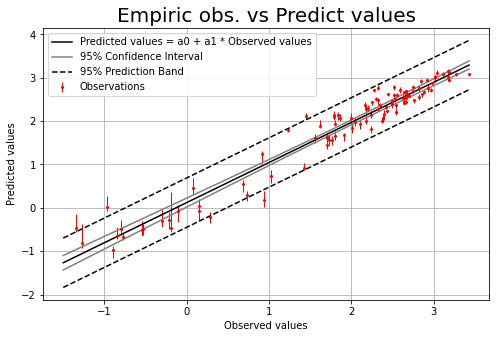

In [23]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [24]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [25]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: %_cover: mean - 0.149, median - 0.15, CI - [0.128-0.173]

SHAP-values for: contr_g_MAX: mean - 0.044, median - 0.043, CI - [0.032-0.056]

SHAP-values for: g_MAX: mean - 0.017, median - 0.017, CI - [0.012-0.022]

SHAP-values for: mf_chm_MAX: mean - 0.404, median - 0.4, CI - [0.367-0.443]

SHAP-values for: mf_chm_MEAN: mean - 0.408, median - 0.413, CI - [0.374-0.439]



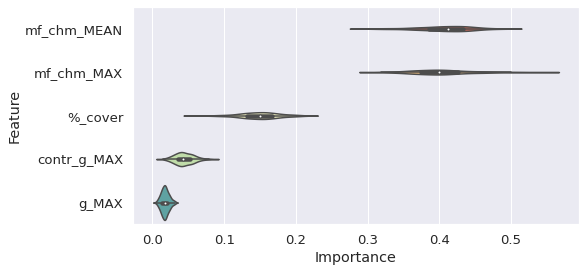

In [27]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['mf_chm_MEAN', 'mf_chm_MAX', '%_cover', 'contr_g_MAX', 'g_MAX'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [28]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [29]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 40.445, median: 34.0,
 pred. interval (P(0.025)-P(0.975)): 16.0-88.025, 
 conf. interval (p-value=0.95): 23.163-60.189 
***
Aggregate bias statistic: 
 mean: -0.017, median: -0.021,
 pred. interval (P(0.025)-P(0.975)): -0.153-0.14, 
 conf. interval (p-value=0.95): -0.078-0.052 
***
Aggregate RMSE statistic: 
 mean: 0.295, median: 0.285, pred. interval (P(0.025)-P(0.975)): 0.186-0.475, 
 conf. interval (p-value=0.95): 0.234-0.353 
***
Aggregate MSE statistic: 
 mean: 0.092, median: 0.081, pred. interval (P(0.025)-P(0.975)): 0.035-0.225, 
 conf. interval (p-value=0.95): 0.055-0.125 
***
Aggregate R^2 statistic: 
 mean: 0.929, median: 0.935, pred. interval (P(0.025)-P(0.975)): 0.85-0.973, 
 conf. interval (p-value=0.95): 0.899-0.957 
***
Aggregate bias(%) statistic: 
 mean: -0.823, median: -1.25, pred. interval (P(0.025)-P(0.975)): -7.987-8.242, 
 conf. interval (p-value=0.95): -4.105-

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

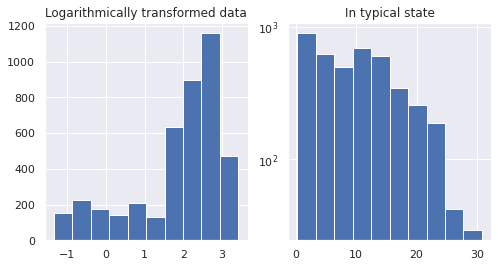

In [30]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [31]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-1, 0, 1, 2, 3])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 1, 5, 10, 20, 30])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

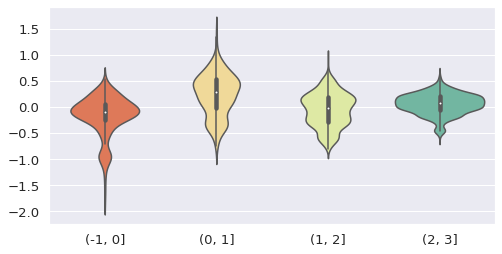

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

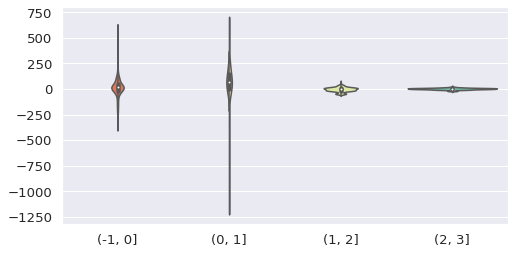

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

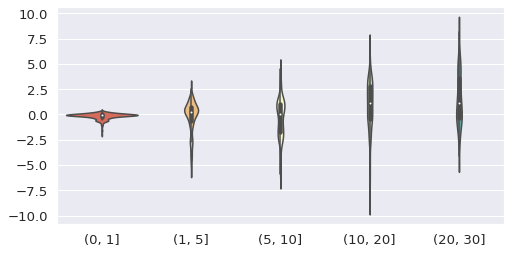

In [34]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

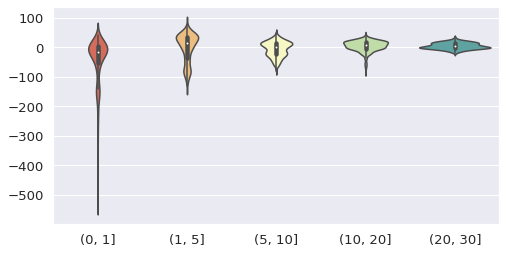

In [35]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [36]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [37]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [38]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.54285
[1]	validation_0-rmse:1.31413
[2]	validation_0-rmse:1.12390
[3]	validation_0-rmse:0.95950
[4]	validation_0-rmse:0.82130
[5]	validation_0-rmse:0.70428
[6]	validation_0-rmse:0.60443
[7]	validation_0-rmse:0.52051


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.45203
[9]	validation_0-rmse:0.39038
[10]	validation_0-rmse:0.34155
[11]	validation_0-rmse:0.29944
[12]	validation_0-rmse:0.26580
[13]	validation_0-rmse:0.23780
[14]	validation_0-rmse:0.21434
[15]	validation_0-rmse:0.19473
[16]	validation_0-rmse:0.17937
[17]	validation_0-rmse:0.16953
[18]	validation_0-rmse:0.15920
[19]	validation_0-rmse:0.15079
[20]	validation_0-rmse:0.14301
[21]	validation_0-rmse:0.13630
[22]	validation_0-rmse:0.13099
[23]	validation_0-rmse:0.12652
[24]	validation_0-rmse:0.12298
[25]	validation_0-rmse:0.12127
[26]	validation_0-rmse:0.12017
[27]	validation_0-rmse:0.11846
[28]	validation_0-rmse:0.11624
[29]	validation_0-rmse:0.11478
[30]	validation_0-rmse:0.11269
[31]	validation_0-rmse:0.11070
[32]	validation_0-rmse:0.10958
[33]	validation_0-rmse:0.10796
[34]	validation_0-rmse:0.10706
[35]	validation_0-rmse:0.10559
[36]	validation_0-rmse:0.10561
[37]	validation_0-rmse:0.10556
[38]	validation_0-rmse:0.10554
[39]	validation_0-rmse:0.10554
[40]	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [39]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 89


In [40]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

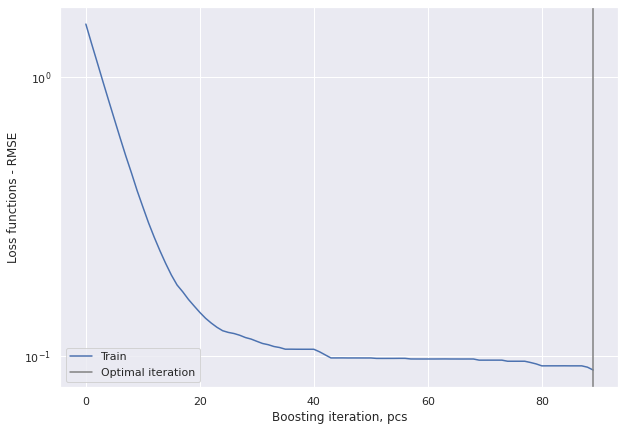

In [41]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [42]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.07
RMSE: 0.1
Relative RMSE(%):  4.774
MSE: 0.0
R square: 99.4%


In [43]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.995
Uncertainty
a0: 0.030+/-0.016
a1: 0.983+/-0.007


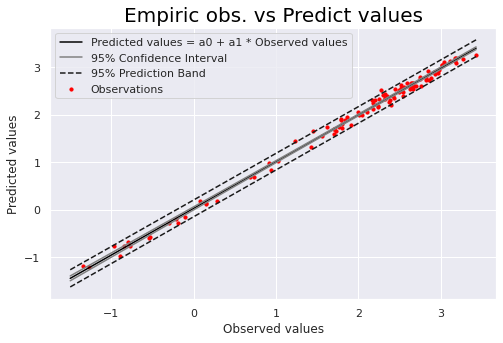

In [45]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-1.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

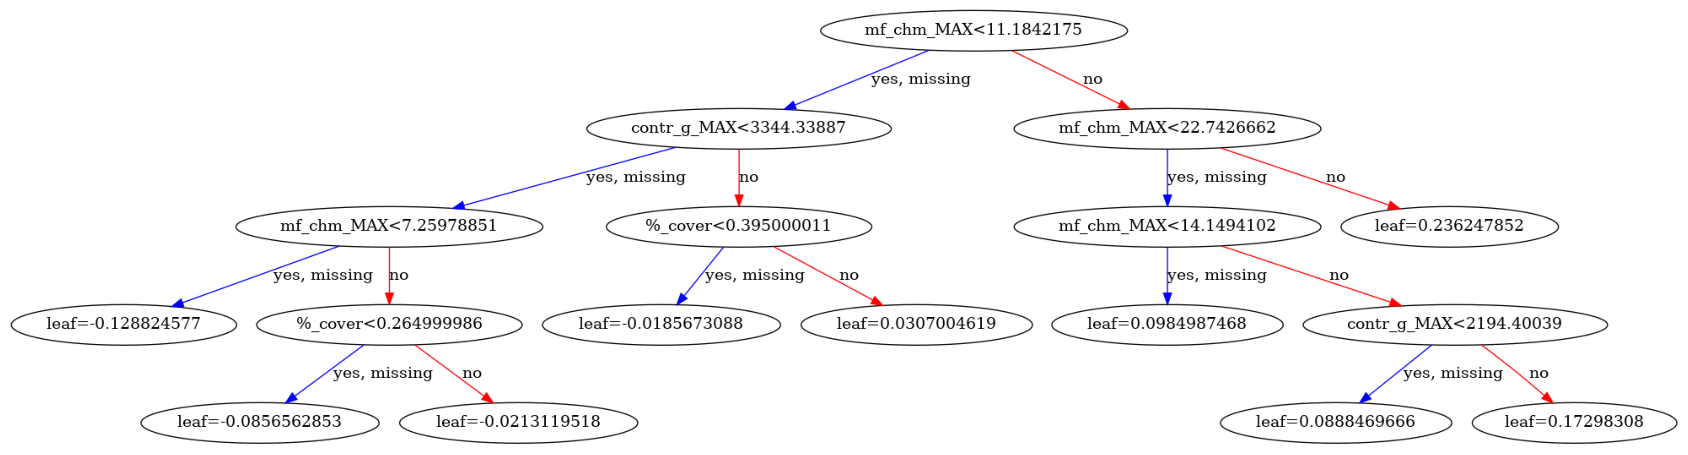

In [47]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

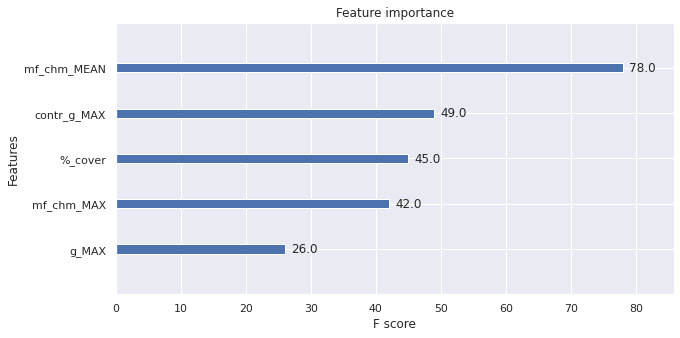

In [49]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

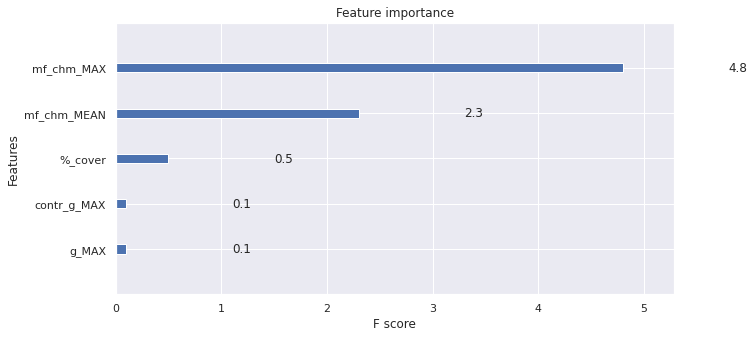

In [50]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

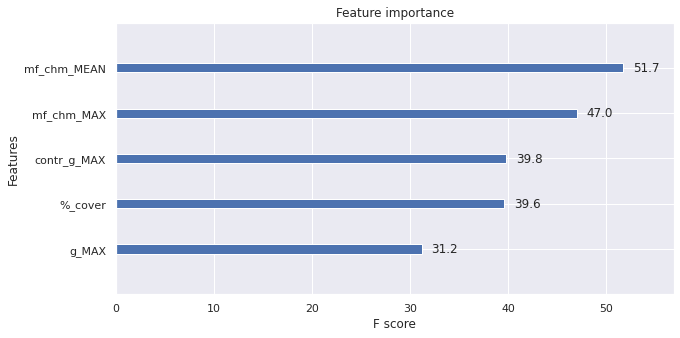

In [51]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [52]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


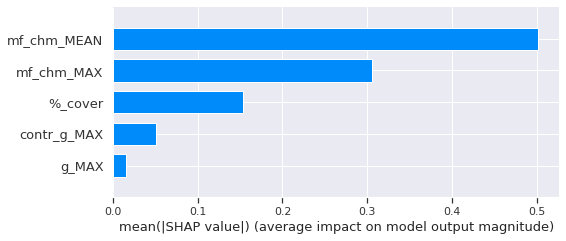

In [53]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

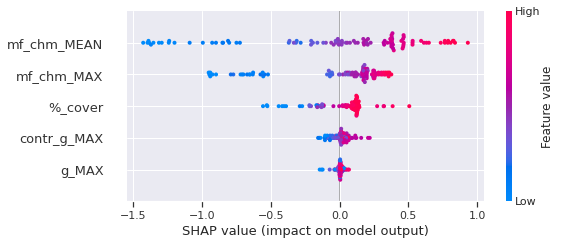

In [54]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

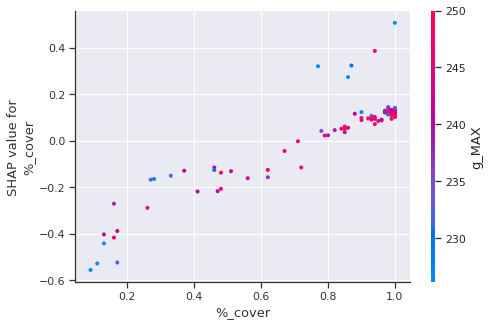

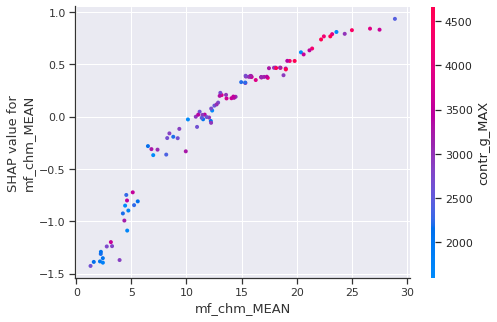

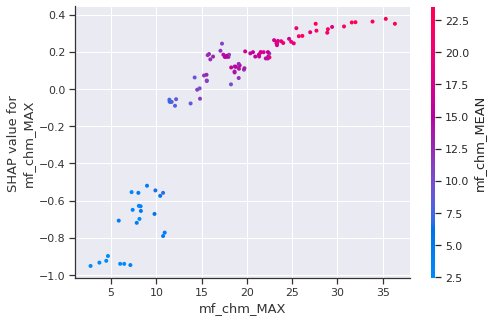

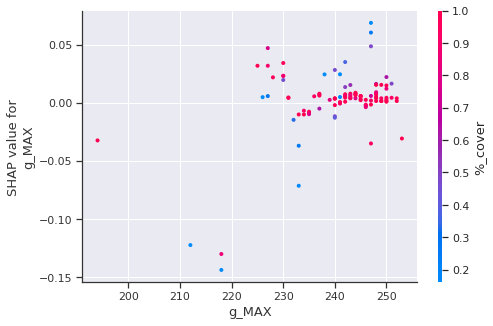

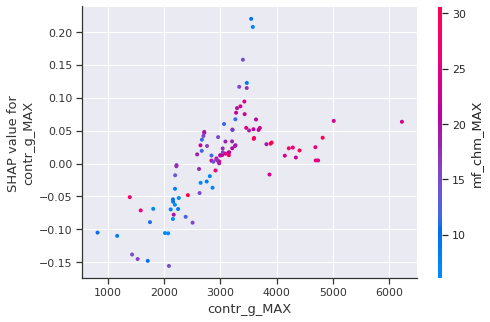

In [55]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [56]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/02_LN_Mstem_CHM_with_RGB_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/02_LN_Mstem_CHM_with_RGB_XGB_model.txt")